In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
import sklearn
import statsmodels
import os
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [2]:

df = pd.read_csv('SoftDrink.csv',parse_dates=True,squeeze=True)
(df)

df.set_index(keys='YearMonth',inplace=True)
df

SoftDrinkProduction
YearMonth                     
1980-01                   1954
1980-02                   2302
1980-03                   3054
1980-04                   2414
1980-05                   2226
...                        ...
1995-03                   4067
1995-04                   4022
1995-05                   3937
1995-06                   4365
1995-07                   4290

[187 rows x 1 columns]

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

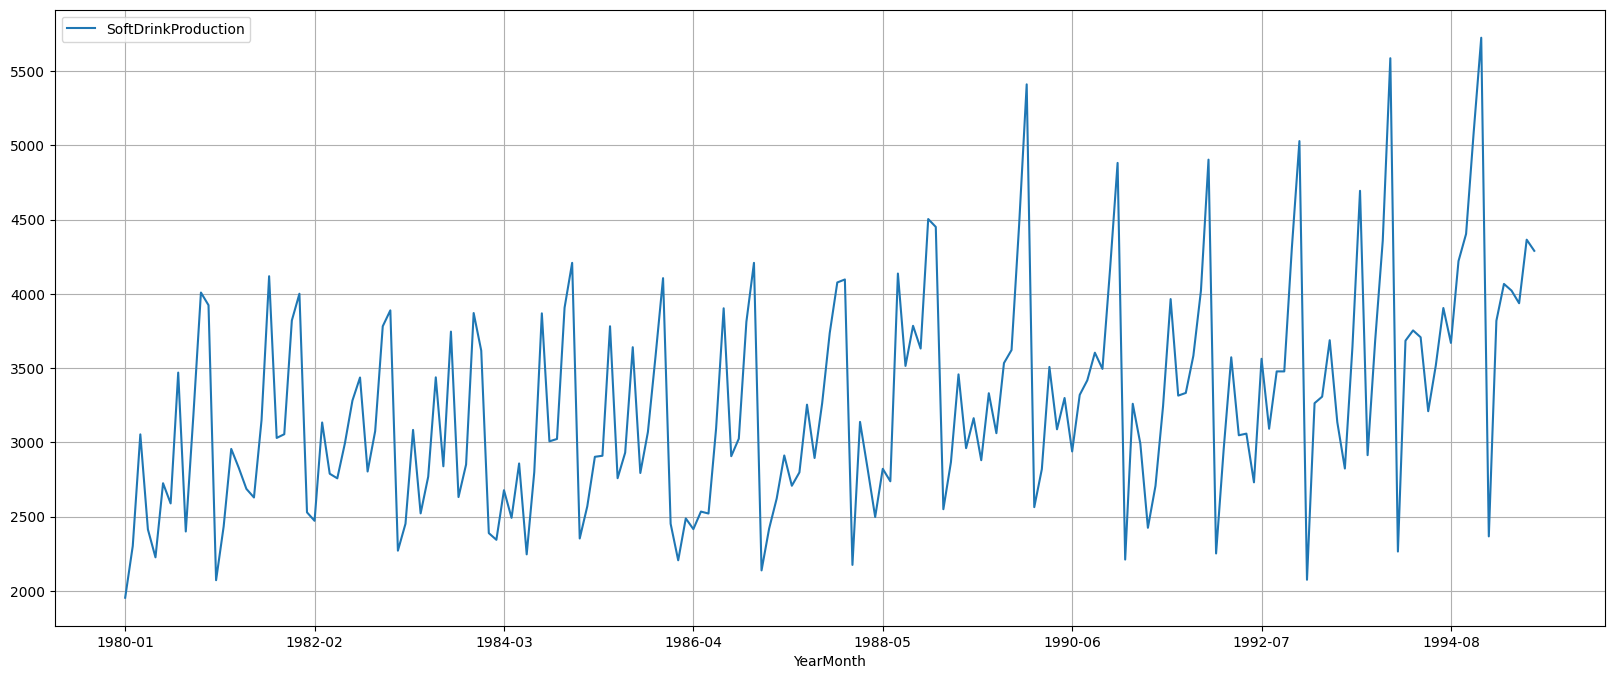

In [4]:
df.plot(grid=True);

In [5]:
df.describe()

SoftDrinkProduction
count           187.000000
mean           3262.609626
std             728.357367
min            1954.000000
25%            2748.000000
50%            3134.000000
75%            3741.000000
max            5725.000000

In [6]:
df.dtypes

SoftDrinkProduction    int64
dtype: object

In [7]:
df.tail()

SoftDrinkProduction
YearMonth                     
1995-03                   4067
1995-04                   4022
1995-05                   3937
1995-06                   4365
1995-07                   4290

In [38]:
df.shape

(187, 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 1980-01 to 1995-07
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9+ KB


In [10]:
df.describe(include="all")

SoftDrinkProduction
count           187.000000
mean           3262.609626
std             728.357367
min            1954.000000
25%            2748.000000
50%            3134.000000
75%            3741.000000
max            5725.000000

In [11]:
df.isnull().sum()

SoftDrinkProduction    0
dtype: int64

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 4


In [13]:
df.columns


Index(['SoftDrinkProduction'], dtype='object')

In [14]:
df["SoftDrinkProduction"].mean()



3262.609625668449

In [15]:
len(df["SoftDrinkProduction"].value_counts())

183

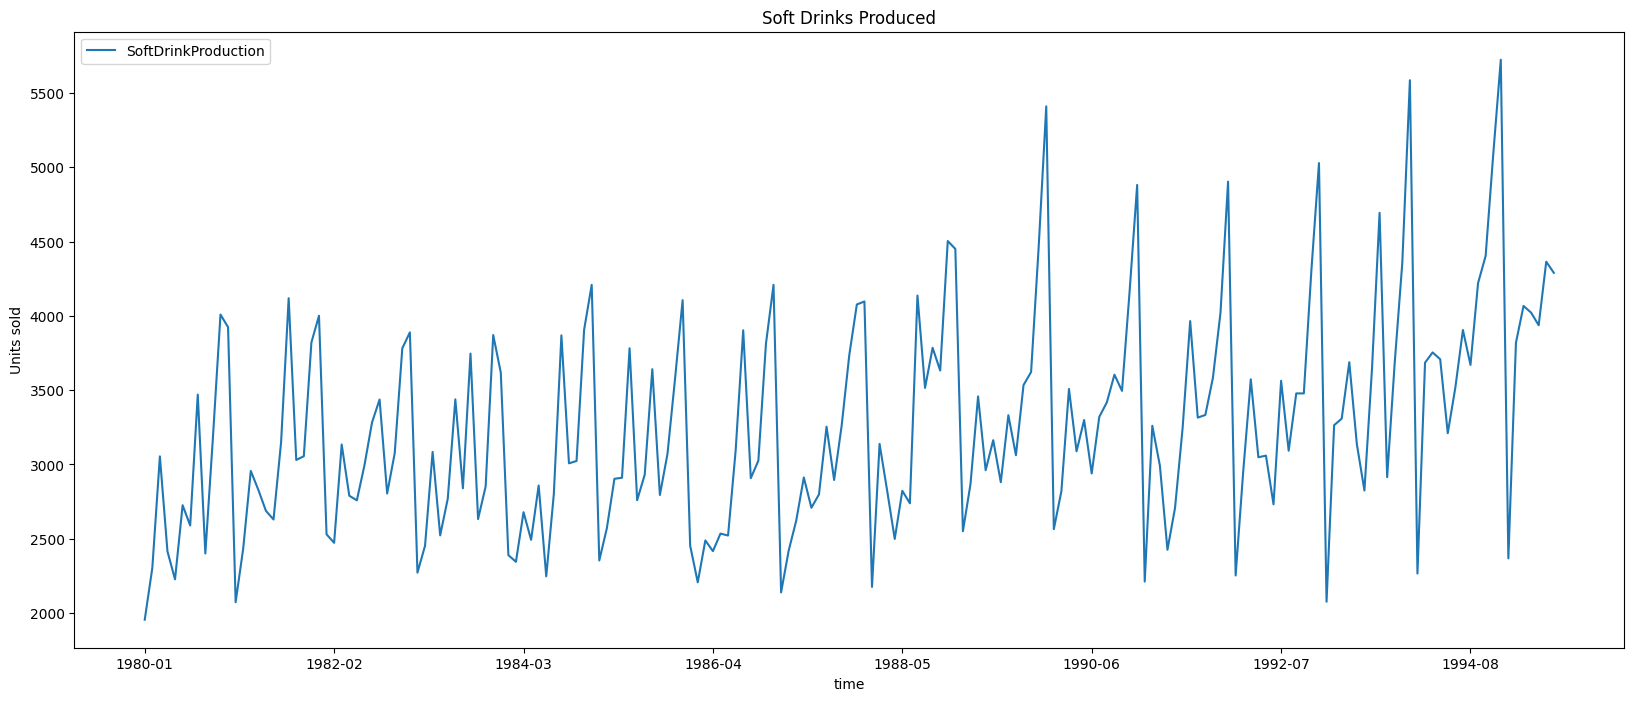

In [16]:
df.plot()
plt.title('Soft Drinks Produced')
plt.xlabel('time')
plt.ylabel('Units sold')
plt.show()

In [17]:
df,type(df)

(           SoftDrinkProduction
 YearMonth                     
 1980-01                   1954
 1980-02                   2302
 1980-03                   3054
 1980-04                   2414
 1980-05                   2226
 ...                        ...
 1995-03                   4067
 1995-04                   4022
 1995-05                   3937
 1995-06                   4365
 1995-07                   4290
 
 [187 rows x 1 columns],
 pandas.core.frame.DataFrame)

<AxesSubplot: xlabel='YearMonth', ylabel='SoftDrinkProduction'>

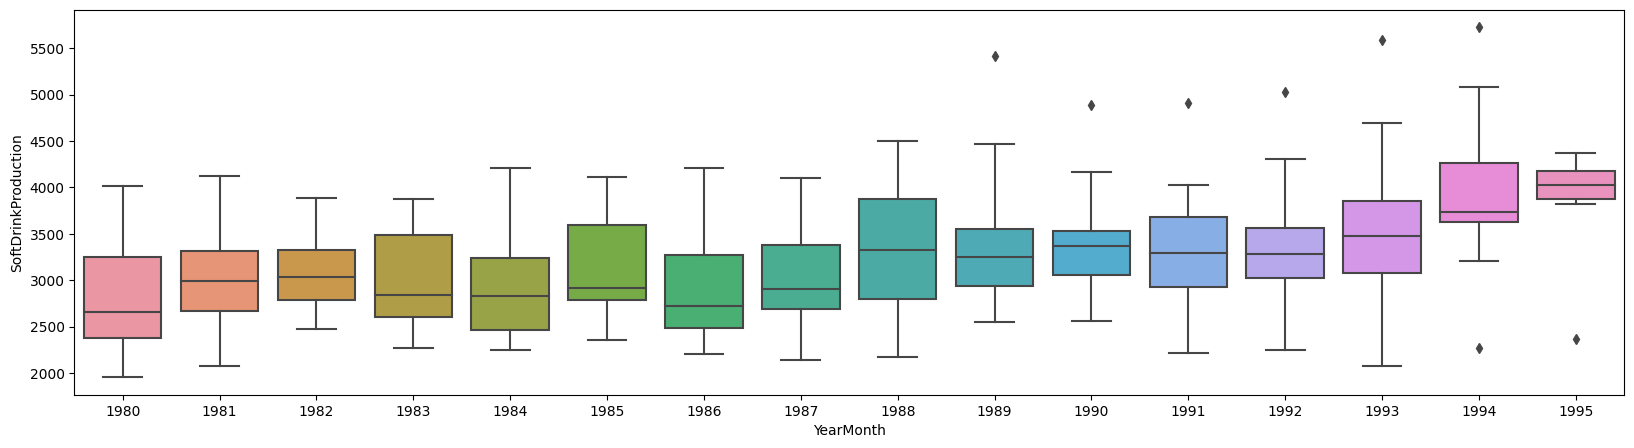

In [18]:
fig, ax = plt.subplots(figsize=(20,5))

sns.boxplot(x = pd.DatetimeIndex(df.index).year, 
                y = df['SoftDrinkProduction'], 
                ax = ax)


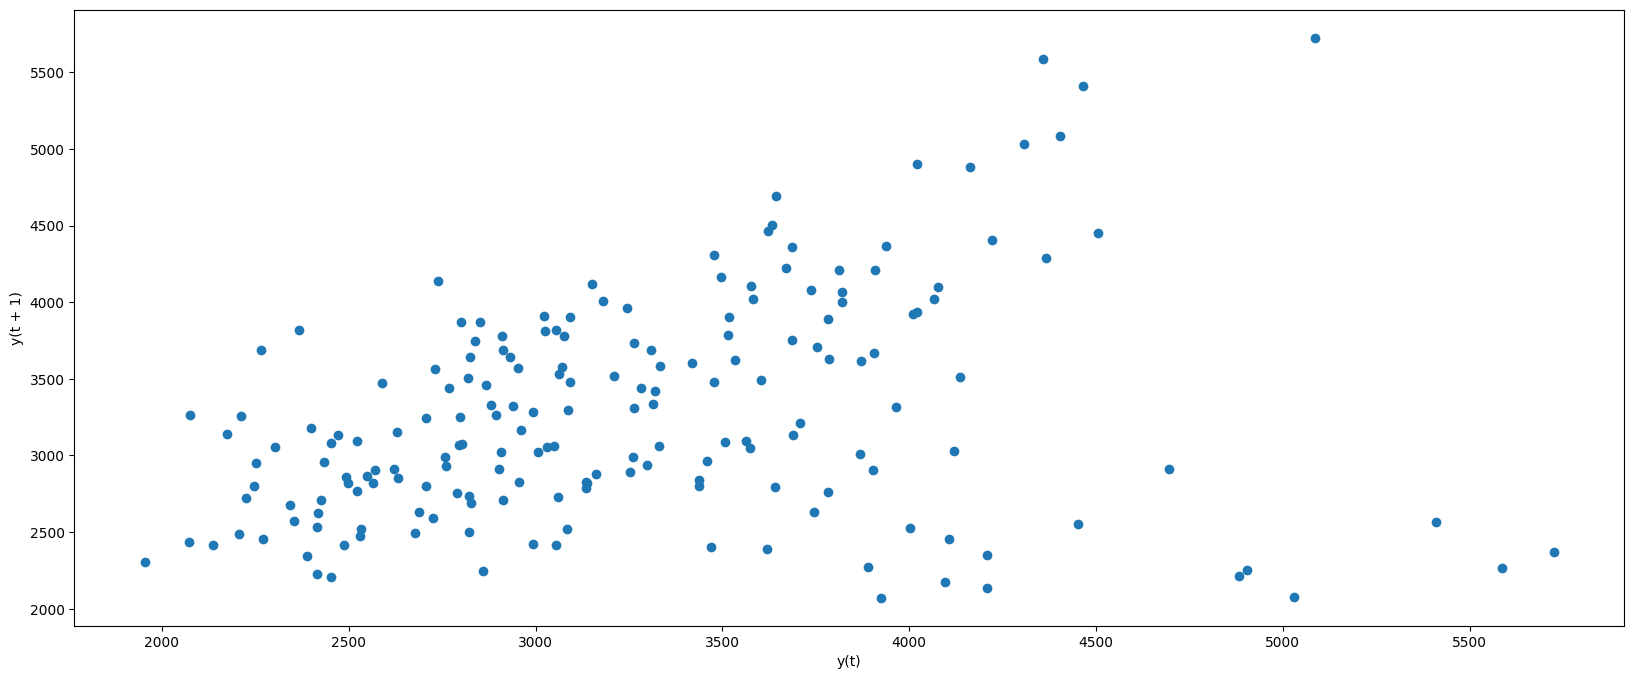

In [19]:
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

array([[<AxesSubplot: title={'center': 'SoftDrinkProduction'}>]],
      dtype=object)

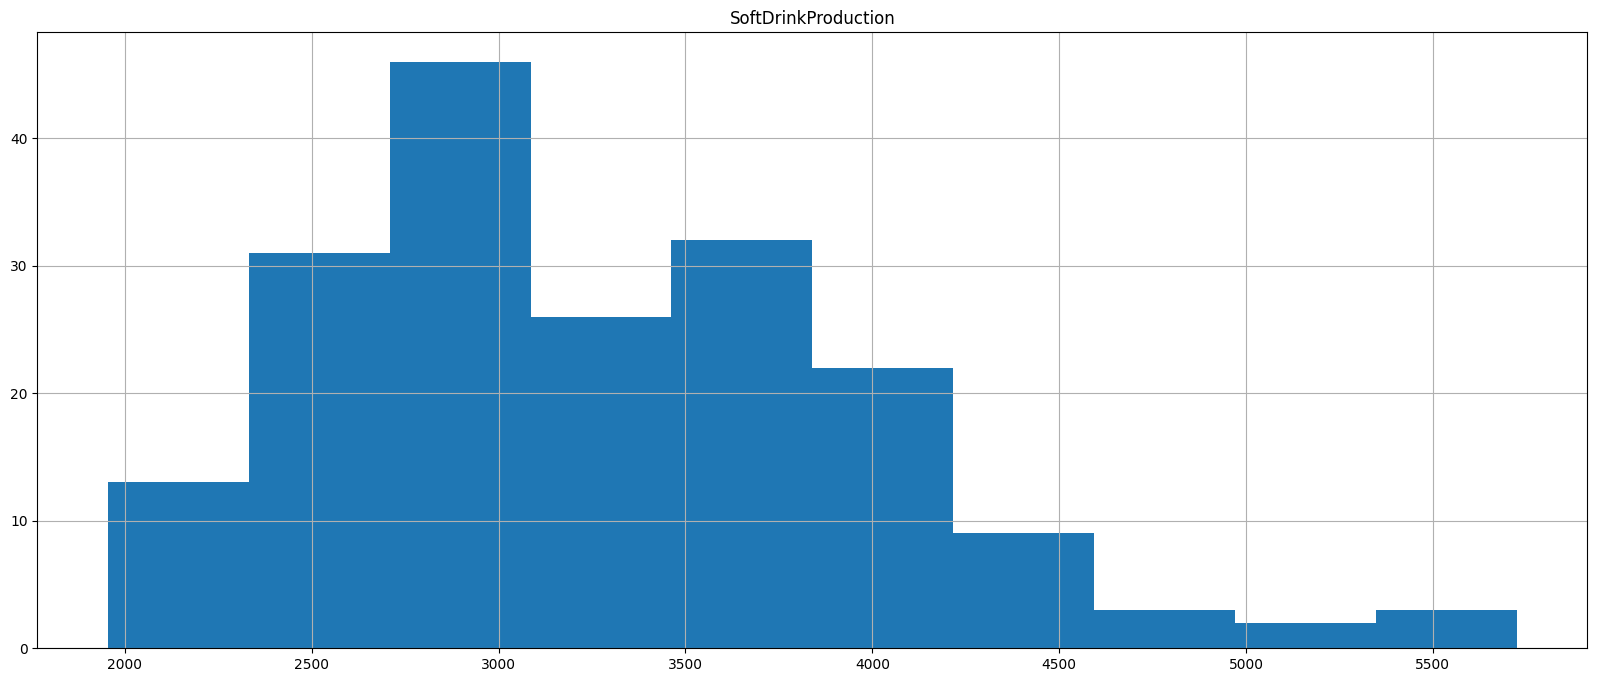

In [20]:
df.hist()

In [21]:
monthly_sales_across_years_shoe = pd.pivot_table(pd.DataFrame(df), columns = pd.DatetimeIndex(df.index).month, 
                                                      index = pd.DatetimeIndex(df.index).year)
monthly_sales_across_years_shoe

SoftDrinkProduction                                                  \
YearMonth                  1       2       3       4       5       6       7    
YearMonth                                                                       
1980                   1954.0  2302.0  3054.0  2414.0  2226.0  2725.0  2589.0   
1981                   2072.0  2434.0  2956.0  2828.0  2687.0  2629.0  3150.0   
1982                   2529.0  2472.0  3134.0  2789.0  2758.0  2993.0  3282.0   
1983                   2271.0  2452.0  3084.0  2522.0  2769.0  3438.0  2839.0   
1984                   2389.0  2344.0  2678.0  2492.0  2858.0  2246.0  2800.0   
1985                   2353.0  2570.0  2903.0  2910.0  3782.0  2759.0  2931.0   
1986                   2452.0  2206.0  2488.0  2416.0  2534.0  2521.0  3093.0   
1987                   2138.0  2419.0  2622.0  2912.0  2708.0  2798.0  3254.0   
1988                   2175.0  3138.0  2823.0  2498.0  2822.0  2738.0  4137.0   
1989                   2550.0  2867.0  3458.0  2961.0  3163.0  2880.0  3331.0   
1990                   2564.0  2820.0  3508.0  3088.0  3299.0  2939.0  3320.0   
1991                   2211.0  3260.0  2992.0  2425.0  2707.0  3244.0  3965.0   
1992                   2252.0  2952.0  3573.0  3048.0  3059.0  2731.0  3563.0   
1993                   2075.0  3264.0  3308.0  3688.0  3136.0  2824.0  3644.0   
1994                   2265.0  3685.0  3754.0  3708.0  3210.0  3517.0  3905.0   
1995                   2367.0  3819.0  4067.0  4022.0  3937.0  4365.0  4290.0   

                                                   
YearMonth      8       9       10      11      12  
YearMonth                                          
1980       3470.0  2400.0  3180.0  4009.0  3924.0  
1981       4119.0  3030.0  3055.0  3821.0  4001.0  
1982       3437.0  2804.0  3076.0  3782.0  3889.0  
1983       3746.0  2632.0  2851.0  3871.0  3618.0  
1984       3869.0  3007.0  3023.0  3907.0  4209.0  
1985       3641.0  2794.0  3070.0  3576.0  4106.0  
1986       3903.0  2907.0  3025.0  3812.0  4209.0  
1987       2895.0  3263.0  3736.0  4077.0  4097.0  
1988       3515.0  3785.0  3632.0  4504.0  4451.0  
1989       3062.0  3534.0  3622.0  4464.0  5411.0  
1990       3418.0  3604.0  3495.0  4163.0  4882.0  
1991       3315.0  3333.0  3583.0  4021.0  4904.0  
1992       3092.0  3478.0  3478.0  4308.0  5029.0  
1993       4694.0  2914.0  3686.0  4358.0  5587.0  
1994       3670.0  4221.0  4404.0  5086.0  5725.0  
1995          NaN     NaN     NaN     NaN     NaN

In [22]:
df['SoftDrinkProduction']
type(df)

pandas.core.frame.DataFrame

In [23]:
df

SoftDrinkProduction
YearMonth                     
1980-01                   1954
1980-02                   2302
1980-03                   3054
1980-04                   2414
1980-05                   2226
...                        ...
1995-03                   4067
1995-04                   4022
1995-05                   3937
1995-06                   4365
1995-07                   4290

[187 rows x 1 columns]

In [24]:
train = df[df.index<'1991'] 
test = df[df.index>='1991']
print(type(train),train.shape,train,test.shape)

<class 'pandas.core.frame.DataFrame'> (132, 1)            SoftDrinkProduction
YearMonth                     
1980-01                   1954
1980-02                   2302
1980-03                   3054
1980-04                   2414
1980-05                   2226
...                        ...
1990-08                   3418
1990-09                   3604
1990-10                   3495
1990-11                   4163
1990-12                   4882

[132 rows x 1 columns] (55, 1)


In [25]:
from IPython.display import display

In [26]:


from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics 
scaler = MinMaxScaler()
# Fitting and Transforming the Training data
print("#### X_train before and after scaling ####")
print(train.head())
train[train.columns] = scaler.fit_transform(train[train.columns])
print(train.head())
print(scaler.data_max_, scaler.data_min_)
# Transforming the Teating data
print("#### X_test before and after scaling ####")
print(test.head())
test[test.columns] = scaler.fit_transform(test[test.columns])
print(test.head())


#### X_train before and after scaling ####
           SoftDrinkProduction
YearMonth                     
1980-01                   1954
1980-02                   2302
1980-03                   3054
1980-04                   2414
1980-05                   2226
           SoftDrinkProduction
YearMonth                     
1980-01               0.000000
1980-02               0.100665
1980-03               0.318195
1980-04               0.133063
1980-05               0.078681
[5411.] [1954.]
#### X_test before and after scaling ####
           SoftDrinkProduction
YearMonth                     
1991-01                   2211
1991-02                   3260
1991-03                   2992
1991-04                   2425
1991-05                   2707
           SoftDrinkProduction
YearMonth                     
1991-01               0.037260
1991-02               0.324658
1991-03               0.251233
1991-04               0.095890
1991-05               0.173151


In [27]:
print(test.tail())

           SoftDrinkProduction
YearMonth                     
1995-03               0.545753
1995-04               0.533425
1995-05               0.510137
1995-06               0.627397
1995-07               0.606849


In [28]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
print(type(train), train.columns)


<class 'pandas.core.frame.DataFrame'> Index(['SoftDrinkProduction'], dtype='object')


/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
model_SES_autofit = model_SES.fit(optimized=True)

In [30]:
model_SES_autofit.params

{'smoothing_level': 0.060845516435362804,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 0.2595104928244498,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [31]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
type(SES_predict)
pd.Series(SES_predict)[0]

0.44749844881128187

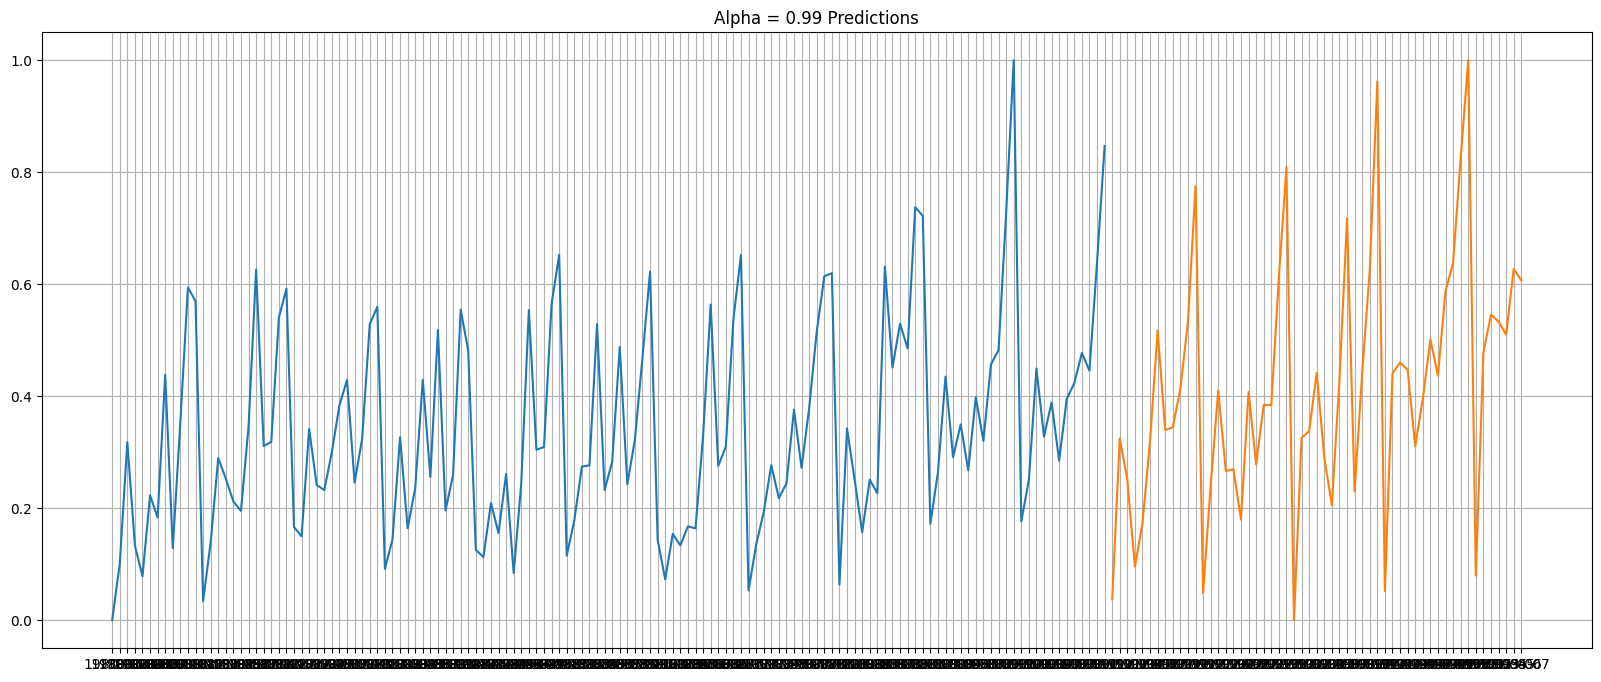

In [32]:

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot((pd.Series(SES_predict))[0], label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [33]:

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

SES_predict.values

array([0.44749845, 0.44749845, 0.44749845, 0.44749845, 0.44749845,
       0.44749845, 0.44749845, 0.44749845, 0.44749845, 0.44749845,
       0.44749845, 0.44749845, 0.44749845, 0.44749845, 0.44749845,
       0.44749845, 0.44749845, 0.44749845, 0.44749845, 0.44749845,
       0.44749845, 0.44749845, 0.44749845, 0.44749845, 0.44749845,
       0.44749845, 0.44749845, 0.44749845, 0.44749845, 0.44749845,
       0.44749845, 0.44749845, 0.44749845, 0.44749845, 0.44749845,
       0.44749845, 0.44749845, 0.44749845, 0.44749845, 0.44749845,
       0.44749845, 0.44749845, 0.44749845, 0.44749845, 0.44749845,
       0.44749845, 0.44749845, 0.44749845, 0.44749845, 0.44749845,
       0.44749845, 0.44749845, 0.44749845, 0.44749845, 0.44749845])

In [34]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values[0]))

SES RMSE: 0.22330590440164572
SES RMSE (calculated using statsmodels): [0.2233059]


In [35]:
resultsDf = pd.DataFrame({'RMSE': [em.rmse(test.values,SES_predict.values[0])]},index=['Alpha=0.99,SES'])
resultsDf

RMSE
Alpha=0.99,SES  [0.22330590440164572]

In [36]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901162020976027e-08, 'smoothing_trend': 1.2704306944075485e-08, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.23955056400130526, 'initial_trend': 0.0014878402563018756, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
DES_predict =  model_DES.forecast(len(test))
DES_predict


1991-01-01    0.437433
1991-02-01    0.438921
1991-03-01    0.440409
1991-04-01    0.441897
1991-05-01    0.443385
1991-06-01    0.444873
1991-07-01    0.446360
1991-08-01    0.447848
1991-09-01    0.449336
1991-10-01    0.450824
1991-11-01    0.452312
1991-12-01    0.453800
1992-01-01    0.455287
1992-02-01    0.456775
1992-03-01    0.458263
1992-04-01    0.459751
1992-05-01    0.461239
1992-06-01    0.462727
1992-07-01    0.464214
1992-08-01    0.465702
1992-09-01    0.467190
1992-10-01    0.468678
1992-11-01    0.470166
1992-12-01    0.471654
1993-01-01    0.473141
1993-02-01    0.474629
1993-03-01    0.476117
1993-04-01    0.477605
1993-05-01    0.479093
1993-06-01    0.480581
1993-07-01    0.482069
1993-08-01    0.483556
1993-09-01    0.485044
1993-10-01    0.486532
1993-11-01    0.488020
1993-12-01    0.489508
1994-01-01    0.490996
1994-02-01    0.492483
1994-03-01    0.493971
1994-04-01    0.495459
1994-05-01    0.496947
1994-06-01    0.498435
1994-07-01    0.499923
1994-08-01 

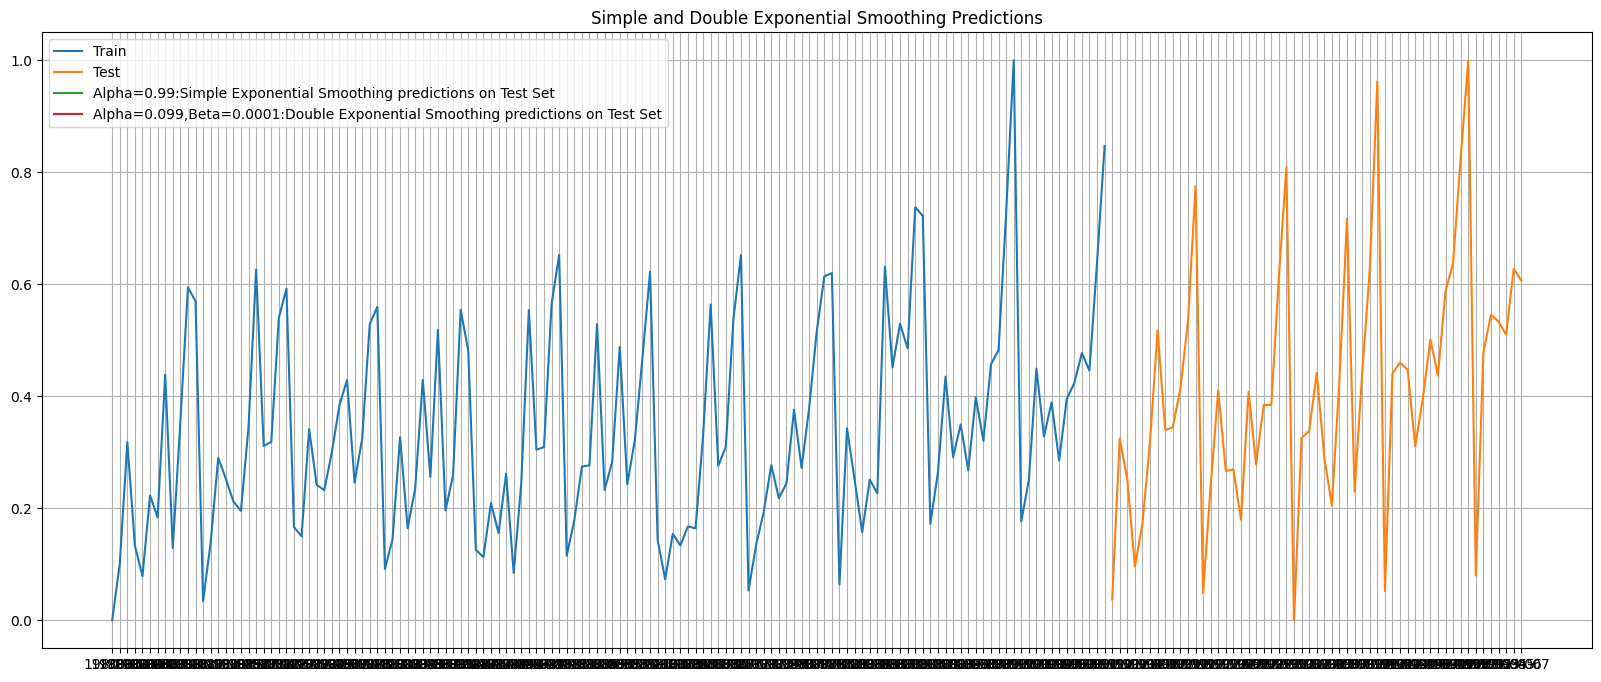

In [41]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict[0], label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict[0], label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [42]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict.values

array([0.43743332, 0.43892116, 0.440409  , 0.44189684, 0.44338468,
       0.44487252, 0.44636036, 0.4478482 , 0.44933604, 0.45082388,
       0.45231172, 0.45379956, 0.4552874 , 0.45677524, 0.45826308,
       0.45975092, 0.46123876, 0.4627266 , 0.46421444, 0.46570228,
       0.46719012, 0.46867796, 0.4701658 , 0.47165364, 0.47314148,
       0.47462932, 0.47611716, 0.47760501, 0.47909285, 0.48058069,
       0.48206853, 0.48355637, 0.48504421, 0.48653205, 0.48801989,
       0.48950773, 0.49099557, 0.49248341, 0.49397125, 0.49545909,
       0.49694693, 0.49843477, 0.49992261, 0.50141045, 0.50289829,
       0.50438613, 0.50587397, 0.50736181, 0.50884965, 0.51033749,
       0.51182533, 0.51331317, 0.51480101, 0.51628885, 0.51777669])

In [43]:
display(train)

SoftDrinkProduction
YearMonth                     
1980-01               0.000000
1980-02               0.100665
1980-03               0.318195
1980-04               0.133063
1980-05               0.078681
...                        ...
1990-08               0.423489
1990-09               0.477292
1990-10               0.445762
1990-11               0.638993
1990-12               0.846977

[132 rows x 1 columns]

In [44]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 0.2207639285579171


In [45]:
resultsDf_temp = pd.DataFrame({'RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

RMSE
Alpha=0.99,SES           [0.22330590440164572]
Alpha=1,Beta=0.0189:DES               0.220764

In [46]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09460989380517106, 'smoothing_trend': 3.879115690691336e-14, 'smoothing_seasonal': 1.3381077723361681e-11, 'damping_trend': nan, 'initial_level': 0.2619525918151608, 'initial_trend': 0.001351518621785005, 'initial_seasons': array([-0.22572443, -0.1593335 , -0.03750672, -0.11456308, -0.06920719,
       -0.09526406,  0.01015821,  0.12318719, -0.01795413,  0.03344848,
        0.24824072,  0.32080167]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [49]:
# Forecasting using this model for the duration of the test set
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    0.216022
1991-02-01    0.283765
1991-03-01    0.406943
1991-04-01    0.331238
1991-05-01    0.377946
1991-06-01    0.353240
1991-07-01    0.460014
1991-08-01    0.574394
1991-09-01    0.434605
1991-10-01    0.487359
1991-11-01    0.703503
1991-12-01    0.777415
1992-01-01    0.232240
1992-02-01    0.299983
1992-03-01    0.423161
1992-04-01    0.347456
1992-05-01    0.394164
1992-06-01    0.369458
1992-07-01    0.476232
1992-08-01    0.590613
1992-09-01    0.450823
1992-10-01    0.503577
1992-11-01    0.719721
1992-12-01    0.793633
1993-01-01    0.248459
1993-02-01    0.316201
1993-03-01    0.439379
1993-04-01    0.363675
1993-05-01    0.410382
1993-06-01    0.385677
1993-07-01    0.492450
1993-08-01    0.606831
1993-09-01    0.467041
1993-10-01    0.519795
1993-11-01    0.735939
1993-12-01    0.809851
1994-01-01    0.264677
1994-02-01    0.332419
1994-03-01    0.455598
1994-04-01    0.379893
1994-05-01    0.426600
1994-06-01    0.401895
1994-07-01    0.508669
1994-08-01 

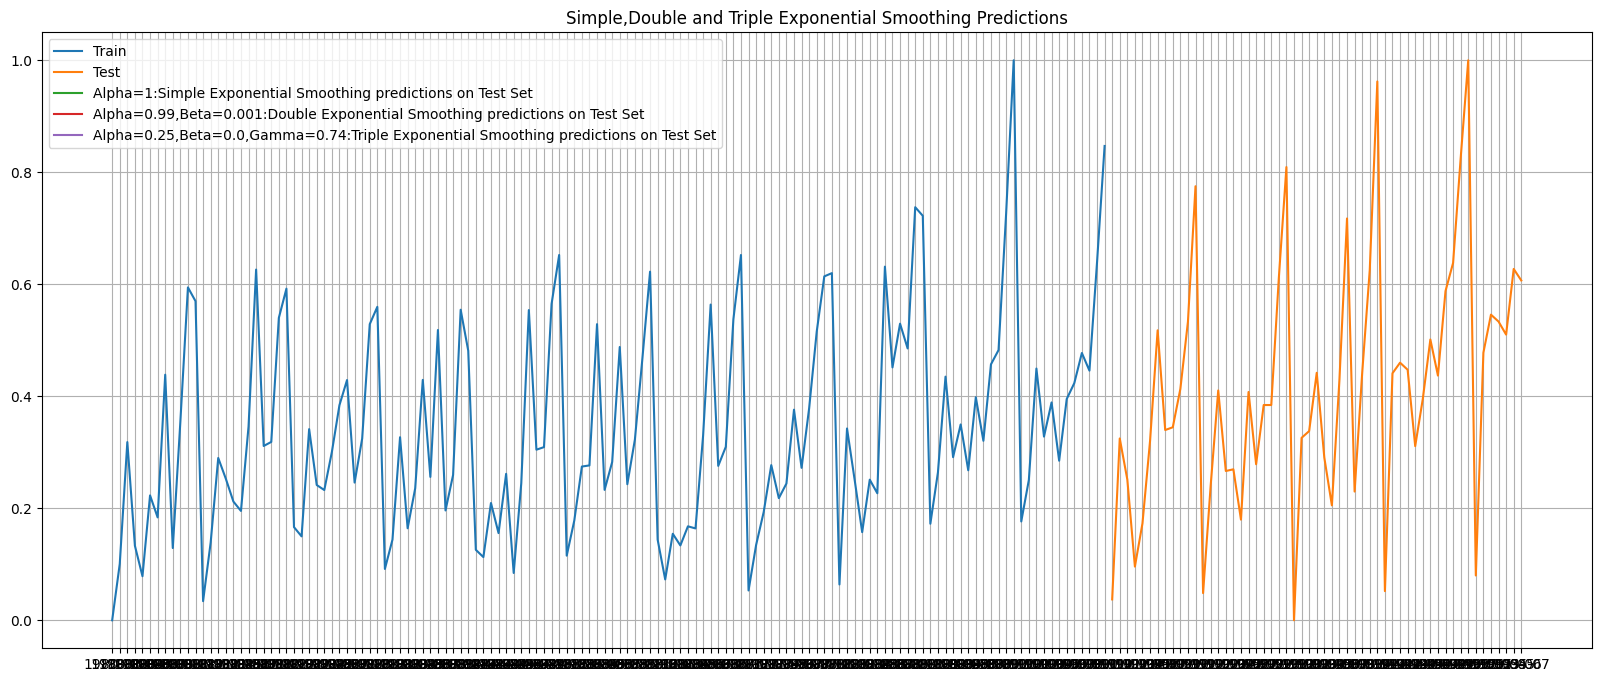

In [50]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict[0], label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict[0], label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict[0], label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [51]:
TES_predict =  model_TES.forecast(len(test))
TES_predict.values

array([0.2160222 , 0.28376465, 0.40694294, 0.33123811, 0.37794552,
       0.35324016, 0.46001395, 0.57439445, 0.43460465, 0.48735877,
       0.70350253, 0.77741501, 0.23224043, 0.29998287, 0.42316117,
       0.34745633, 0.39416374, 0.36945838, 0.47623217, 0.59061267,
       0.45082287, 0.50357699, 0.71972076, 0.79363323, 0.24845865,
       0.3162011 , 0.43937939, 0.36367455, 0.41038196, 0.38567661,
       0.4924504 , 0.60683089, 0.46704109, 0.51979522, 0.73593898,
       0.80985145, 0.26467687, 0.33241932, 0.45559761, 0.37989278,
       0.42660019, 0.40189483, 0.50866862, 0.62304912, 0.48325932,
       0.53601344, 0.75215721, 0.82606968, 0.2808951 , 0.34863754,
       0.47181584, 0.396111  , 0.44281841, 0.41811305, 0.52488684])

In [52]:
print('RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

RMSE: 0.13668777281007272


In [53]:
resultsDf_temp = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

RMSE
Alpha=0.99,SES                      [0.22330590440164572]
Alpha=1,Beta=0.0189:DES                          0.220764
Alpha=0.25,Beta=0.0,Gamma=0.74:TES               0.136688

In [54]:
df = pd.read_csv('SoftDrink.csv',parse_dates=True,squeeze=True)
df.head()
df.set_index('YearMonth',inplace = True)
df

SoftDrinkProduction
YearMonth                     
1980-01                   1954
1980-02                   2302
1980-03                   3054
1980-04                   2414
1980-05                   2226
...                        ...
1995-03                   4067
1995-04                   4022
1995-05                   3937
1995-06                   4365
1995-07                   4290

[187 rows x 1 columns]

In [55]:
train

SoftDrinkProduction
YearMonth                     
1980-01               0.000000
1980-02               0.100665
1980-03               0.318195
1980-04               0.133063
1980-05               0.078681
...                        ...
1990-08               0.423489
1990-09               0.477292
1990-10               0.445762
1990-11               0.638993
1990-12               0.846977

[132 rows x 1 columns]

In [56]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [57]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_test
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

type(LinearRegression_train)

pandas.core.frame.DataFrame

In [58]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data',LinearRegression_test.tail(),'\n')

First few rows of Training Data            SoftDrinkProduction  time
YearMonth                           
1980-01               0.000000     1
1980-02               0.100665     2
1980-03               0.318195     3
1980-04               0.133063     4
1980-05               0.078681     5 

Last few rows of Training Data            SoftDrinkProduction  time
YearMonth                           
1990-08               0.423489   128
1990-09               0.477292   129
1990-10               0.445762   130
1990-11               0.638993   131
1990-12               0.846977   132 

First few rows of Test Data            SoftDrinkProduction  time
YearMonth                           
1991-01               0.037260   133
1991-02               0.324658   134
1991-03               0.251233   135
1991-04               0.095890   136
1991-05               0.173151   137 

Last few rows of Test Data            SoftDrinkProduction  time
YearMonth                           
1995-03               0.5

In [59]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'].values)

LinearRegression()

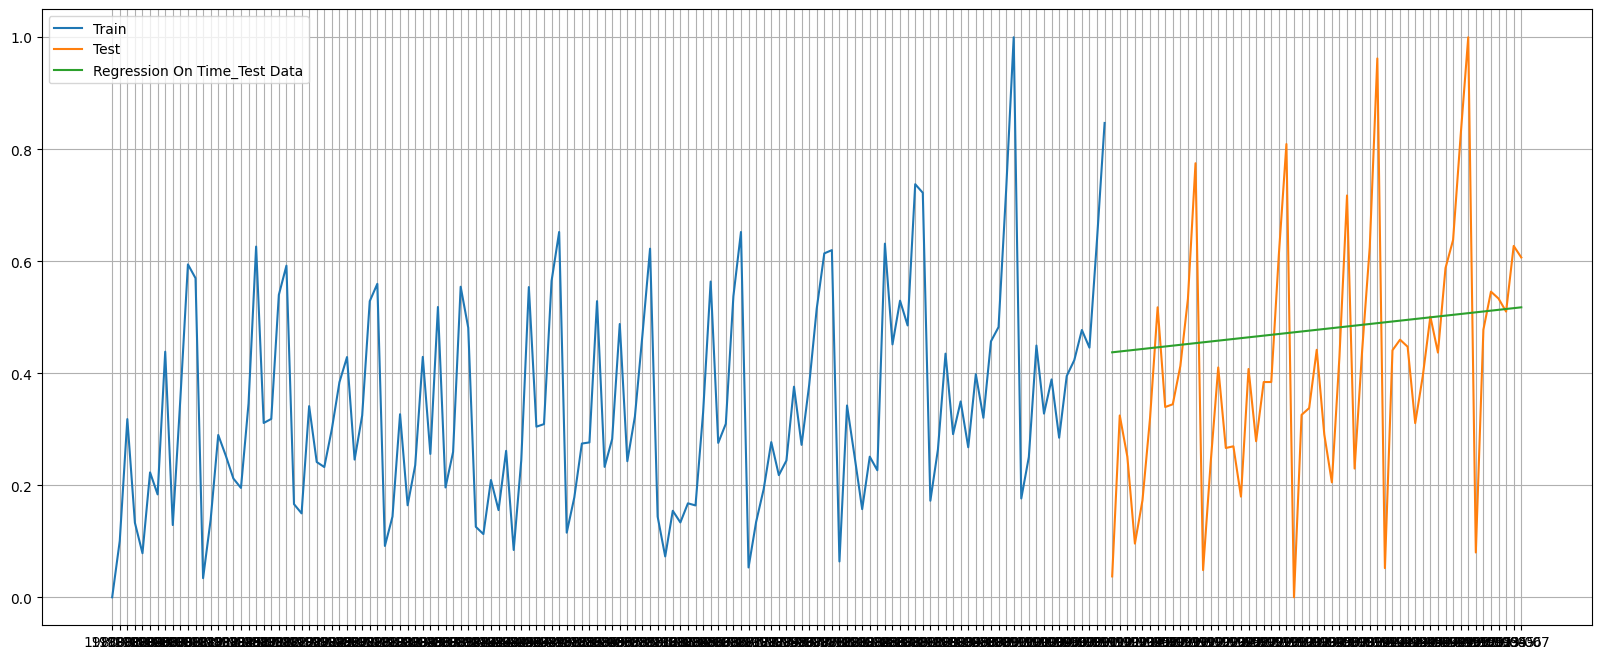

In [60]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [61]:
rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 0.221 


In [62]:
resultsDf_reg = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_reg])
resultsDf

RMSE
Alpha=0.99,SES                      [0.22330590440164572]
Alpha=1,Beta=0.0189:DES                          0.220764
Alpha=0.25,Beta=0.0,Gamma=0.74:TES               0.136688
RegressionOnTime                                 0.220765

In [63]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [64]:
train.columns

Index(['SoftDrinkProduction'], dtype='object')

In [65]:
NaiveModel_test['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01    0.846977
1991-02    0.846977
1991-03    0.846977
1991-04    0.846977
1991-05    0.846977
Name: naive, dtype: float64

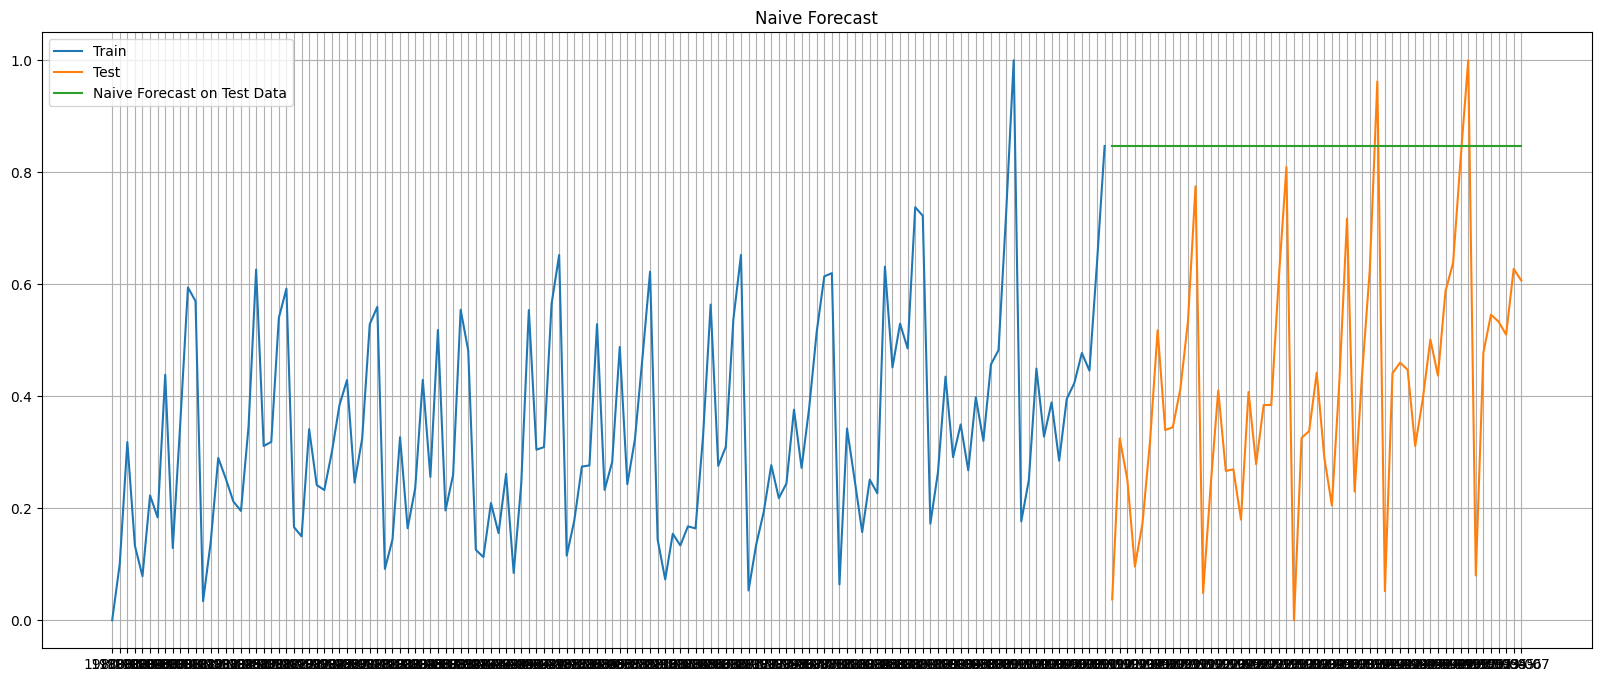

In [66]:
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [67]:
rmse_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 0.484


In [68]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
type(resultsDf)

pandas.core.frame.DataFrame

In [69]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
print(train.mean())
print(test.mean())

SoftDrinkProduction    0.338492
dtype: float64
SoftDrinkProduction    0.416403
dtype: float64


In [70]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

SoftDrinkProduction  mean_forecast
YearMonth                                    
1991-01               0.037260       0.338492
1991-02               0.324658       0.338492
1991-03               0.251233       0.338492
1991-04               0.095890       0.338492
1991-05               0.173151       0.338492

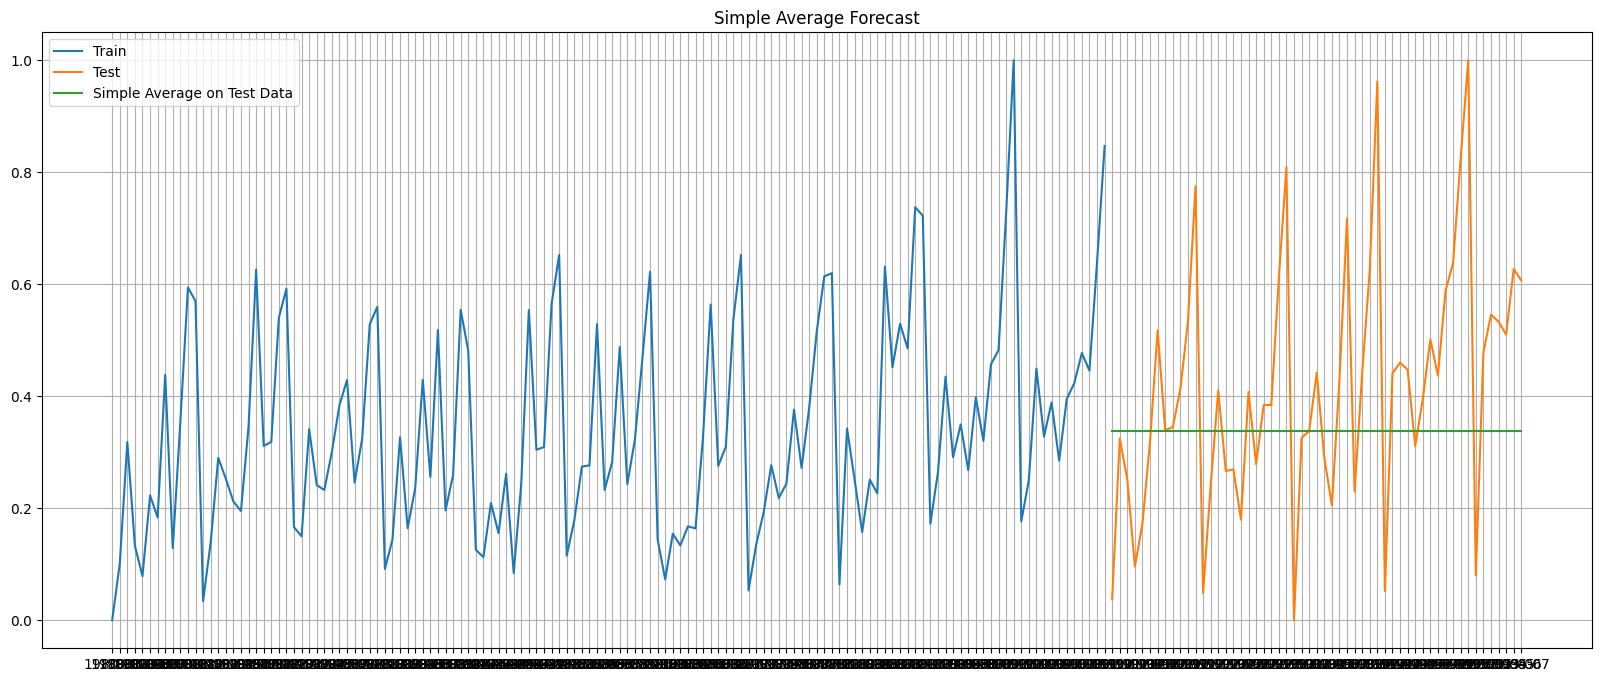

In [71]:
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [72]:
rmse_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 0.234


In [73]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

RMSE
Alpha=0.99,SES                      [0.22330590440164572]
Alpha=1,Beta=0.0189:DES                          0.220764
Alpha=0.25,Beta=0.0,Gamma=0.74:TES               0.136688
RegressionOnTime                                 0.220765
NaiveModel                                       0.484038
SimpleAverageModel                               0.234454

In [74]:
MovingAverage = df.copy()
MovingAverage.head()

scaler = MinMaxScaler()
# Fitting and Transforming the Training data
print(MovingAverage.head())
MovingAverage[MovingAverage.columns] = scaler.fit_transform(MovingAverage[MovingAverage.columns])
print(MovingAverage.head())
print(scaler.data_max_, scaler.data_min_)



           SoftDrinkProduction
YearMonth                     
1980-01                   1954
1980-02                   2302
1980-03                   3054
1980-04                   2414
1980-05                   2226
           SoftDrinkProduction
YearMonth                     
1980-01               0.000000
1980-02               0.092283
1980-03               0.291700
1980-04               0.121984
1980-05               0.072129
[5725.] [1954.]


In [75]:

MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

MovingAverage.head()

SoftDrinkProduction  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                                     
1980-01               0.000000         NaN         NaN         NaN         NaN
1980-02               0.092283    0.046142         NaN         NaN         NaN
1980-03               0.291700    0.191992         NaN         NaN         NaN
1980-04               0.121984    0.206842    0.126492         NaN         NaN
1980-05               0.072129    0.097056    0.144524         NaN         NaN

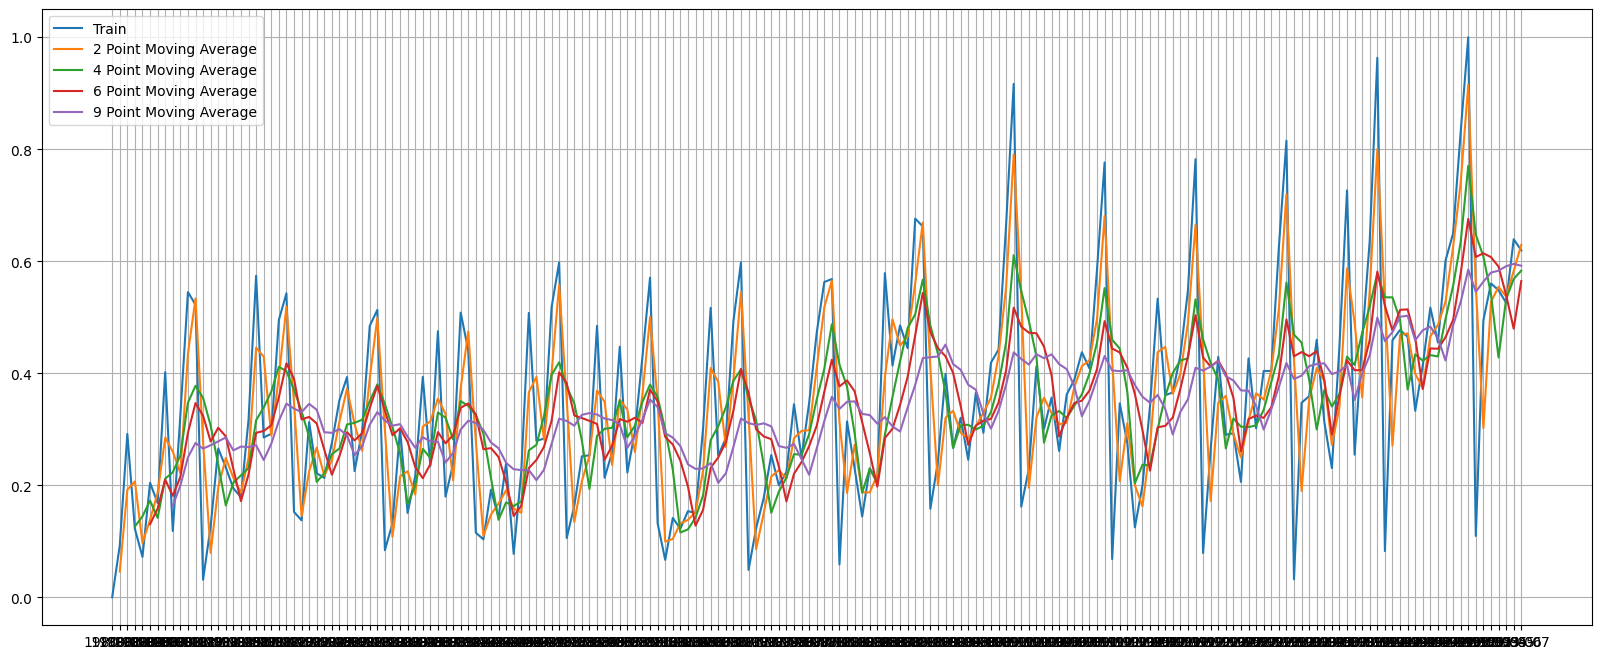

In [76]:

plt.plot(MovingAverage['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [77]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(train))] 

trailing_MovingAverage_test=MovingAverage[int(len(train)):]


YearMonth
1991-01    0.037260
1991-02    0.324658
1991-03    0.251233
1991-04    0.095890
1991-05    0.173151
Name: SoftDrinkProduction, dtype: float64

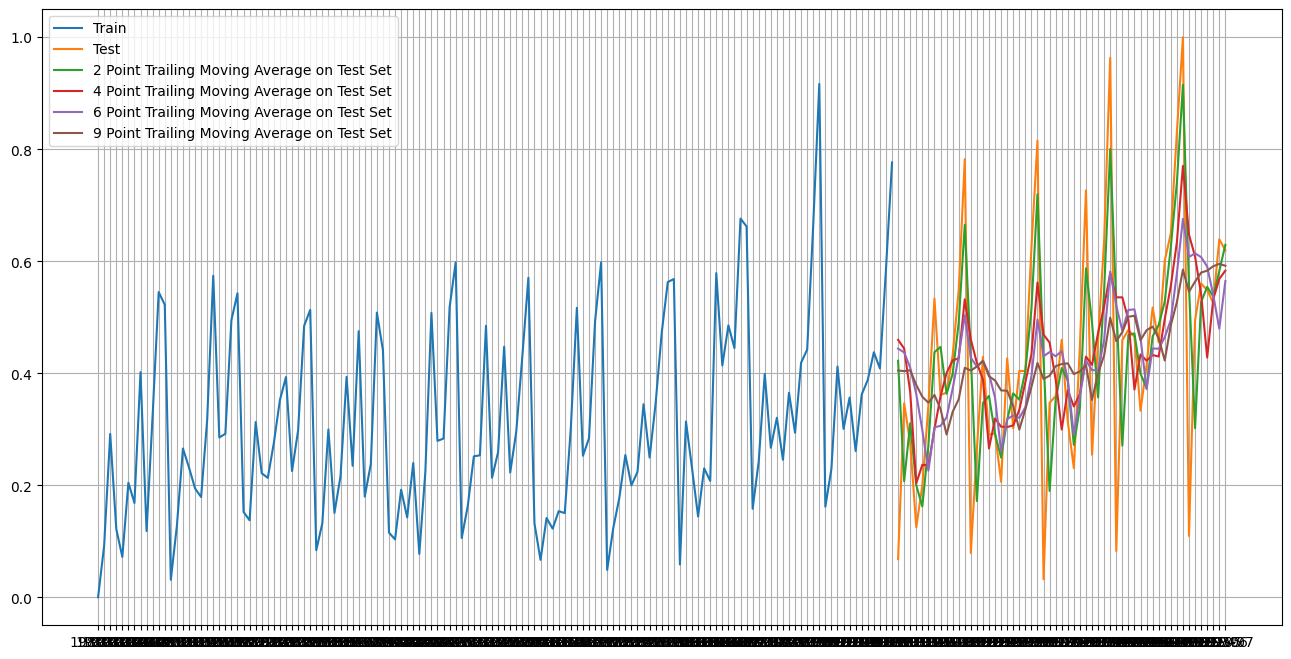

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

test['SoftDrinkProduction'].head()

In [79]:
trailing_MovingAverage_test['Trailing_2'].head()

YearMonth
1991-01    0.422302
1991-02    0.207239
1991-03    0.310793
1991-04    0.200080
1991-05    0.162291
Name: Trailing_2, dtype: float64

In [80]:
test['SoftDrinkProduction'].shape,trailing_MovingAverage_test['Trailing_2'].shape

((55,), (55,))

In [81]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 0.154
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 0.189
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 0.196
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 0.202


In [82]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

RMSE
Alpha=0.99,SES                      [0.22330590440164572]
Alpha=1,Beta=0.0189:DES                          0.220764
Alpha=0.25,Beta=0.0,Gamma=0.74:TES               0.136688
RegressionOnTime                                 0.220765
NaiveModel                                       0.484038
SimpleAverageModel                               0.234454
2pointTrailingMovingAverage                      0.153851
4pointTrailingMovingAverage                      0.189332
6pointTrailingMovingAverage                      0.195605
9pointTrailingMovingAverage                      0.202285

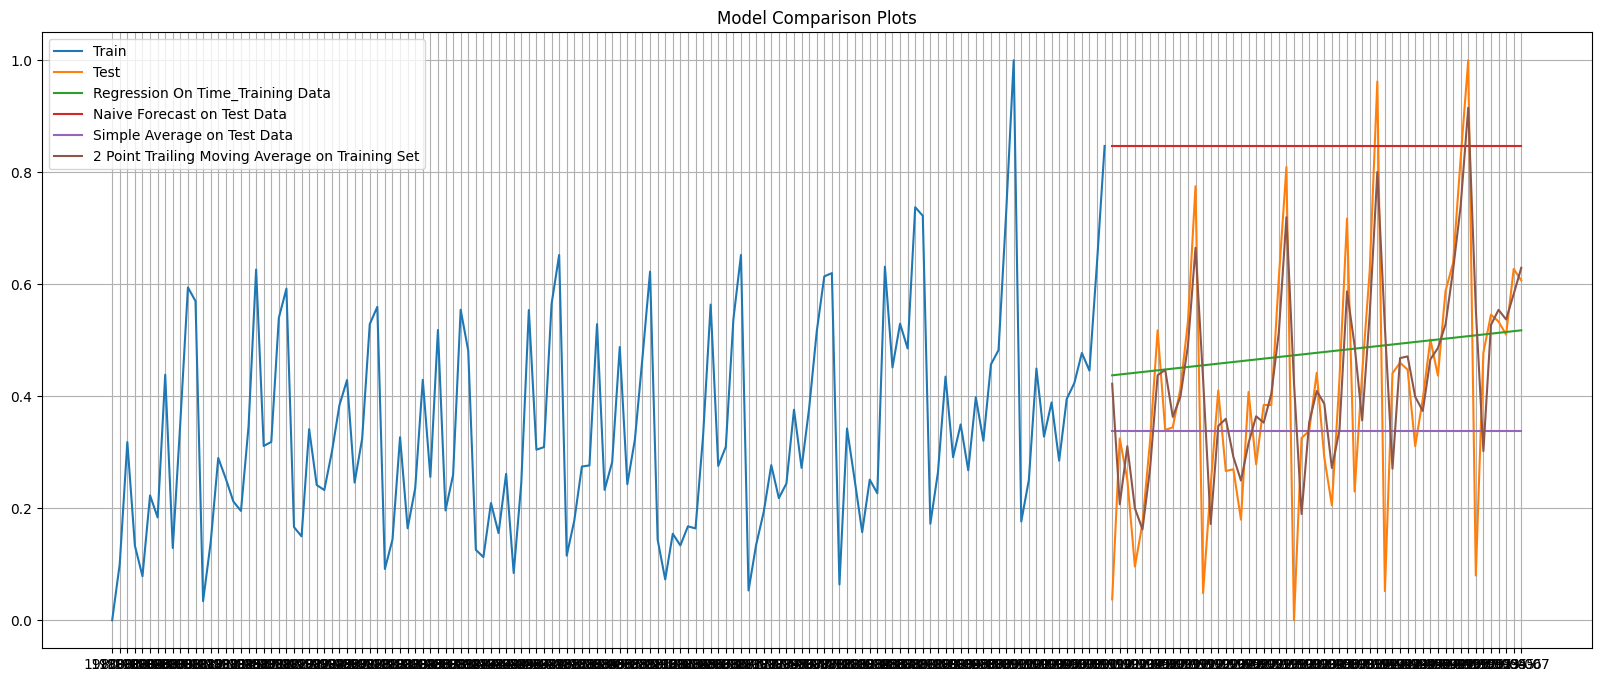

In [83]:
## Plotting on both Training and Test data

plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [84]:
# pd.DatetimeIndex(df.index).year
df
df.index = pd.DatetimeIndex(df.index)
df.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [85]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
print(df.index)

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)


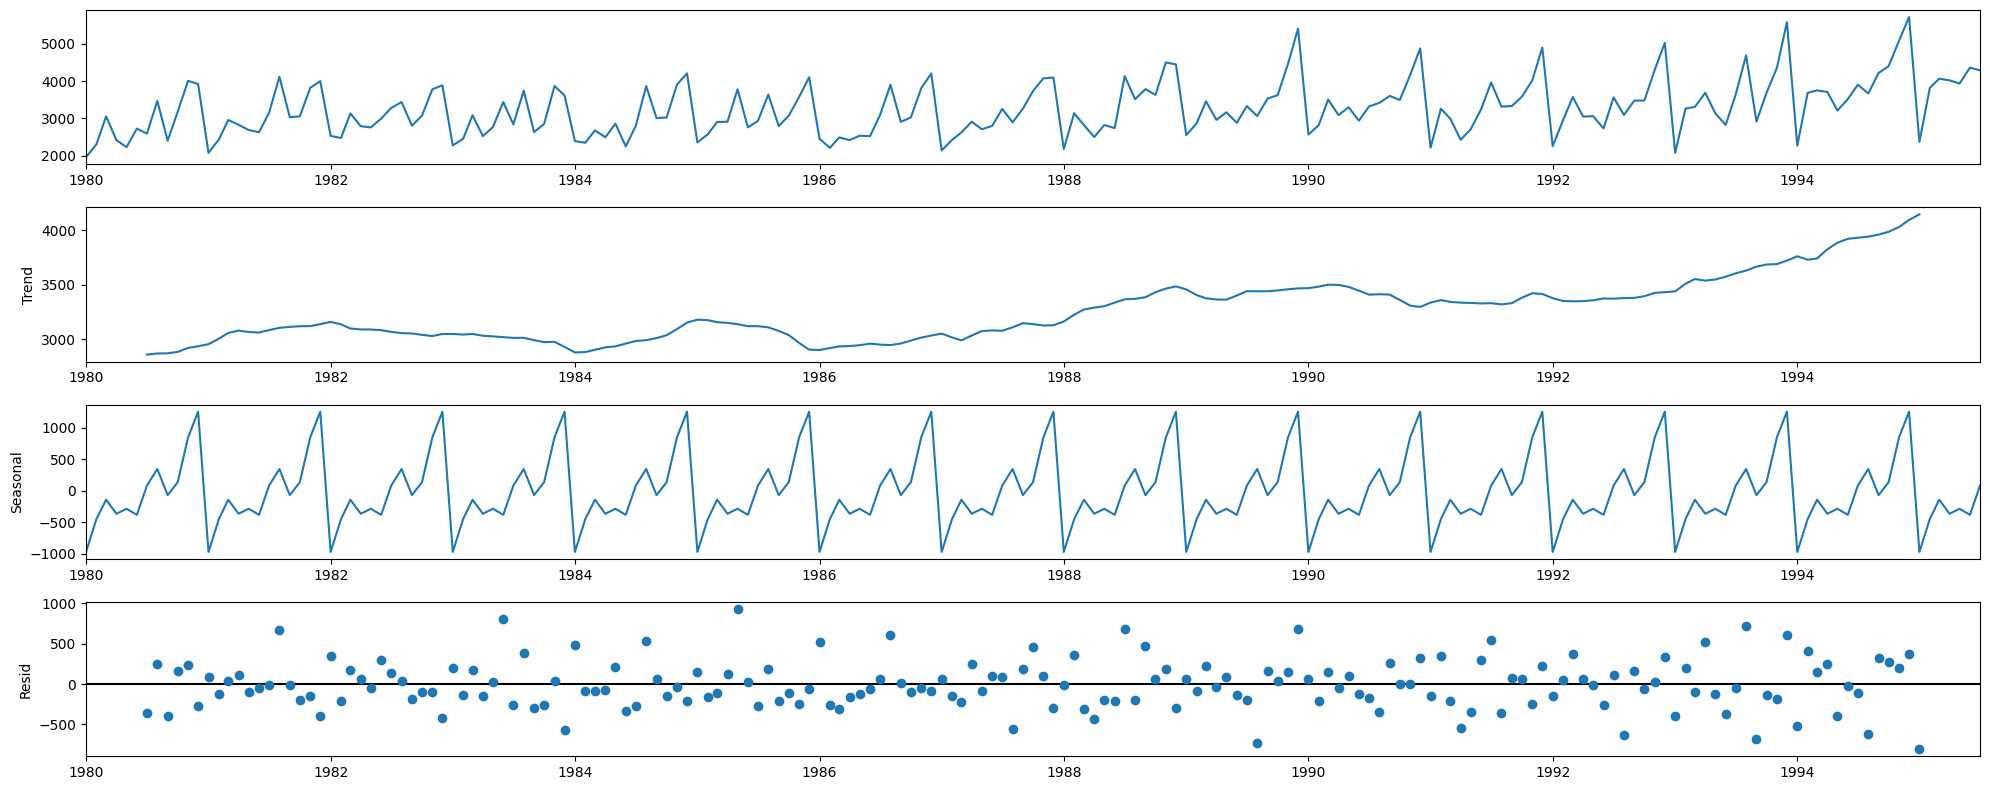

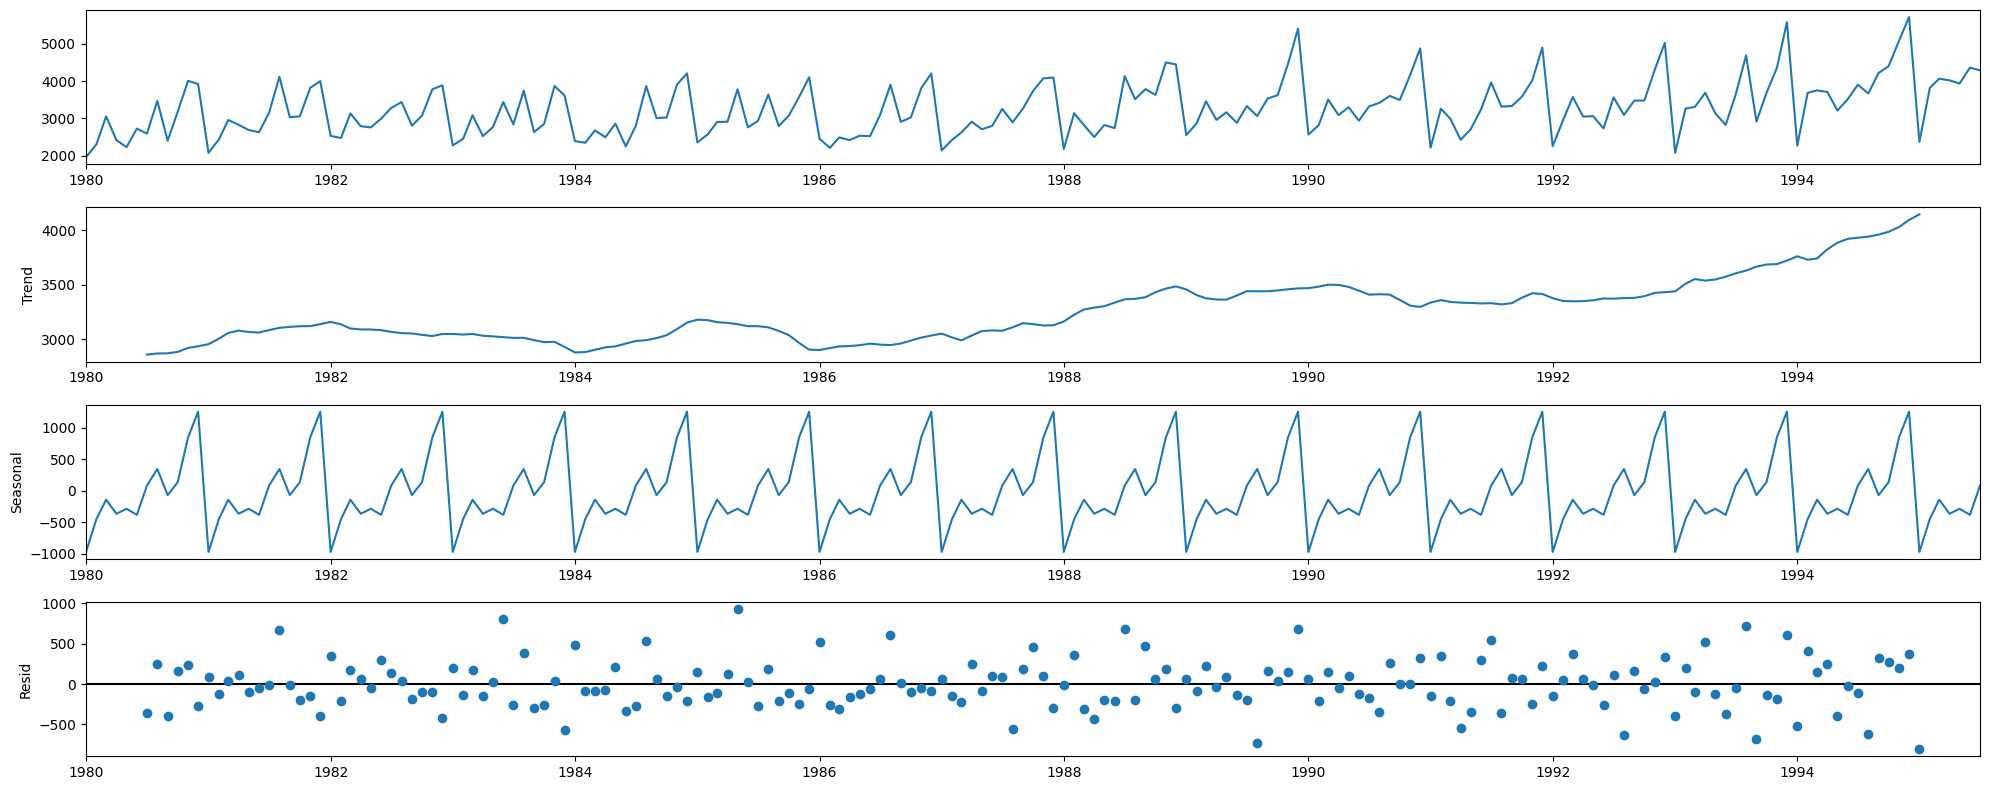

In [86]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot()

In [87]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -974.619692
1980-02-01    -451.246677
1980-03-01    -143.118700
1980-04-01    -366.181200
1980-05-01    -286.815129
1980-06-01    -383.594891
1980-07-01      82.191419
1980-08-01     346.363641
1980-09-01     -69.997470
1980-10-01     136.721974
1980-11-01     850.369196
1980-12-01    1259.927530
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01   -352.024752
1980-08-01    254.386359
1980-09-01   -400.669196
1980-10-01    159.444692


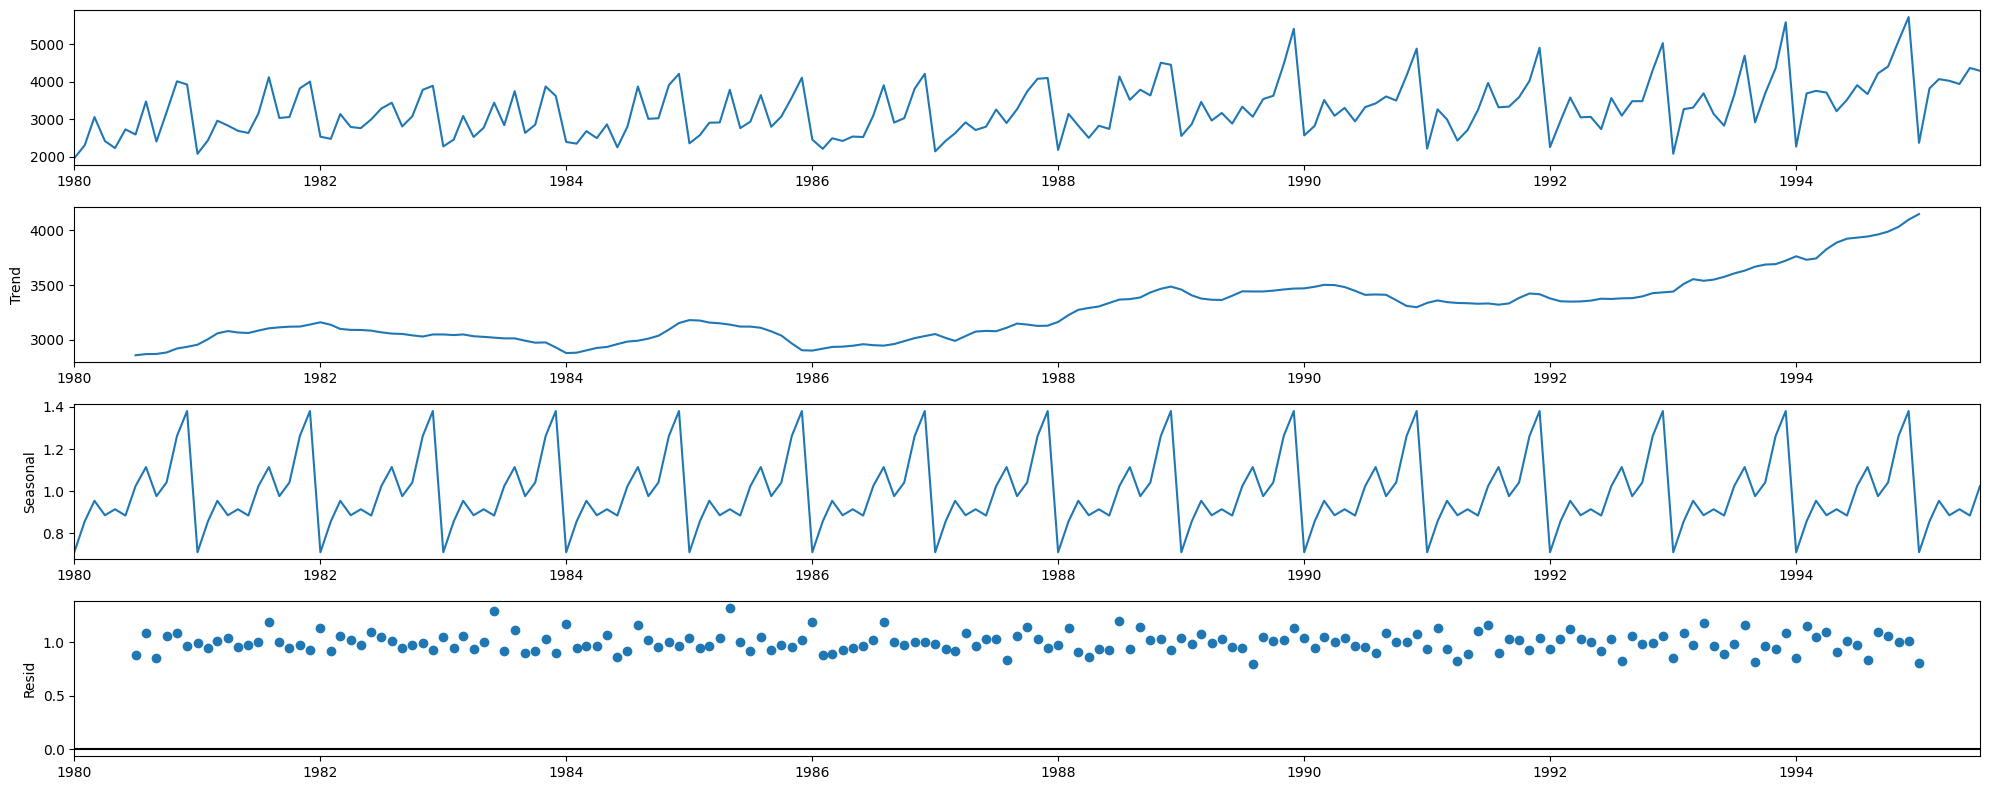

In [88]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [89]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.709526
1980-02-01    0.856420
1980-03-01    0.953935
1980-04-01    0.885217
1980-05-01    0.913735
1980-06-01    0.883890
1980-07-01    1.023936
1980-08-01    1.114195
1980-09-01    0.975955
1980-10-01    1.040944
1980-11-01    1.261792
1980-12-01    1.380456
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.884444
1980-08-01    1.085425
1980-09-01    0.856641
1980-10-01    1.059326
1980-11-01    1.087983
1980-12-01    0.968332
Name: resi

In [90]:
from statsmodels.tsa.stattools import adfuller

In [91]:
scaled_df = df.copy()
scaled_df.head()

scaler = MinMaxScaler()
# Fitting and Transforming the Training data
print(scaled_df.head())
scaled_df[scaled_df.columns] = scaler.fit_transform(scaled_df[scaled_df.columns])
print(scaled_df.head())
print(scaler.data_max_, scaler.data_min_)


            SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226
            SoftDrinkProduction
YearMonth                      
1980-01-01             0.000000
1980-02-01             0.092283
1980-03-01             0.291700
1980-04-01             0.121984
1980-05-01             0.072129
[5725.] [1954.]


In [92]:
dftest = adfuller(scaled_df,regression='ct')
print(type(dftest),len(dftest),dftest)
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

<class 'tuple'> 6 (-0.4249860609262015, 0.9861019765758292, 12, 174, {'1%': -4.011763737803776, '5%': -3.4360292512258863, '10%': -3.1420436590266103}, -259.8355982311638)
DF test statistic is -0.425
DF test p-value is 0.9861019765758292
Number of lags used 12


In [93]:
#NON STATIONARY 
#pvalue>significance level of 5% and ADF stat> any 1%,5%,10% 
#u can t reject null hypothesei 


#STATIONARY

#The p-value << significance level of 0.05 
#hence we can reject the null hypothesis


In [94]:
#HERE 0.8>> -3.43 and -1.5>critvial =>>>> NON STATIONARY SEREIS 


In [95]:
dftest = adfuller(scaled_df.diff().dropna(),regression='ct')
print(dftest)

print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

(-9.481347483136632, 3.053709292536092e-14, 11, 174, {'1%': -4.011763737803776, '5%': -3.4360292512258863, '10%': -3.1420436590266103}, -259.74264047969723)
DF test statistic is -9.481
DF test p-value is 3.053709292536092e-14
Number of lags used 11


In [96]:
# here d is 1

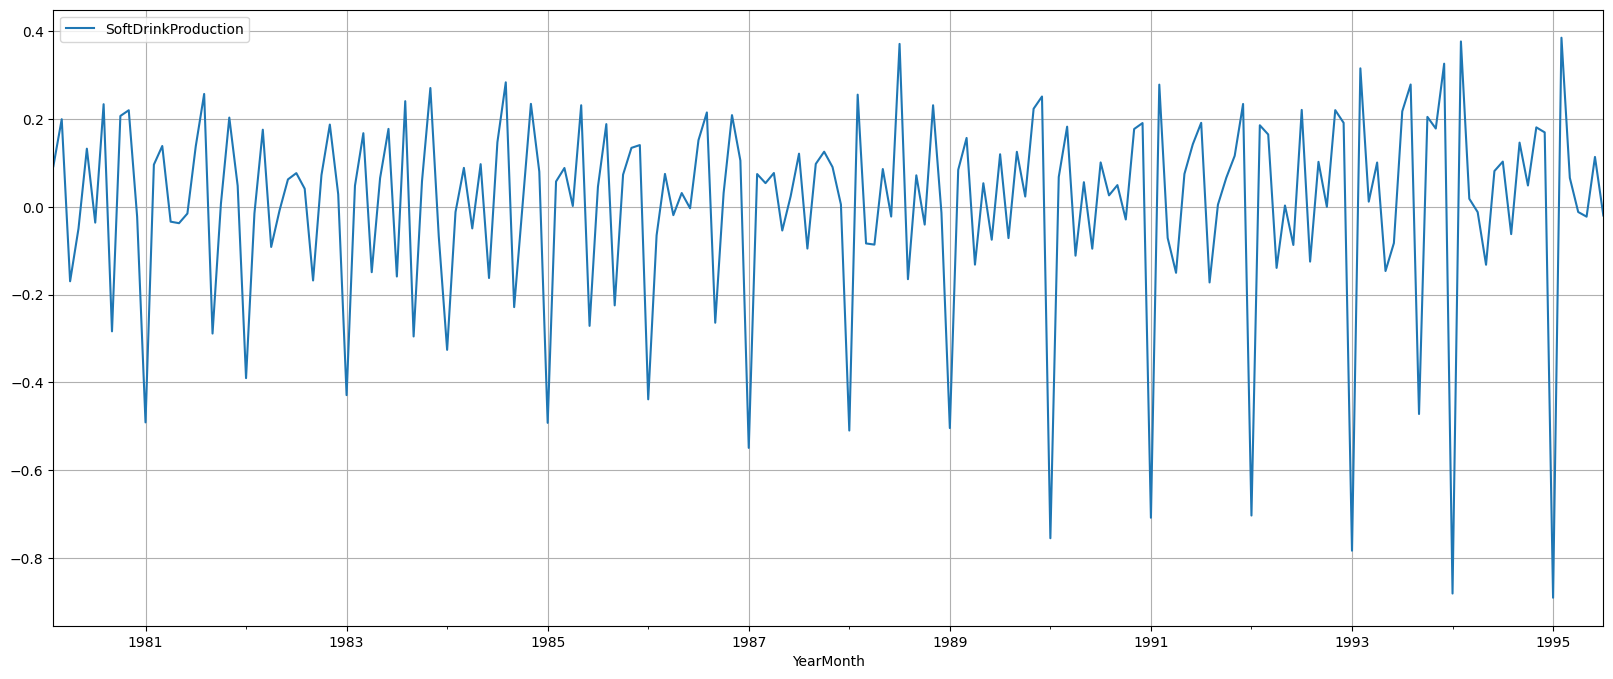

In [97]:
scaled_df.diff().dropna().plot(grid=True);

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

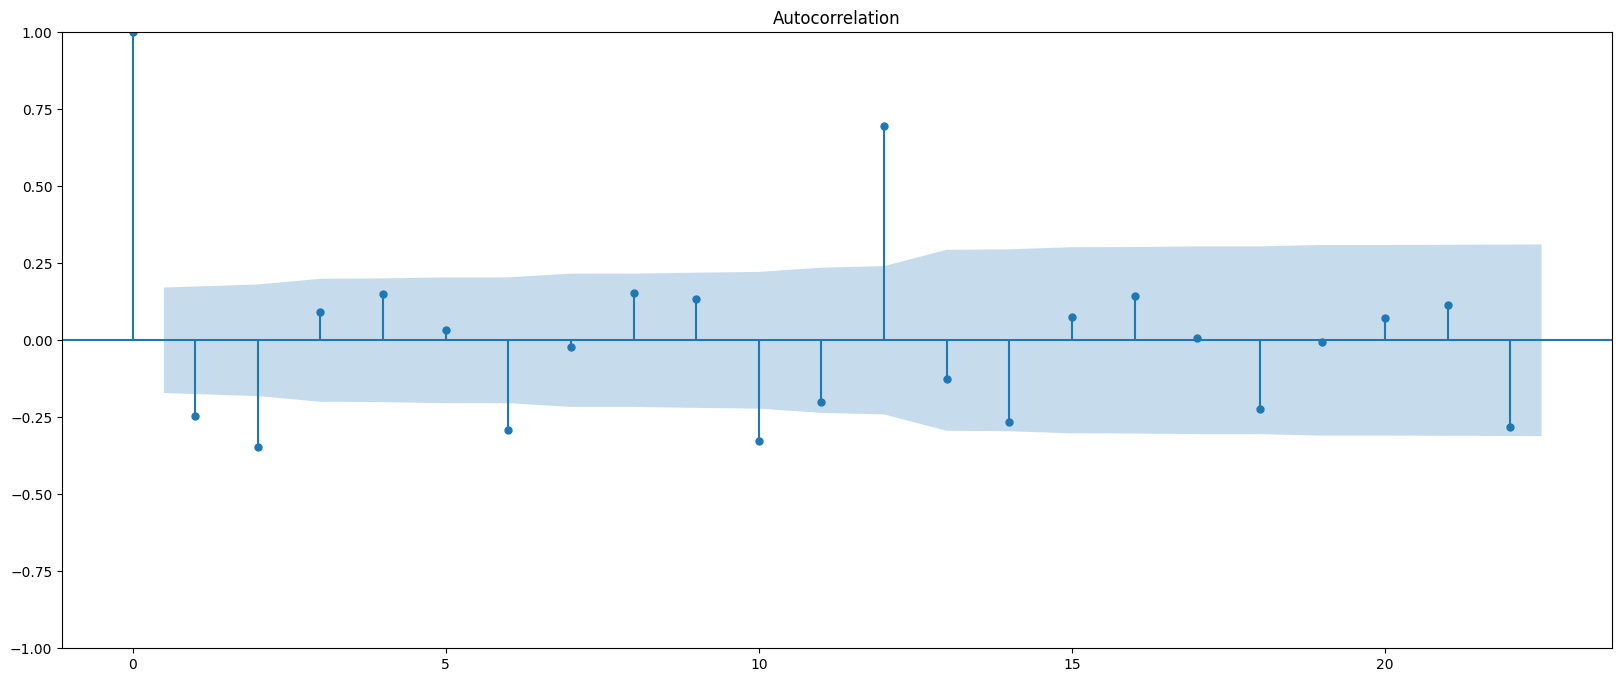

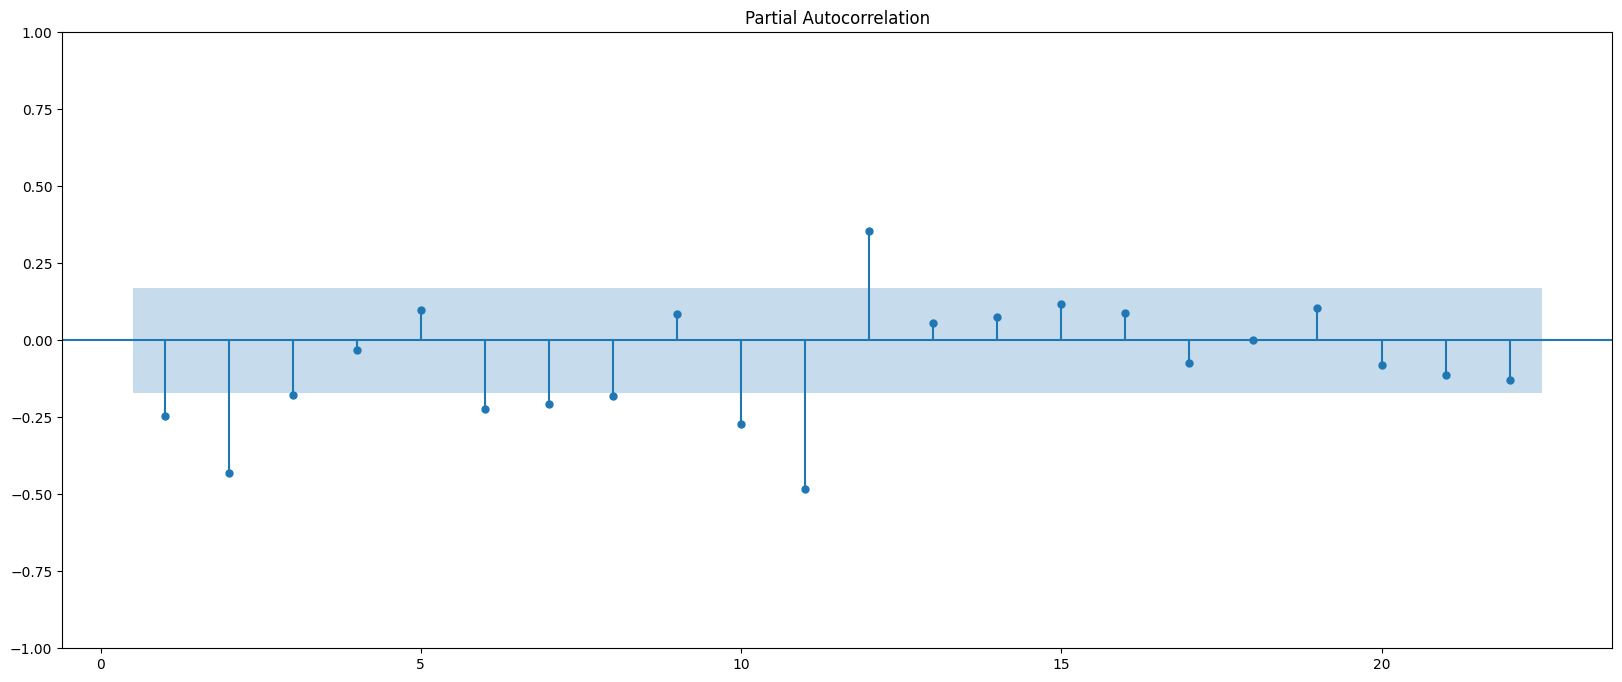

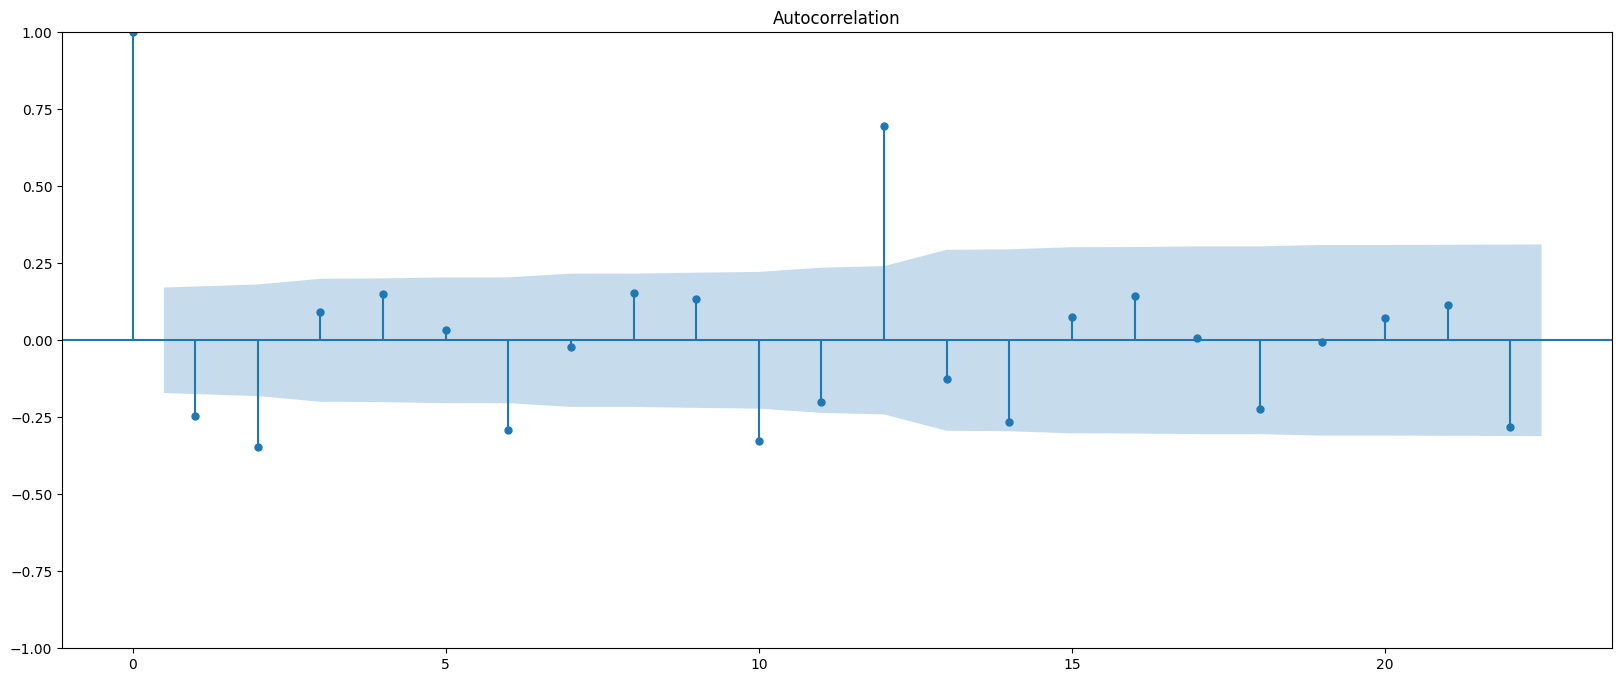

In [99]:
plot_pacf(train.diff().dropna(),zero=False,alpha=0.05,method='ywmle');
plot_acf(train.diff().dropna(),alpha=0.05)
#p=3 ,q=3

In [100]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.
#q=0,p=2
import itertools
p =q =  range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [101]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [102]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['SoftDrinkProduction'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:-31.084718117143368
ARIMA(0, 1, 1) - AIC:-68.4749993050964
ARIMA(0, 1, 2) - AIC:-80.74858277413517
ARIMA(0, 1, 3) - AIC:-80.80809698095672
ARIMA(1, 1, 0) - AIC:-37.2018396383532
ARIMA(1, 1, 1) - AIC:-75.69124066984352
ARIMA(1, 1, 2) - AIC:-80.83160619583452
ARIMA(1, 1, 3) - AIC:-78.88740992401677
ARIMA(2, 1, 0) - AIC:-63.11660693477543
ARIMA(2, 1, 1) - AIC:-78.39623706770965
ARIMA(2, 1, 2) - AIC:-78.89018750254155
ARIMA(2, 1, 3) - AIC:-76.89075934805433
ARIMA(3, 1, 0) - AIC:-65.89109324989074
ARIMA(3, 1, 1) - AIC:-79.33649301514615
ARIMA(3, 1, 2) - AIC:-76.89740104699668
ARIMA(3, 1, 3) - AIC:-79.62276046845415


/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [103]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param        AIC
6   (1, 1, 2) -80.831606
3   (0, 1, 3) -80.808097
2   (0, 1, 2) -80.748583
15  (3, 1, 3) -79.622760
13  (3, 1, 1) -79.336493

In [104]:
auto_ARIMA = ARIMA(train, order=(1,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(1, 1, 2)   Log Likelihood                  44.416
Date:                 Thu, 16 Feb 2023   AIC                            -80.832
Time:                         08:58:53   BIC                            -69.331
Sample:                     01-01-1980   HQIC                           -76.158
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3015      0.256     -1.177      0.239      -0.803       0.200
ma.L1         -0.2924      0.204     -1.430      0.153      -0.693       0.108
ma.L2         -0.6222      0.150     -4.161 

/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


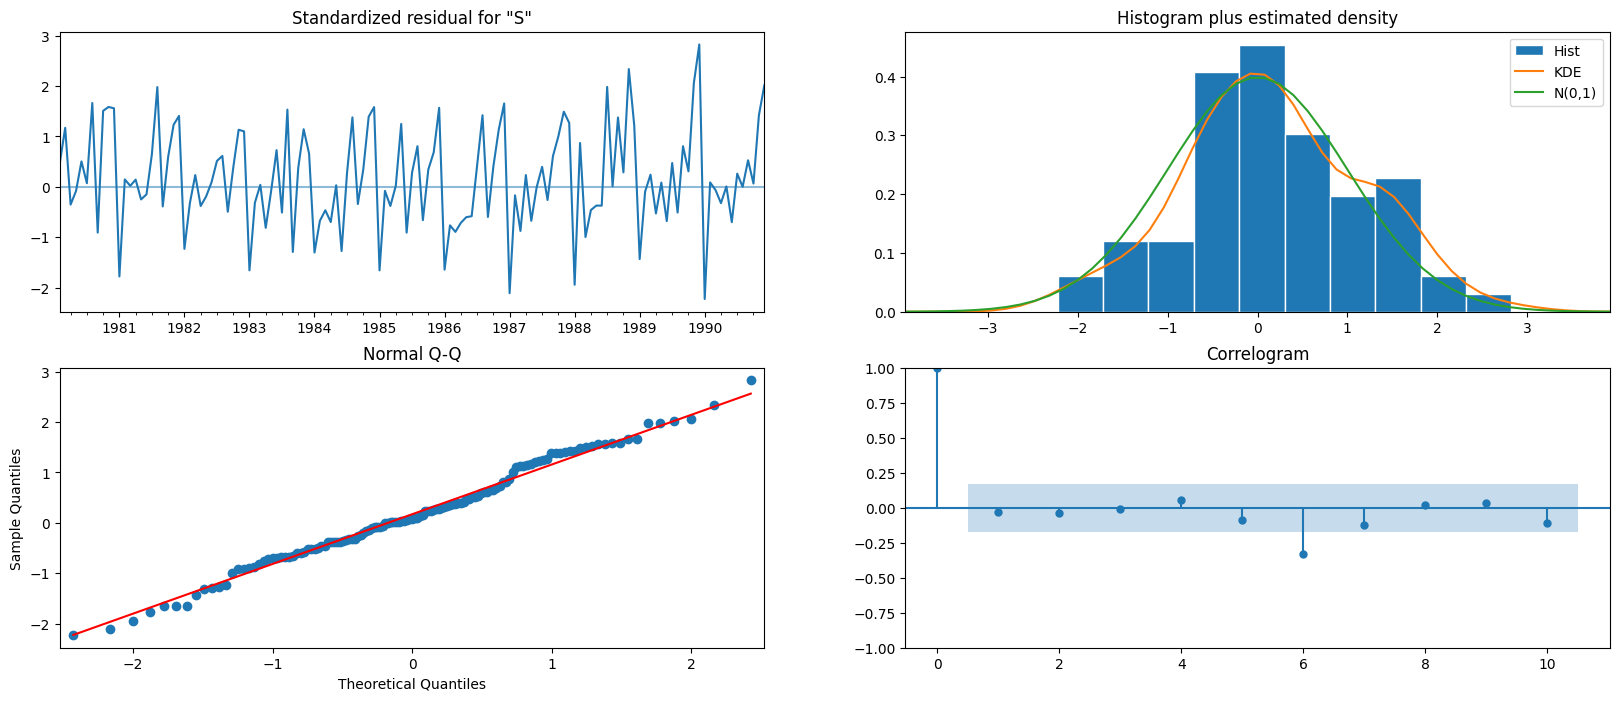

In [105]:
results_auto_ARIMA.plot_diagnostics();

In [106]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [107]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [108]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 0.2256393618580017 
MAPE: nan


In [109]:
resultsDf_ARIM = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(1,2,2) Automatic'])
resultsDf = pd.concat([resultsDf, resultsDf_ARIM])

resultsDf

RMSE  MAPE
Alpha=0.99,SES                      [0.22330590440164572]   NaN
Alpha=1,Beta=0.0189:DES                          0.220764   NaN
Alpha=0.25,Beta=0.0,Gamma=0.74:TES               0.136688   NaN
RegressionOnTime                                 0.220765   NaN
NaiveModel                                       0.484038   NaN
SimpleAverageModel                               0.234454   NaN
2pointTrailingMovingAverage                      0.153851   NaN
4pointTrailingMovingAverage                      0.189332   NaN
6pointTrailingMovingAverage                      0.195605   NaN
9pointTrailingMovingAverage                      0.202285   NaN
ARIMA(1,2,2) Automatic                           0.225639   NaN

In [110]:
print(train)

           SoftDrinkProduction
YearMonth                     
1980-01               0.000000
1980-02               0.100665
1980-03               0.318195
1980-04               0.133063
1980-05               0.078681
...                        ...
1990-08               0.423489
1990-09               0.477292
1990-10               0.445762
1990-11               0.638993
1990-12               0.846977

[132 rows x 1 columns]


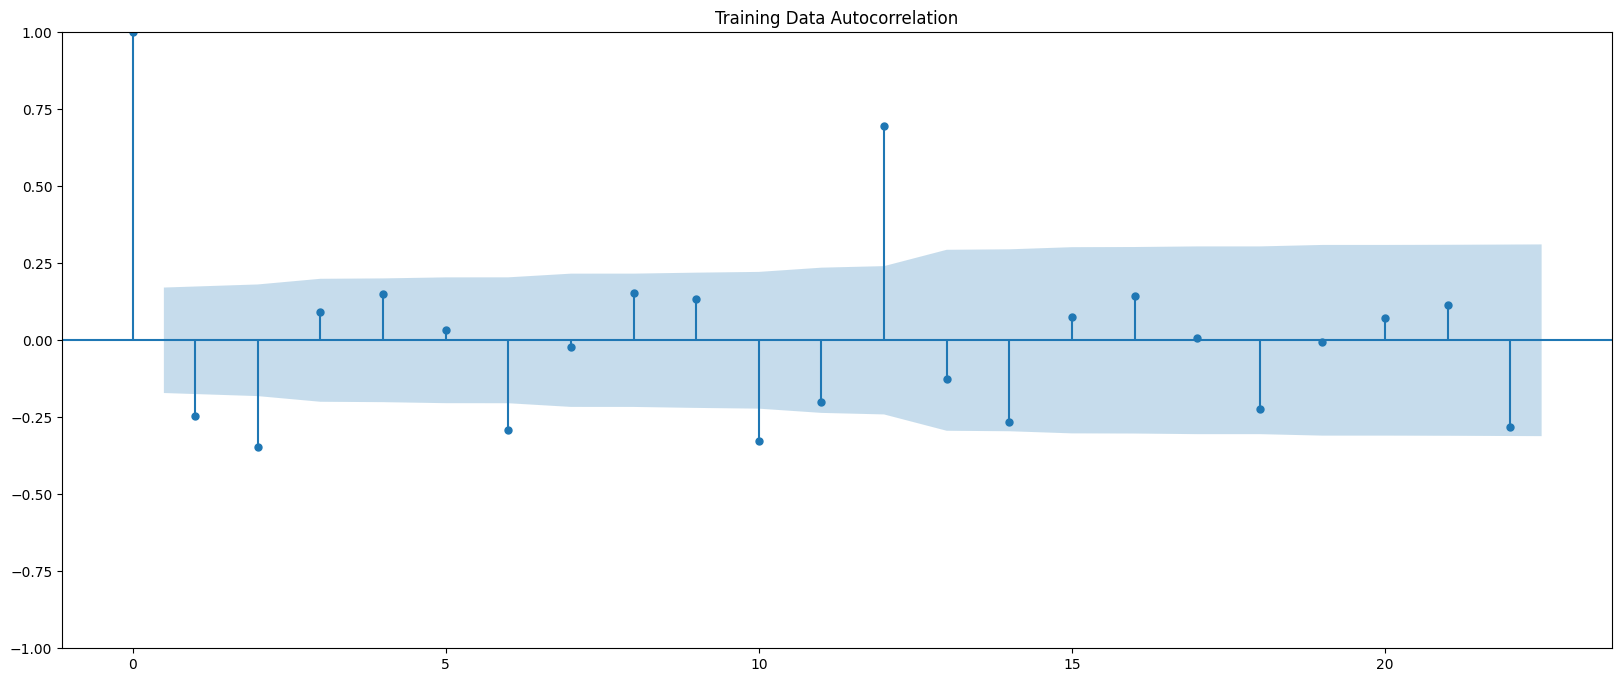

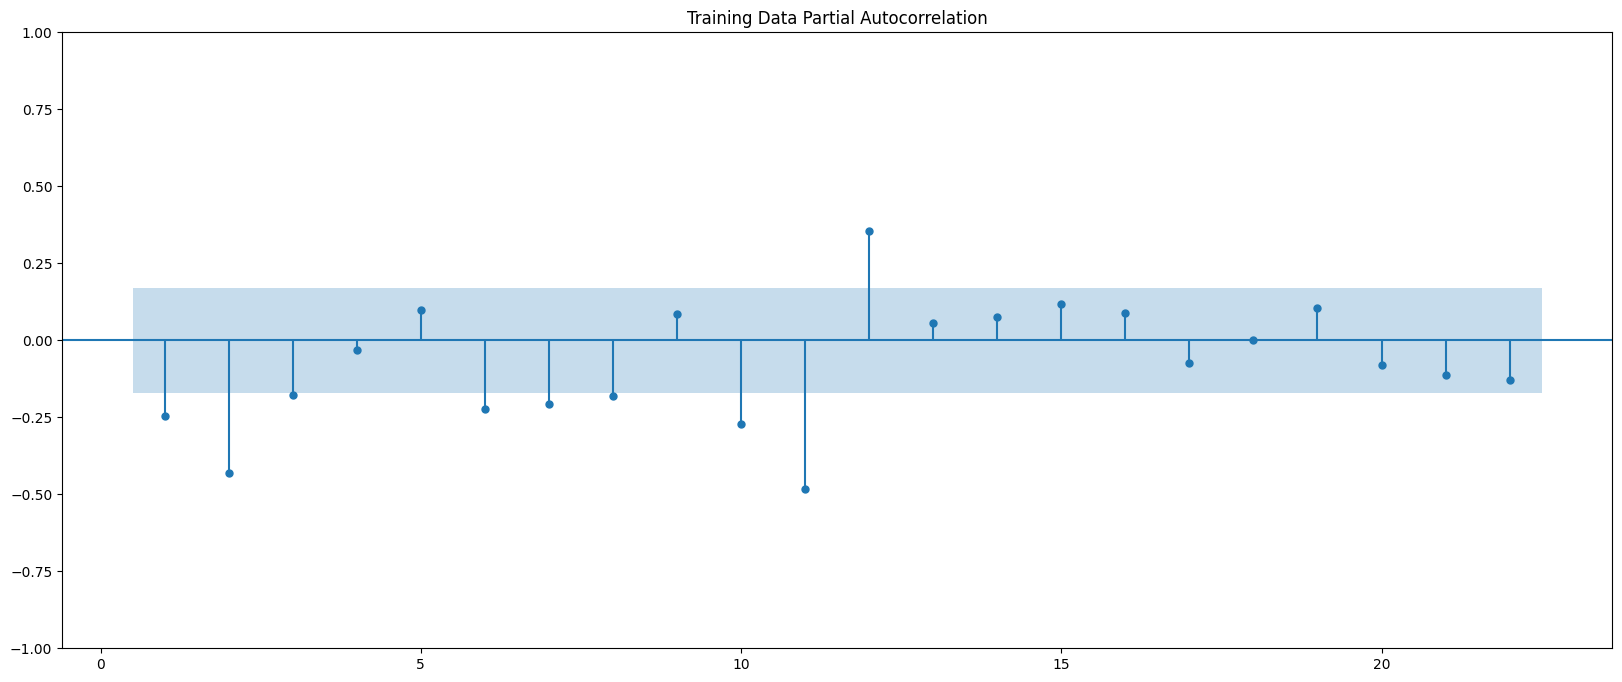

In [111]:
plot_acf(train.diff().dropna(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()


##WHEN TRAIN ONLY
#p=3,d=1,q=3---0.435

In [112]:
manual_ARIMA = ARIMA((train.diff().dropna()), order=(3,1,3))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  131
Model:                  ARIMA(3, 1, 3)   Log Likelihood                  38.759
Date:                 Thu, 16 Feb 2023   AIC                            -63.518
Time:                         08:58:54   BIC                            -43.445
Sample:                     02-01-1980   HQIC                           -55.362
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6888     14.074     -0.049      0.961     -28.274      26.896
ar.L2          0.1155      4.429      0.026      0.979      -8.565       8.796
ar.L3         -0.1957      2.765     -0.071 

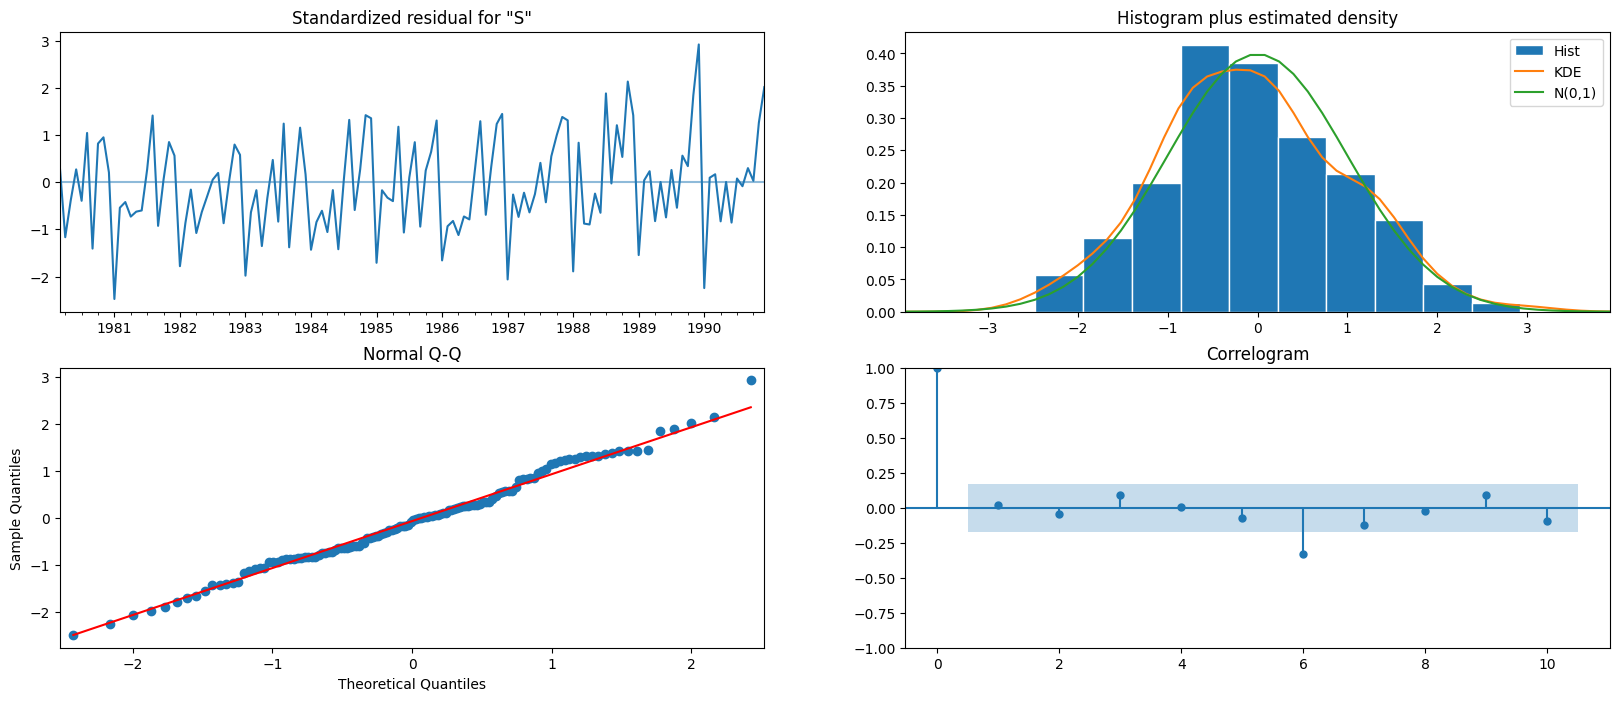

In [113]:
results_manual_ARIMA.plot_diagnostics();

In [114]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [115]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 0.47400589584359126 
MAPE: nan


In [116]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3) Manal'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE  MAPE
Alpha=0.99,SES                      [0.22330590440164572]   NaN
Alpha=1,Beta=0.0189:DES                          0.220764   NaN
Alpha=0.25,Beta=0.0,Gamma=0.74:TES               0.136688   NaN
RegressionOnTime                                 0.220765   NaN
NaiveModel                                       0.484038   NaN
SimpleAverageModel                               0.234454   NaN
2pointTrailingMovingAverage                      0.153851   NaN
4pointTrailingMovingAverage                      0.189332   NaN
6pointTrailingMovingAverage                      0.195605   NaN
9pointTrailingMovingAverage                      0.202285   NaN
ARIMA(1,2,2) Automatic                           0.225639   NaN
ARIMA(3,1,3) Manal                               0.474006   NaN

In [117]:
# plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [118]:
# plot_acf(df_train_stat.diff(),title='Training Data Autocorrelation',missing='drop');

In [119]:
# plot_acf(df_train_stat.diff().diff(),title='Training Data Autocorrelation',missing='drop');

In [120]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [121]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [122]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.21384D-01    |proj g|=  6.30880D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      6      1     0     0   2.483D-04  -1.214D-01
  F = -0.12142908384536218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:-30.057278135175615
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -2.91894D-01    |proj g|=  1.79286D-01

At iterate   10    f= -3.15752D-01    |proj g|=  1.29793D-02

At iterate   15    f= -3.15884D-01    |proj g|=  7.55007D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     20      1     0     0   7.550D-08  -3.159D-01
  F = -0.31588438802302143     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:-75.39347843807766
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -3.53599D-01    |proj g|=  3.63407D-01

At iterate   10    f= -3.61956D-01    |proj g|=  4.09841D-01

At iterate   15    f= -4.14039D-01    |proj g|=  5.95973D-02

At iterate   20    f= -4.15385D-01    |proj g|=  7.50866D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     35      1     0     0   1.860D-05  -4.154D-01
  F = -0.41538549252994017     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:-101.66177002790421
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate   15    f= -3.98234D-01    |proj g|=  4.56873D-01

At iterate   20    f= -4.44737D-01    |proj g|=  3.45427D-02

At iterate   25    f= -4.45292D-01    |proj g|=  2.60694D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     42      1     0     0   2.607D-05  -4.453D-01
  F = -0.44529154553057781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:-107.55696802007255
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -6.29111D-01    |proj g|=  2.18364D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   9.308D-06  -6.291D-01
  F = -0.62911161740938970     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:-156.08546699607888
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.52171D-01    |proj g|=  2.47563D-01

At iterate    5    f= -5.66802D-01    |proj g|=  2.02092D-01

At iterate   1

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   2.878D-05  -5.862D-01
  F = -0.58623251335899096     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:-142.7653835267736
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.49813D-01    |proj g|=  5.24114D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -5.56177D-01    |proj g|=  3.54409D-02

At iterate   20    f= -5.56663D-01    |proj g|=  8.34261D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   4.624D-04  -5.567D-01
  F = -0.55666441031514224     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:-136.95940432319756
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.81775D-01    |proj g|=  9.97636D-01

At iterate    

 This problem is unconstrained.



At iterate   20    f= -5.94744D-01    |proj g|=  1.87661D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     58      2     0     0   2.368D-04  -5.947D-01
  F = -0.59474440014149266     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:-145.01252163735407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.56596D-01    |proj g|=  2.64334D-01

At iterate    5    f= -5.66968D-01    |proj g|=  2.87135D-01

At iterate   10    f= -5.86225D-01    |proj g|=  1.09692D-01

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     23      1     0     0   2.366D-06  -4.837D-01
  F = -0.48368860225312804     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:-119.6937909948258
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.52525D-01    |proj g|=  1.19711D+00

At iterate    5    f= -4.13830D-01    |proj g|=  4.50475D-01

At iterate   10    f= -4.48627D-01    |proj g|=  3.01089D-02

At iterate   15

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     44      1     0     0   1.324D-04  -4.490D-01
  F = -0.44903938970026430     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:-108.54639888086977
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51557D-01    |proj g|=  6.52738D-01

At iterate    5    f= -3.48672D-01    |proj g|=  5.75045D-01

At iterate   10    f= -3.53750D-01    |proj g|=  4.38045D-03

           * *

 This problem is unconstrained.



At iterate   30    f= -6.35749D-01    |proj g|=  1.01227D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     44      1     0     0   1.191D-05  -6.357D-01
  F = -0.63574942831057757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:-157.8378490739925
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.98103D-01    |proj g|=  1.54055D+00

At iterate    5    f= -3.96732D-01    |proj g|=  5.54729D-01

At iterate   10

 This problem is unconstrained.



At iterate   20    f= -5.68020D-01    |proj g|=  2.12557D+00

At iterate   25    f= -6.26755D-01    |proj g|=  7.38991D-01

At iterate   30    f= -6.36163D-01    |proj g|=  2.49669D-01

At iterate   35    f= -6.41434D-01    |proj g|=  2.47306D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     56      1     0     0   1.436D-05  -6.414D-01
  F = -0.64144578403489427     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:-157.34168698521208
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -7.51980D-01    |proj g|=  1.47865D-02

At iterate   25    f= -7.51991D-01    |proj g|=  1.76301D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     48      1     0     0   3.385D-05  -7.520D-01
  F = -0.75199135948510476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:-188.52571890406765
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.88541D-01    |proj g|=  3.21911D+00

At iterate    

 This problem is unconstrained.



At iterate   10    f= -8.24408D-01    |proj g|=  2.77352D-01

At iterate   15    f= -8.25839D-01    |proj g|=  9.18925D-03

At iterate   20    f= -8.25906D-01    |proj g|=  4.88049D-03

At iterate   25    f= -8.25907D-01    |proj g|=  2.42264D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     38      1     0     0   2.423D-04  -8.259D-01
  F = -0.82590665746083547     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:-206.03935756966055
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f= -7.36092D-01    |proj g|=  3.85393D-01

At iterate   10    f= -7.67978D-01    |proj g|=  2.71561D-01

At iterate   15    f= -7.73210D-01    |proj g|=  2.87357D-02

At iterate   20    f= -7.73958D-01    |proj g|=  8.97682D-03

At iterate   25    f= -7.73969D-01    |proj g|=  5.17455D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     40      1     0     0   2.353D-04  -7.740D-01
  F = -0.77396859103232452     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:-190.32770803253368
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f= -7.00824D-01    |proj g|=  1.59280D-02

At iterate   20    f= -7.02525D-01    |proj g|=  7.10786D+00

At iterate   25    f= -7.04304D-01    |proj g|=  4.32040D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     60      1     0     0   4.200D-02  -7.043D-01
  F = -0.70430477991051932     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:-175.9364618963771
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.58476D-01    |proj g|=  2.92216D+00

At iterate    5    f= -6.90303D-01    |proj g|=  8.28400D-01

At iterate   10    f= -6.98859D-01    |proj g|=  2.67517D-02

At iterate   15    f= -7.02356D-01    |proj g|=  3.46557D-01

At iterate   20    f= -7.19326D-01    |proj g|=  4.46172D-02

At iterate   25    f= -7.22960D-01    |proj g|=  5.44732D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     43      1     0     0   4.467D-04  -7.230D-01
  F = -0.72296010267851

 This problem is unconstrained.



At iterate   10    f= -7.83957D-01    |proj g|=  6.12317D-02

At iterate   15    f= -7.86722D-01    |proj g|=  4.02420D-02

At iterate   20    f= -7.86845D-01    |proj g|=  1.72922D-02

At iterate   25    f= -7.86880D-01    |proj g|=  8.73982D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     39      1     0     0   8.740D-05  -7.869D-01
  F = -0.78688029287537176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(3, 0, 2, 6) - AIC:-193.73639731909813
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f= -7.39266D-01    |proj g|=  4.02841D-01

At iterate   10    f= -7.72267D-01    |proj g|=  2.59090D-01

At iterate   15    f= -7.74274D-01    |proj g|=  1.58129D-02

At iterate   20    f= -7.74654D-01    |proj g|=  6.01470D-03

At iterate   25    f= -7.74752D-01    |proj g|=  4.00563D-02

At iterate   30    f= -7.75102D-01    |proj g|=  5.99538D-02

At iterate   35    f= -7.75212D-01    |proj g|=  3.67489D-03

At iterate   40    f= -7.75213D-01    |proj g|=  1.47698D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     56      1     0     0   1.032D-03  -7.752D-01
  F = -0.775213204855

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -5.19543D-01    |proj g|=  1.46641D-01

At iterate   15    f= -5.20140D-01    |proj g|=  6.92083D-03

At iterate   20    f= -5.20149D-01    |proj g|=  3.91803D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     35      1     0     0   2.057D-04  -5.201D-01
  F = -0.52014867952120514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:-127.31925139359817
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   15    f= -4.88716D-01    |proj g|=  1.52327D-02

At iterate   20    f= -4.89309D-01    |proj g|=  6.23355D-04

At iterate   25    f= -4.89310D-01    |proj g|=  4.56719D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   4.567D-05  -4.893D-01
  F = -0.48930978278136583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 0, 3, 6) - AIC:-117.17778265428058
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -3.89283D-01    |proj g|=  3.15865D-01

At iterate   10    f= -5.51632D-01    |proj g|=  4.91138D-01

At iterate   15    f= -5.79048D-01    |proj g|=  1.14565D-01

At iterate   20    f= -5.80460D-01    |proj g|=  1.14902D-01

At iterate   25    f= -5.81120D-01    |proj g|=  3.08328D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     43      1     0     0   8.325D-05  -5.811D-01
  F = -0.58111998395654008     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:-143.41567576452658
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f= -5.99624D-01    |proj g|=  3.13496D-01

At iterate   20    f= -6.29392D-01    |proj g|=  1.52289D-01

At iterate   25    f= -6.34731D-01    |proj g|=  3.22413D-02

At iterate   30    f= -6.34920D-01    |proj g|=  1.45386D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     44      1     0     0   1.454D-04  -6.349D-01
  F = -0.63491986282354973     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:-155.61884378541714
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f= -4.79729D-01    |proj g|=  7.43338D-01

At iterate   10    f= -4.93519D-01    |proj g|=  5.73350D-02

At iterate   15    f= -5.02602D-01    |proj g|=  1.06979D-01

At iterate   20    f= -5.48403D-01    |proj g|=  7.71102D-01

At iterate   25    f= -6.32537D-01    |proj g|=  1.28329D-01

At iterate   30    f= -6.37203D-01    |proj g|=  1.49795D-02

At iterate   35    f= -6.37353D-01    |proj g|=  3.69533D-02

At iterate   40    f= -6.37391D-01    |proj g|=  1.98242D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     68      1     0     0   1.982D-04  -6.374D-01
  F = -0.637390700084

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.24929D-01    |proj g|=  3.28116D+00

At iterate    5    f= -7.71968D-01    |proj g|=  4.79307D-01

At iterate   10    f= -7.77502D-01    |proj g|=  4.46239D-02

At iterate   15    f= -7.77522D-01    |proj g|=  9.29843D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     31      1     0     0   9.298D-05  -7.775D-01
  F = -0.77752184387799139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0

 This problem is unconstrained.



At iterate    5    f= -7.96237D-01    |proj g|=  4.08641D-01

At iterate   10    f= -8.07552D-01    |proj g|=  6.36253D-01

At iterate   15    f= -8.20640D-01    |proj g|=  2.33661D-02

At iterate   20    f= -8.21182D-01    |proj g|=  4.91506D-02

At iterate   25    f= -8.21222D-01    |proj g|=  5.73040D-03

At iterate   30    f= -8.21228D-01    |proj g|=  1.65608D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     45      1     0     0   9.966D-05  -8.212D-01
  F = -0.82122779595026107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:-202.80413813086

 This problem is unconstrained.



At iterate    5    f= -7.42650D-01    |proj g|=  1.14507D-01

At iterate   10    f= -7.71260D-01    |proj g|=  1.31289D-01

At iterate   15    f= -7.76709D-01    |proj g|=  4.48355D-02

At iterate   20    f= -7.76786D-01    |proj g|=  2.77527D-02

At iterate   25    f= -7.76794D-01    |proj g|=  5.84799D-04

At iterate   30    f= -7.76794D-01    |proj g|=  6.40174D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     32     46      1     0     0   6.030D-05  -7.768D-01
  F = -0.77679422919398378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 3, 6) - AIC:-189.07367650721

 This problem is unconstrained.


  ys=-4.489E-03  -gs= 1.298E-04 BFGS update SKIPPED

At iterate   15    f= -7.29521D-01    |proj g|=  5.01331D-02

At iterate   20    f= -7.29532D-01    |proj g|=  2.12376D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f= -7.29533D-01    |proj g|=  4.04273D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     89      2     1     0   4.043D-03  -7.295D-01
  F = -0.72953289998611837     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(3, 0, 0, 6) - AIC:-180.59668559633525
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.94129D-01    |proj g|=  3.07822D+00

At iterate    5    f= -7.17605D-01    |proj g|=  8.35543D-02

At iterate   1

 This problem is unconstrained.



At iterate    5    f= -7.65325D-01    |proj g|=  4.47424D-01

At iterate   10    f= -7.83212D-01    |proj g|=  2.06110D-01

At iterate   15    f= -7.87097D-01    |proj g|=  3.32500D-01

At iterate   20    f= -7.89633D-01    |proj g|=  2.71772D-03

At iterate   25    f= -7.89669D-01    |proj g|=  1.56939D-02

At iterate   30    f= -7.89694D-01    |proj g|=  5.98726D-03

At iterate   35    f= -7.89695D-01    |proj g|=  1.43588D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     48      1     0     0   3.689D-05  -7.897D-01
  F = -0.78969461957614784     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -7.42892D-01    |proj g|=  3.12223D-01

At iterate   10    f= -7.60428D-01    |proj g|=  1.02967D-01

At iterate   15    f= -7.70755D-01    |proj g|=  2.06055D-01

At iterate   20    f= -7.76546D-01    |proj g|=  4.75674D-02

At iterate   25    f= -7.76817D-01    |proj g|=  4.97022D-03

At iterate   30    f= -7.76820D-01    |proj g|=  3.80062D-03

At iterate   35    f= -7.76821D-01    |proj g|=  2.93900D-04

At iterate   40    f= -7.76822D-01    |proj g|=  1.08588D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     43     59      1     0     0   1.473D-03  -7.768D-01
  F = -0.776822787462

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -3.42822D-01    |proj g|=  2.89620D-03

At iterate   20    f= -3.42827D-01    |proj g|=  1.41467D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     30      1     0     0   8.205D-06  -3.428D-01
  F = -0.34282747396363000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 3)x(0, 0, 1, 6) - AIC:-80.50645312639833
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.17107D-01    |proj g|=  2.00604D+00

At iterate    5

 This problem is unconstrained.



At iterate   15    f= -4.89879D-01    |proj g|=  1.02595D-02

At iterate   20    f= -4.89919D-01    |proj g|=  2.04649D-03

At iterate   25    f= -4.89920D-01    |proj g|=  2.70692D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     35      1     0     0   1.244D-04  -4.899D-01
  F = -0.48991964364496066     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:-115.33878592226961
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -3.92108D-01    |proj g|=  1.97828D-02

At iterate   15    f= -3.92305D-01    |proj g|=  4.75211D-04

At iterate   20    f= -3.92305D-01    |proj g|=  4.52618D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   1.885D-05  -3.923D-01
  F = -0.39230514062885447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(1, 0, 0, 6) - AIC:-93.56855712601758
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   20    f= -6.38011D-01    |proj g|=  8.92541D-01

At iterate   25    f= -6.51257D-01    |proj g|=  1.30431D-01

At iterate   30    f= -6.53844D-01    |proj g|=  7.02080D-02

At iterate   35    f= -6.54988D-01    |proj g|=  1.03666D-02

At iterate   40    f= -6.55021D-01    |proj g|=  2.25861D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     57      1     0     0   1.219D-05  -6.550D-01
  F = -0.65502150128881653     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:-158.92567634024758
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f= -4.90628D-01    |proj g|=  1.19989D-01

At iterate   10    f= -5.04590D-01    |proj g|=  1.23293D-01

At iterate   15    f= -6.02206D-01    |proj g|=  1.86457D-01

At iterate   20    f= -6.32293D-01    |proj g|=  3.70913D-01

At iterate   25    f= -6.36220D-01    |proj g|=  3.43872D-01

At iterate   30    f= -6.37222D-01    |proj g|=  1.37443D-01

At iterate   35    f= -6.39155D-01    |proj g|=  5.49427D-02

At iterate   40    f= -6.39264D-01    |proj g|=  8.09554D-03

At iterate   45    f= -6.39280D-01    |proj g|=  2.49924D-03

At iterate   50    f= -6.39283D-01    |proj g|=  8.85542D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   35    f= -7.77558D-01    |proj g|=  1.20552D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     50      1     0     0   1.473D-04  -7.776D-01
  F = -0.77755826502986791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:-193.27538196788512
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.52028D-01    |proj g|=  3.22970D+00

At iterate    5    f= -7.37939D-01    |proj g|=  2.16304D-01

At iterate   1

 This problem is unconstrained.



At iterate   25    f= -7.77646D-01    |proj g|=  3.46332D-02

At iterate   30    f= -7.77876D-01    |proj g|=  4.41772D-03

At iterate   35    f= -7.77880D-01    |proj g|=  4.78903D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     48      1     0     0   1.629D-04  -7.779D-01
  F = -0.77788034759319402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:-191.3604117646032
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f= -8.09228D-01    |proj g|=  4.70449D-02

At iterate   15    f= -8.09405D-01    |proj g|=  4.39052D-03

At iterate   20    f= -8.09410D-01    |proj g|=  1.47802D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     22     33      1     0     0   6.652D-05  -8.094D-01
  F = -0.80941007635514606     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:-197.68426015775856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f= -7.15476D-01    |proj g|=  1.98780D+00

At iterate   10    f= -7.45289D-01    |proj g|=  1.83180D-01

At iterate   15    f= -7.66499D-01    |proj g|=  2.56016D-01

At iterate   20    f= -7.67940D-01    |proj g|=  9.75552D-03

At iterate   25    f= -7.68048D-01    |proj g|=  2.75135D-03

At iterate   30    f= -7.68052D-01    |proj g|=  5.21058D-03

At iterate   35    f= -7.68053D-01    |proj g|=  3.16124D-04

At iterate   40    f= -7.68053D-01    |proj g|=  1.10534D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     44     53      1     0     0   2.953D-04  -7.681D-01
  F = -0.768052998749

 This problem is unconstrained.



At iterate   20    f= -7.25648D-01    |proj g|=  5.24095D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -7.25697D-01    |proj g|=  6.56679D-02

At iterate   30    f= -7.26877D-01    |proj g|=  8.85172D-01

At iterate   35    f= -7.27089D-01    |proj g|=  5.61944D+00

At iterate   40    f= -7.28199D-01    |proj g|=  1.89356D+00

At iterate   45    f= -7.28257D-01    |proj g|=  4.65590D-01

At iterate   50    f= -7.28472D-01    |proj g|=  3.60888D+00

At iterate   55    f= -7.28578D-01    |proj g|=  2.63083D-01

At iterate   60    f= -7.29134D-01    |proj g|=  1.76689D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     64    156      3     1     0   1.293D-01  -7.292D-01
  F = -0.72919482653562417     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:-178.5074342054048
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.19611D-01    |proj g|=  3.01672D+00

At iterate    5    f= -6.85004D-01    |proj g|=  2.43887D-01

At iterate   10    f= -7.16966D-01    |proj g|=  7.58221D-02

At iterate   15

 This problem is unconstrained.



At iterate   10    f= -7.88183D-01    |proj g|=  8.87572D-02

At iterate   15    f= -7.91256D-01    |proj g|=  3.11270D-02

At iterate   20    f= -7.91287D-01    |proj g|=  2.20243D-02

At iterate   25    f= -7.91318D-01    |proj g|=  1.77887D-03

At iterate   30    f= -7.91328D-01    |proj g|=  2.70914D-03

At iterate   35    f= -7.91335D-01    |proj g|=  1.58304D-03

At iterate   40    f= -7.91336D-01    |proj g|=  1.01015D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     52      1     0     0   3.619D-05  -7.913D-01
  F = -0.79133577857575998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -7.11752D-01    |proj g|=  7.02503D-01

At iterate   10    f= -7.54460D-01    |proj g|=  3.14347D-01

At iterate   15    f= -7.65137D-01    |proj g|=  1.07669D-01

At iterate   20    f= -7.67783D-01    |proj g|=  1.33534D-02

At iterate   25    f= -7.68018D-01    |proj g|=  3.61279D-03

At iterate   30    f= -7.68023D-01    |proj g|=  3.85078D-03

At iterate   35    f= -7.68029D-01    |proj g|=  1.16768D-02

At iterate   40    f= -7.68035D-01    |proj g|=  1.59156D-02

At iterate   45    f= -7.68042D-01    |proj g|=  1.84520D-03

At iterate   50    f= -7.68048D-01    |proj g|=  4.40318D-03

At iterate   55    f= -7.68056D-01    |proj g|=  5.73103D-03

At iterate   60    f= -7.68058D-01    |proj g|=  1.93212D-03

At iterate   65    f= -7.68058D-01    |proj g|=  5.47291D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -3.72913D-01    |proj g|=  6.57855D-03

At iterate   15    f= -3.72940D-01    |proj g|=  1.04082D-03

At iterate   20    f= -3.72941D-01    |proj g|=  1.57958D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   3.477D-05  -3.729D-01
  F = -0.37294055580011559     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:-90.45630673123051
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -3.87967D-01    |proj g|=  2.30211D-01

At iterate   10    f= -3.95219D-01    |proj g|=  3.25995D-01

At iterate   15    f= -4.58265D-01    |proj g|=  1.38464D-01

At iterate   20    f= -4.69169D-01    |proj g|=  2.07200D-02

At iterate   25    f= -4.69324D-01    |proj g|=  1.43129D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     37      1     0     0   1.227D-05  -4.693D-01
  F = -0.46932412756777225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:-113.90156967789187
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f= -3.21486D-01    |proj g|=  8.83288D-01

At iterate   10    f= -3.52207D-01    |proj g|=  1.21162D-01

At iterate   15    f= -4.11734D-01    |proj g|=  1.95758D-01

At iterate   20    f= -5.04334D-01    |proj g|=  2.41211D-02

At iterate   25    f= -5.04642D-01    |proj g|=  5.50906D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     38      1     0     0   3.061D-05  -5.046D-01
  F = -0.50464215031844217     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:-121.22552768406874
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.88687D-01    |proj g|=  1.33331D-01

At iterate   10    f= -7.10507D-01    |proj g|=  4.08753D-02

At iterate   15    f= -7.12078D-01    |proj g|=  1.15270D-02

At iterate   20    f= -7.12115D-01    |proj g|=  2.68717D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     33      1     0     0   1.416D-05  -7.121D-01
  F = -0.71211509263930506     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:-175.99838445677653
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f= -6.56827D-01    |proj g|=  9.02439D-01

At iterate   15    f= -6.62470D-01    |proj g|=  3.50491D-01

At iterate   20    f= -6.69036D-01    |proj g|=  2.70368D-02

At iterate   25    f= -6.70098D-01    |proj g|=  4.15178D-02

At iterate   30    f= -6.70114D-01    |proj g|=  1.39117D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     47      1     0     0   1.514D-04  -6.701D-01
  F = -0.67011410351843725     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:-162.91012332886743
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -5.98912D-01    |proj g|=  4.16480D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     38      1     0     0   4.165D-04  -5.989D-01
  F = -0.59891171615838201     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:-148.11269306581286
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.12592D-01    |proj g|=  2.71826D+00

At iterate    5    f= -5.95614D-01    |proj g|=  3.61217D-01

At iterate   1

 This problem is unconstrained.



At iterate    5    f= -6.43555D-01    |proj g|=  1.25433D-01

At iterate   10    f= -6.63119D-01    |proj g|=  4.72683D-02

At iterate   15    f= -6.66910D-01    |proj g|=  1.52536D-02

At iterate   20    f= -6.67707D-01    |proj g|=  2.63259D-02

At iterate   25    f= -6.68563D-01    |proj g|=  3.21955D-02

At iterate   30    f= -6.68623D-01    |proj g|=  3.92468D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     39      1     0     0   3.925D-04  -6.686D-01
  F = -0.66862295828180807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:-162.51646098639

 This problem is unconstrained.



At iterate   15    f= -6.67151D-01    |proj g|=  2.78512D-02

At iterate   20    f= -6.67248D-01    |proj g|=  2.32759D-02

At iterate   25    f= -6.68353D-01    |proj g|=  3.56313D-02

At iterate   30    f= -6.68749D-01    |proj g|=  7.18854D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     46      1     0     0   1.263D-04  -6.688D-01
  F = -0.66875120276899180     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:-160.55031753101383
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -5.10445D-01    |proj g|=  7.03515D-01

At iterate   10    f= -5.15158D-01    |proj g|=  3.98605D-02

At iterate   15    f= -5.15259D-01    |proj g|=  2.06563D-04

At iterate   20    f= -5.15259D-01    |proj g|=  8.37128D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     29      1     0     0   8.371D-05  -5.153D-01
  F = -0.51525861471043566     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:-126.02827428355502
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f= -4.79199D-01    |proj g|=  1.60401D-01

At iterate   15    f= -4.79988D-01    |proj g|=  2.47949D-02

At iterate   20    f= -4.80056D-01    |proj g|=  9.69925D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     32      1     0     0   3.446D-04  -4.801D-01
  F = -0.48005619723143200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:-114.73483606909805
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.96424D-01    |proj g|=  1.00383D+00

At iterate    5    f= -3.86277D-01    |proj g|=  2.42839D-01

At iterate   10    f= -5.40637D-01    |proj g|=  1.39563D+00

At iterate   15    f= -5.79918D-01    |proj g|=  1.11728D-01

At iterate   20    f= -5.90196D-01    |proj g|=  1.98429D-02

At iterate   25    f= -5.90204D-01    |proj g|=  2.77062D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     39      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.30255D-01    |proj g|=  1.76804D+00

At iterate    5    f= -4.17156D-01    |proj g|=  1.04092D+00

At iterate   10    f= -4.85417D-01    |proj g|=  2.99351D-02

At iterate   15    f= -5.33731D-01    |proj g|=  5.18311D-01

At iterate   20    f= -5.93037D-01    |proj g|=  2.15108D-01

At iterate   25    f= -6.45827D-01    |proj g|=  1.94295D-01

At iterate   30    f= -6.47571D-01    |proj g|=  1.15068D-01

At iterate   35    f= -6.48108D-01    |proj g|=  5.53941D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -7.64144D-01    |proj g|=  1.48708D-01

At iterate   20    f= -7.65504D-01    |proj g|=  1.02659D-02

At iterate   25    f= -7.65506D-01    |proj g|=  4.80283D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     39      1     0     0   5.705D-05  -7.655D-01
  F = -0.76550637226077889     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:-190.0936822768456
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   15    f= -8.28001D-01    |proj g|=  1.18885D-02

At iterate   20    f= -8.28025D-01    |proj g|=  1.34492D-03

At iterate   25    f= -8.28026D-01    |proj g|=  8.19011D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     43      1     0     0   8.190D-04  -8.280D-01
  F = -0.82802564551742930     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:-204.59877041660133
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f= -7.49793D-01    |proj g|=  2.17251D-01

At iterate   10    f= -7.72593D-01    |proj g|=  5.60783D-02

At iterate   15    f= -7.76486D-01    |proj g|=  1.58330D-02

At iterate   20    f= -7.76539D-01    |proj g|=  1.27344D-02

At iterate   25    f= -7.76548D-01    |proj g|=  2.71317D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     40      1     0     0   1.675D-04  -7.765D-01
  F = -0.77654894456575474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:-189.00892136535924
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     68      2     0     0   6.220D-05  -7.148D-01
  F = -0.71480308771294343     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:-176.70801515621707
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.71100D-01    |proj g|=  2.99927D+00

At iterate    5    f= -7.09848D-01    |proj g|=  2.36077D-01

At iterate   10    f= -7.13655D-01    |proj g|=  1.37844D-02

At iterate   1

 This problem is unconstrained.



At iterate   15    f= -7.84572D-01    |proj g|=  4.72018D-02

At iterate   20    f= -7.84668D-01    |proj g|=  1.70398D-03

At iterate   25    f= -7.84691D-01    |proj g|=  1.02062D-02

At iterate   30    f= -7.84697D-01    |proj g|=  4.93024D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     30     43      1     0     0   4.930D-05  -7.847D-01
  F = -0.78469703912172950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:-191.1600183281366
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f= -7.49501D-01    |proj g|=  2.34174D-01

At iterate   10    f= -7.73153D-01    |proj g|=  5.67405D-02

At iterate   15    f= -7.76704D-01    |proj g|=  5.17279D-02

At iterate   20    f= -7.77143D-01    |proj g|=  4.34113D-03

At iterate   25    f= -7.77269D-01    |proj g|=  1.21535D-02

At iterate   30    f= -7.77528D-01    |proj g|=  1.23706D-02

At iterate   35    f= -7.77615D-01    |proj g|=  1.17851D-03

At iterate   40    f= -7.77615D-01    |proj g|=  9.84775D-04

At iterate   45    f= -7.77615D-01    |proj g|=  6.47133D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     45     58   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -5.07430D-01    |proj g|=  1.20217D+00

At iterate   10    f= -5.23872D-01    |proj g|=  1.27014D-02

At iterate   15    f= -5.24032D-01    |proj g|=  2.14327D-03

At iterate   20    f= -5.24057D-01    |proj g|=  1.40486D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     51      1     0     0   1.647D-05  -5.241D-01
  F = -0.52405875469522367     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:-126.35151123953904
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.27674D-01    |proj g|=  5.14841D-01

At iterate   10    f= -4.90791D-01    |proj g|=  1.69361D-01

At iterate   15    f= -4.92614D-01    |proj g|=  5.48157D-02

At iterate   20    f= -4.92772D-01    |proj g|=  1.73495D-02

At iterate   25    f= -4.92825D-01    |proj g|=  1.95706D-02

At iterate   30    f= -4.92894D-01    |proj g|=  8.80323D-04

At iterate   35    f= -4.92895D-01    |proj g|=  1.38219D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     44      1     0     0   1.382D-05  -4.929D-01
  F = -0.49289453394258975     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -5.86495D-01    |proj g|=  8.48160D-02

At iterate   20    f= -5.91186D-01    |proj g|=  4.19511D-02

At iterate   25    f= -5.92197D-01    |proj g|=  1.21514D-02

At iterate   30    f= -5.92226D-01    |proj g|=  3.24406D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     50      1     0     0   5.105D-05  -5.922D-01
  F = -0.59222587647676916     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:-144.34763138986705
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate   15    f= -5.59782D-01    |proj g|=  1.01482D+00

At iterate   20    f= -6.09812D-01    |proj g|=  1.36907D+00

At iterate   25    f= -6.43005D-01    |proj g|=  7.10240D-02

At iterate   30    f= -6.44637D-01    |proj g|=  1.92568D-02

At iterate   35    f= -6.46709D-01    |proj g|=  1.26338D-01

At iterate   40    f= -6.47521D-01    |proj g|=  2.64084D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     59      1     0     0   2.105D-05  -6.475D-01
  F = -0.64752080584518545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:-156.94549274312

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.56986D-01    |proj g|=  1.86263D+00

At iterate    5    f= -4.82044D-01    |proj g|=  8.19617D-01

At iterate   10    f= -4.97755D-01    |proj g|=  2.32851D-01

At iterate   15    f= -5.01265D-01    |proj g|=  3.17302D-01

At iterate   20    f= -5.39721D-01    |proj g|=  1.77823D+00

At iterate   25    f= -6.19405D-01    |proj g|=  7.01300D-01

At iterate   30    f= -6.44970D-01    |proj g|=  4.07403D-02

At iterate   35    f= -6.46201D-01    |proj g|=  4.81874D-02

At iterate   40    f= -6.48340D-01    |proj g|=  4.25250D-02

At iterate   45    f= -6.51960D-01    |proj g|=  7.86255D-02

At iterate   50    f= -6.52051D-01    |proj g|=  1.14251D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -7.68108D-01    |proj g|=  8.58500D-02

At iterate   10    f= -7.69568D-01    |proj g|=  2.68609D-03

At iterate   15    f= -7.69755D-01    |proj g|=  1.11666D-02

At iterate   20    f= -7.69843D-01    |proj g|=  4.53718D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     35      1     0     0   2.380D-04  -7.698D-01
  F = -0.76984498928379796     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:-191.23907717092266
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f= -8.20889D-01    |proj g|=  5.94492D-01

At iterate   15    f= -8.22812D-01    |proj g|=  1.10520D-02

At iterate   20    f= -8.22859D-01    |proj g|=  2.15024D-03

At iterate   25    f= -8.22862D-01    |proj g|=  4.41444D-04

At iterate   30    f= -8.22867D-01    |proj g|=  1.17448D-02

At iterate   35    f= -8.22876D-01    |proj g|=  2.34779D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     52      1     0     0   9.128D-05  -8.229D-01
  F = -0.82287604228429978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:-201.23927516305

 This problem is unconstrained.



At iterate   15    f= -7.79568D-01    |proj g|=  7.07112D-02

At iterate   20    f= -7.79733D-01    |proj g|=  1.20233D-02

At iterate   25    f= -7.79777D-01    |proj g|=  2.26265D-02

At iterate   30    f= -7.79935D-01    |proj g|=  1.17486D-02

At iterate   35    f= -7.80403D-01    |proj g|=  1.94043D-02

At iterate   40    f= -7.80479D-01    |proj g|=  2.47964D-03

At iterate   45    f= -7.80480D-01    |proj g|=  1.26740D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     46     63      1     0     0   6.284D-05  -7.805D-01
  F = -0.78048044844655240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -7.12333D-01    |proj g|=  1.27207D-01

At iterate   10    f= -7.20202D-01    |proj g|=  3.51015D-02

At iterate   15    f= -7.20659D-01    |proj g|=  1.10977D-02

At iterate   20    f= -7.20662D-01    |proj g|=  4.12317D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     48      1     0     0   4.123D-03  -7.207D-01
  F = -0.72066219270322218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(3, 0, 0, 6) - AIC:-176.25481887365066
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.90744D-01    |proj g|=  3.02118D+00

At iterate    5    f= -7.10537D-01    |proj g|=  7.94233D-02

At iterate   10    f= -7.13598D-01    |proj g|=  6.44742D-02

At iterate   1

 This problem is unconstrained.



At iterate    5    f= -7.72006D-01    |proj g|=  5.79688D-01

At iterate   10    f= -7.86908D-01    |proj g|=  6.42226D-02

At iterate   15    f= -7.87236D-01    |proj g|=  7.65993D-03

At iterate   20    f= -7.87295D-01    |proj g|=  3.20354D-03

At iterate   25    f= -7.87796D-01    |proj g|=  1.24520D-01

At iterate   30    f= -7.88087D-01    |proj g|=  1.91531D-02

At iterate   35    f= -7.88101D-01    |proj g|=  7.94702D-03

At iterate   40    f= -7.88164D-01    |proj g|=  2.57576D-02

At iterate   45    f= -7.88180D-01    |proj g|=  9.49457D-04

At iterate   50    f= -7.88180D-01    |proj g|=  1.29478D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -7.59385D-01    |proj g|=  4.68052D-01

At iterate   10    f= -7.77055D-01    |proj g|=  3.81891D-02

At iterate   15    f= -7.79448D-01    |proj g|=  3.47464D-02

At iterate   20    f= -7.79718D-01    |proj g|=  4.79889D-03

At iterate   25    f= -7.79824D-01    |proj g|=  1.56808D-02

At iterate   30    f= -7.80243D-01    |proj g|=  4.17769D-02

At iterate   35    f= -7.80450D-01    |proj g|=  9.90176D-03

At iterate   40    f= -7.80459D-01    |proj g|=  1.88690D-03

At iterate   45    f= -7.80466D-01    |proj g|=  2.21800D-03

At iterate   50    f= -7.80477D-01    |proj g|=  1.62564D-03

At iterate   55    f= -7.80481D-01    |proj g|=  8.51642D-04

At iterate   60    f= -7.80482D-01    |proj g|=  4.71170D-04

At iterate   65    f= -7.80482D-01    |proj g|=  7.72425D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -3.45139D-01    |proj g|=  1.48840D-02

At iterate   25    f= -3.45214D-01    |proj g|=  1.65793D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     33      1     0     0   2.370D-05  -3.452D-01
  F = -0.34521388516356449     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:-79.13646568318103
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.14898D-01    |proj g|=  1.98534D+00

At iterate    5

 This problem is unconstrained.



At iterate   15    f= -5.15923D-01    |proj g|=  2.01612D-02

At iterate   20    f= -5.16002D-01    |proj g|=  1.99196D-02

At iterate   25    f= -5.16032D-01    |proj g|=  1.32890D-03

At iterate   30    f= -5.16046D-01    |proj g|=  3.79718D-02

At iterate   35    f= -5.16184D-01    |proj g|=  1.65015D-02

At iterate   40    f= -5.16297D-01    |proj g|=  1.22220D-02

At iterate   45    f= -5.16326D-01    |proj g|=  7.15136D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     57      1     0     0   3.652D-06  -5.163D-01
  F = -0.51632689599422998     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f= -4.87188D-01    |proj g|=  1.55747D-01

At iterate   15    f= -4.89673D-01    |proj g|=  2.55757D-02

At iterate   20    f= -4.89829D-01    |proj g|=  8.00472D-03

At iterate   25    f= -4.89881D-01    |proj g|=  1.96930D-02

At iterate   30    f= -4.90085D-01    |proj g|=  7.68126D-02

At iterate   35    f= -4.90593D-01    |proj g|=  9.07558D-03

At iterate   40    f= -4.90809D-01    |proj g|=  9.39088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     49      1     0     0   6.532D-05  -4.908D-01
  F = -0.49080946019737959     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -3.86751D-01    |proj g|=  3.65548D-01

At iterate   10    f= -3.99060D-01    |proj g|=  1.55528D-02

At iterate   15    f= -3.99344D-01    |proj g|=  1.60774D-02

At iterate   20    f= -3.99419D-01    |proj g|=  9.20590D-03

At iterate   25    f= -3.99778D-01    |proj g|=  1.14423D-01

At iterate   30    f= -4.00216D-01    |proj g|=  3.62708D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     43      1     0     0   9.559D-05  -4.002D-01
  F = -0.40021667738194788     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:-93.657202828834

 This problem is unconstrained.



At iterate    5    f= -5.20966D-01    |proj g|=  1.72083D+00

At iterate   10    f= -5.33182D-01    |proj g|=  7.33605D-02

At iterate   15    f= -5.72072D-01    |proj g|=  7.71960D-01

At iterate   20    f= -6.40351D-01    |proj g|=  1.55100D-01

At iterate   25    f= -6.57150D-01    |proj g|=  1.81379D-02

At iterate   30    f= -6.57661D-01    |proj g|=  3.42501D-02

At iterate   35    f= -6.58306D-01    |proj g|=  6.38539D-02

At iterate   40    f= -6.59503D-01    |proj g|=  7.33759D-02

At iterate   45    f= -6.59537D-01    |proj g|=  1.06438D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     62   

 This problem is unconstrained.



At iterate    5    f= -4.61094D-01    |proj g|=  1.75659D+00

At iterate   10    f= -4.95154D-01    |proj g|=  2.09618D-01

At iterate   15    f= -5.05439D-01    |proj g|=  1.22097D-01

At iterate   20    f= -6.14880D-01    |proj g|=  1.38291D-01

At iterate   25    f= -6.34778D-01    |proj g|=  1.41726D-01

At iterate   30    f= -6.40869D-01    |proj g|=  3.08016D-02

At iterate   35    f= -6.42115D-01    |proj g|=  2.18048D-02

At iterate   40    f= -6.42566D-01    |proj g|=  1.60529D-02

At iterate   45    f= -6.42665D-01    |proj g|=  2.45698D-02

At iterate   50    f= -6.44675D-01    |proj g|=  2.03184D-01

At iterate   55    f= -6.45397D-01    |proj g|=  4.61757D-03

At iterate   60    f= -6.45421D-01    |proj g|=  2.27771D-02

At iterate   65    f= -6.45448D-01    |proj g|=  1.58626D-03

At iterate   70    f= -6.45448D-01    |proj g|=  4.78958D-03

At iterate   75    f= -6.45449D-01    |proj g|=  1.62550D-03

At iterate   80    f= -6.45449D-01    |proj g|=  1.95453D-03

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f= -7.70115D-01    |proj g|=  5.28479D-02

At iterate   30    f= -7.70539D-01    |proj g|=  1.53139D-03

At iterate   35    f= -7.70542D-01    |proj g|=  2.27101D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     53      1     0     0   2.271D-05  -7.705D-01
  F = -0.77054229021552556     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:-189.42316461689876
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f= -7.64899D-01    |proj g|=  8.45573D-02

At iterate   15    f= -7.68944D-01    |proj g|=  1.07884D-01

At iterate   20    f= -7.70559D-01    |proj g|=  1.09662D-02

At iterate   25    f= -7.70645D-01    |proj g|=  2.63030D-02

At iterate   30    f= -7.71335D-01    |proj g|=  5.27365D-02

At iterate   35    f= -7.72795D-01    |proj g|=  6.53917D-03

At iterate   40    f= -7.72809D-01    |proj g|=  1.63720D-03

At iterate   45    f= -7.72810D-01    |proj g|=  2.21701D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     61      1     0     0   2.217D-05  -7.728D-01
  F = -0.772810386810

 This problem is unconstrained.



At iterate    5    f= -7.97473D-01    |proj g|=  2.01241D-01

At iterate   10    f= -8.09668D-01    |proj g|=  2.27960D-02

At iterate   15    f= -8.09753D-01    |proj g|=  4.71986D-03

At iterate   20    f= -8.09805D-01    |proj g|=  4.42909D-03

At iterate   25    f= -8.10110D-01    |proj g|=  6.31949D-02

At iterate   30    f= -8.10512D-01    |proj g|=  1.12859D-02

At iterate   35    f= -8.10873D-01    |proj g|=  4.50009D-02

At iterate   40    f= -8.10899D-01    |proj g|=  1.85380D-03

At iterate   45    f= -8.10904D-01    |proj g|=  4.84475D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     46     71   

 This problem is unconstrained.



At iterate    5    f= -7.37995D-01    |proj g|=  1.04211D+00

At iterate   10    f= -7.49496D-01    |proj g|=  2.70797D-01

At iterate   15    f= -7.64484D-01    |proj g|=  1.76427D-01

At iterate   20    f= -7.69060D-01    |proj g|=  3.52635D-02

At iterate   25    f= -7.69671D-01    |proj g|=  1.74205D-01

At iterate   30    f= -7.69871D-01    |proj g|=  1.66933D-02

At iterate   35    f= -7.70376D-01    |proj g|=  3.51951D-02

At iterate   40    f= -7.70428D-01    |proj g|=  4.77919D-03

At iterate   45    f= -7.70764D-01    |proj g|=  1.61585D-02

At iterate   50    f= -7.71308D-01    |proj g|=  2.29440D-02

At iterate   55    f= -7.72354D-01    |proj g|=  1.09183D-01

At iterate   60    f= -7.73085D-01    |proj g|=  2.30087D-02

At iterate   65    f= -7.73339D-01    |proj g|=  4.29263D-02

At iterate   70    f= -7.73364D-01    |proj g|=  4.96950D-03

At iterate   75    f= -7.73372D-01    |proj g|=  1.29336D-03

At iterate   80    f= -7.73373D-01    |proj g|=  1.00287D-03

At iter

 This problem is unconstrained.



At iterate   15    f= -7.17866D-01    |proj g|=  1.99140D-01

At iterate   20    f= -7.18277D-01    |proj g|=  4.04957D-02

At iterate   25    f= -7.18523D-01    |proj g|=  2.11547D-02

At iterate   30    f= -7.18737D-01    |proj g|=  7.10658D-03

At iterate   35    f= -7.18947D-01    |proj g|=  1.59564D-01

At iterate   40    f= -7.20495D-01    |proj g|=  2.91106D-01

At iterate   45    f= -7.22695D-01    |proj g|=  6.55340D-01

At iterate   50    f= -7.23701D-01    |proj g|=  1.00382D+00

At iterate   55    f= -7.25779D-01    |proj g|=  2.12106D-01

At iterate   60    f= -7.28009D-01    |proj g|=  7.09880D-02

At iterate   65    f= -7.28312D-01    |proj g|=  4.67127D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f= -7.14510D-01    |proj g|=  1.83513D-01

At iterate   20    f= -7.16831D-01    |proj g|=  9.60505D-02

At iterate   25    f= -7.17026D-01    |proj g|=  3.66347D-02

At iterate   30    f= -7.20155D-01    |proj g|=  9.31548D-02

At iterate   35    f= -7.20671D-01    |proj g|=  3.45113D-01

At iterate   40    f= -7.28757D-01    |proj g|=  6.30502D-01

At iterate   45    f= -7.31291D-01    |proj g|=  5.23599D-01

At iterate   50    f= -7.32105D-01    |proj g|=  2.69910D+00

At iterate   55    f= -7.33979D-01    |proj g|=  6.72926D-02

At iterate   60    f= -7.34097D-01    |proj g|=  1.43325D-01

At iterate   65    f= -7.34502D-01    |proj g|=  1.14429D+00

At iterate   70    f= -7.34661D-01    |proj g|=  1.09821D-01

At iterate   75    f= -7.34811D-01    |proj g|=  4.41908D-01

At iterate   80    f= -7.35060D-01    |proj g|=  3.34305D-01

At iterate   85    f= -7.35210D-01    |proj g|=  1.73966D-01

At iterate   90    f= -7.35625D-01    |proj g|=  3.76771D-02

At iter

 This problem is unconstrained.



At iterate   15    f= -7.87482D-01    |proj g|=  1.48897D-02

At iterate   20    f= -7.87521D-01    |proj g|=  7.24742D-03

At iterate   25    f= -7.87534D-01    |proj g|=  3.86669D-03

At iterate   30    f= -7.87540D-01    |proj g|=  1.66407D-02

At iterate   35    f= -7.87642D-01    |proj g|=  1.52677D-02

At iterate   40    f= -7.87914D-01    |proj g|=  6.96658D-02
  ys=-4.233E-03  -gs= 1.063E-04 BFGS update SKIPPED

At iterate   45    f= -7.88740D-01    |proj g|=  3.69514D-02

At iterate   50    f= -7.89406D-01    |proj g|=  5.60862D-01

At iterate   55    f= -7.91130D-01    |proj g|=  1.24280D-01

At iterate   60    f= -7.91252D-01    |proj g|=  4.49630D-02

At iterate   65    f= -7.91622D-01    |proj g|=  1.08810D+00

At iterate   70    f= -7.92746D-01    |proj g|=  2.74702D-02

At iterate   75    f= -7.92767D-01    |proj g|=  1.37901D-01

At iterate   80    f= -7.92768D-01    |proj g|=  1.50237D-01

At iterate   85    f= -7.92778D-01    |proj g|=  2.54099D-01

At iterate   90  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate  110    f= -7.93124D-01    |proj g|=  1.64440D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    110    178      2     1     0   1.644D-01  -7.931D-01
  F = -0.79312378518068982     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:-189.3846792877021
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.06197D-01    |proj g|=  2.97980D+00

At iterate    5    f= -6.92439D-01    |proj g|=  1.35333D+00

At iterate   10

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f= -4.47305D-01    |proj g|=  4.01381D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     37      1     0     0   4.014D-05  -4.473D-01
  F = -0.44730478771709459     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:-108.08846395731297
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.92683D-01    |proj g|=  1.09000D+00

At iterate    5    f= -4.10585D-01    |proj g|=  7.62250D-01

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f= -4.97366D-01    |proj g|=  7.16100D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     38      1     0     0   6.934D-05  -4.974D-01
  F = -0.49736695674022796     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:-121.30487657942018
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.07651D-01    |proj g|=  1.97563D+00

At iterate    5    f= -4.67057D-01    |proj g|=  1.83836D-01

At iterate   1

 This problem is unconstrained.



At iterate   20    f= -5.58185D-01    |proj g|=  1.28211D-01

At iterate   25    f= -5.58407D-01    |proj g|=  1.69374D-02

At iterate   30    f= -5.58416D-01    |proj g|=  1.42440D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     41      1     0     0   5.823D-05  -5.584D-01
  F = -0.55841570543813734     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:-135.42174623566825
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   15    f= -4.30210D-01    |proj g|=  4.64384D-01

At iterate   20    f= -5.17664D-01    |proj g|=  9.66148D-01

At iterate   25    f= -5.63222D-01    |proj g|=  7.46903D-01

At iterate   30    f= -5.72771D-01    |proj g|=  1.82666D-02

At iterate   35    f= -5.72998D-01    |proj g|=  5.81379D-03

At iterate   40    f= -5.73015D-01    |proj g|=  4.21705D-03

At iterate   45    f= -5.73017D-01    |proj g|=  1.05774D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     67      1     0     0   5.162D-05  -5.730D-01
  F = -0.57301659144355244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -6.76215D-01    |proj g|=  1.72340D-02

At iterate   15    f= -6.76364D-01    |proj g|=  3.94466D-03

At iterate   20    f= -6.76365D-01    |proj g|=  7.14564D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     30      1     0     0   1.116D-04  -6.764D-01
  F = -0.67636525954876359     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:-168.5604285208736
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   20    f= -7.65518D-01    |proj g|=  1.29287D-01

At iterate   25    f= -7.65580D-01    |proj g|=  1.02722D-03

At iterate   30    f= -7.65582D-01    |proj g|=  4.53924D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     41      1     0     0   4.539D-05  -7.656D-01
  F = -0.76558193189821422     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:-188.11363002112856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f= -6.51346D-01    |proj g|=  5.81106D-01

At iterate   10    f= -6.94963D-01    |proj g|=  2.33426D-01

At iterate   15    f= -7.13220D-01    |proj g|=  1.26844D-01

At iterate   20    f= -7.21981D-01    |proj g|=  6.07848D-02

At iterate   25    f= -7.25969D-01    |proj g|=  1.66766D-01

At iterate   30    f= -7.26236D-01    |proj g|=  2.52794D-02

At iterate   35    f= -7.26243D-01    |proj g|=  1.01198D-03

At iterate   40    f= -7.26244D-01    |proj g|=  1.01138D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     51      1     0     0   2.966D-05  -7.262D-01
  F = -0.726243864647

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.30705D-01    |proj g|=  4.23738D-01

At iterate   10    f= -6.32772D-01    |proj g|=  4.27390D-02

At iterate   15    f= -6.32798D-01    |proj g|=  3.40068D-02

At iterate   20    f= -6.32813D-01    |proj g|=  1.73263D-03

At iterate   25    f= -6.32813D-01    |proj g|=  4.12088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     32      1     0     0   4.121D-04  -6.328D-01
  F = -0.63281295386095648     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:-155.0626198192925
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.91393D-01    |proj g|=  2.96637D+00

At iterate    5    f= -6.71454D-01    |proj g|=  2.19916D-01

At iterate   10    f= -7.04798D-01    |proj g|=  2.66355D-01

At iterate   15    f= -7.13790D-01    |proj g|=  1.30618D-01

At iterate   20    f= -7.14202D-01    |proj g|=  5.23764D-02

At iterate   25    f= -7.14338D-01    |proj g|=  1.53117D-02

At iterate   30    f= -7.14453D-01    |proj g|=  4.34199D-02

At iterate   35    f= -7.14520D-01    |proj g|=  1.26872D-02

At iterate   40    f= -7.14543D-01    |proj g|=  7.45791D-03

At iterate   45    f= -7.14543D-01    |proj g|=  2.36539D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f= -6.88426D-01    |proj g|=  3.40607D-01

At iterate   15    f= -7.04257D-01    |proj g|=  4.11242D-01

At iterate   20    f= -7.12279D-01    |proj g|=  8.05655D-02

At iterate   25    f= -7.14402D-01    |proj g|=  1.62584D-02

At iterate   30    f= -7.14437D-01    |proj g|=  2.28726D-02

At iterate   35    f= -7.14487D-01    |proj g|=  6.83966D-03

At iterate   40    f= -7.14581D-01    |proj g|=  3.99048D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     44     51      1     0     0   3.007D-04  -7.146D-01
  F = -0.71458928212043660     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -4.67001D-01    |proj g|=  2.75777D-01

At iterate   10    f= -5.21295D-01    |proj g|=  6.65507D-01

At iterate   15    f= -5.26802D-01    |proj g|=  2.19468D-01

At iterate   20    f= -5.27166D-01    |proj g|=  3.52894D-03

At iterate   25    f= -5.27174D-01    |proj g|=  6.24345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     39      1     0     0   3.286D-05  -5.272D-01
  F = -0.52717394563617226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:-127.17392164794947
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f= -4.37127D-01    |proj g|=  1.57915D-01

At iterate   10    f= -4.73912D-01    |proj g|=  5.77556D-01

At iterate   15    f= -4.92907D-01    |proj g|=  3.72979D-02

At iterate   20    f= -4.93145D-01    |proj g|=  3.21295D-02

At iterate   25    f= -4.93175D-01    |proj g|=  9.64117D-04

At iterate   30    f= -4.93175D-01    |proj g|=  3.79526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     40      1     0     0   2.942D-05  -4.932D-01
  F = -0.49317532826500493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:-116.19828666196

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -5.75350D-01    |proj g|=  6.64725D-01

At iterate   15    f= -5.97591D-01    |proj g|=  1.69775D-01

At iterate   20    f= -6.04053D-01    |proj g|=  5.99975D-02

At iterate   25    f= -6.04172D-01    |proj g|=  4.73984D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     38      1     0     0   8.558D-05  -6.042D-01
  F = -0.60417228976825932     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:-147.50148449882047
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f= -5.71509D-01    |proj g|=  1.83045D+00

At iterate   15    f= -6.21522D-01    |proj g|=  2.60578D-01

At iterate   20    f= -6.58410D-01    |proj g|=  5.73046D-02

At iterate   25    f= -6.60403D-01    |proj g|=  3.30364D-02

At iterate   30    f= -6.60597D-01    |proj g|=  9.18368D-04

At iterate   35    f= -6.60597D-01    |proj g|=  4.17444D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     47      1     0     0   4.174D-05  -6.606D-01
  F = -0.66059676621491881     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:-160.39754628073

 This problem is unconstrained.



At iterate    5    f= -4.37385D-01    |proj g|=  4.42071D-01

At iterate   10    f= -4.59966D-01    |proj g|=  1.20264D-01

At iterate   15    f= -5.05117D-01    |proj g|=  2.66943D-01

At iterate   20    f= -6.32559D-01    |proj g|=  2.34863D-01

At iterate   25    f= -6.53220D-01    |proj g|=  1.82237D-01

At iterate   30    f= -6.55482D-01    |proj g|=  3.24854D-03

At iterate   35    f= -6.55496D-01    |proj g|=  2.49059D-03

At iterate   40    f= -6.55496D-01    |proj g|=  2.86749D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     65      1     0     0   2.435D-04  -6.555D-01
  F = -0.655496625565

 This problem is unconstrained.



At iterate   30    f= -7.56260D-01    |proj g|=  7.87355D-04

At iterate   35    f= -7.56261D-01    |proj g|=  4.17057D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     51      1     0     0   1.326D-05  -7.563D-01
  F = -0.75626061891964436     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:-187.6528033947861
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.26928D-01    |proj g|=  3.09164D+00

At iterate    5

 This problem is unconstrained.



At iterate   15    f= -7.53271D-01    |proj g|=  1.78419D-01

At iterate   20    f= -7.54983D-01    |proj g|=  7.25622D-02

At iterate   25    f= -7.56064D-01    |proj g|=  1.83109D-01

At iterate   30    f= -7.57029D-01    |proj g|=  2.01623D-01

At iterate   35    f= -7.57446D-01    |proj g|=  1.79272D-02

At iterate   40    f= -7.57448D-01    |proj g|=  1.93448D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     93      2     0     0   4.386D-04  -7.574D-01
  F = -0.75744805102571722     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:-185.96628547078936
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.41477D-01    |proj g|=  3.32060D+00

At iterate    5    f= -8.02245D-01    |proj g|=  1.28965D-01

At iterate   10    f= -8.21286D-01    |proj g|=  1.12307D-01

At iterate   1

 This problem is unconstrained.



At iterate   15    f= -7.72094D-01    |proj g|=  6.15177D-02

At iterate   20    f= -7.76346D-01    |proj g|=  9.41091D-02

At iterate   25    f= -7.77867D-01    |proj g|=  7.95095D-03

At iterate   30    f= -7.78036D-01    |proj g|=  2.10021D-03

At iterate   35    f= -7.78040D-01    |proj g|=  5.26506D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     37     51      1     0     0   1.685D-04  -7.780D-01
  F = -0.77804066375205128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:-187.40273523054154
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f= -7.00472D-01    |proj g|=  4.70015D-01

At iterate   20    f= -7.14356D-01    |proj g|=  6.27989D-02

At iterate   25    f= -7.15715D-01    |proj g|=  2.30909D-03

At iterate   30    f= -7.15716D-01    |proj g|=  6.13107D-04

At iterate   35    f= -7.15717D-01    |proj g|=  4.16055D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     46      1     0     0   6.648D-05  -7.157D-01
  F = -0.71571667131521810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:-174.94920122721757
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   20    f= -7.10043D-01    |proj g|=  7.34881D-01

At iterate   25    f= -7.15396D-01    |proj g|=  1.89046D-02

At iterate   30    f= -7.15730D-01    |proj g|=  3.81986D-02

At iterate   35    f= -7.16045D-01    |proj g|=  2.34251D-03

At iterate   40    f= -7.16047D-01    |proj g|=  2.20215D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     60      1     0     0   2.035D-04  -7.160D-01
  F = -0.71604689232495211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:-173.03637957378737
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f= -7.51303D-01    |proj g|=  3.02656D-01

At iterate   10    f= -7.68989D-01    |proj g|=  4.63779D-01

At iterate   15    f= -7.73551D-01    |proj g|=  1.54427D-01

At iterate   20    f= -7.77056D-01    |proj g|=  1.48653D-01

At iterate   25    f= -7.77485D-01    |proj g|=  6.94484D-03

At iterate   30    f= -7.77505D-01    |proj g|=  3.96281D-03

At iterate   35    f= -7.77508D-01    |proj g|=  7.48484D-04

At iterate   40    f= -7.77510D-01    |proj g|=  1.28551D-03

At iterate   45    f= -7.77511D-01    |proj g|=  3.16953D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     46     59   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.02379D-01    |proj g|=  2.98581D+00

At iterate    5    f= -7.00240D-01    |proj g|=  6.80611D-01

At iterate   10    f= -7.55905D-01    |proj g|=  9.58458D-02

At iterate   15    f= -7.73931D-01    |proj g|=  8.57739D-02

At iterate   20    f= -7.76031D-01    |proj g|=  9.25203D-02

At iterate   25    f= -7.77570D-01    |proj g|=  2.59839D-02

At iterate   30    f= -7.77700D-01    |proj g|=  1.79518D-02

At iterate   35    f= -7.77738D-01    |proj g|=  4.97819D-03

At iterate   40    f= -7.77749D-01    |proj g|=  3.34732D-03

At iterate   45    f= -7.77765D-01    |proj g|=  9.83599D-03

At iterate   50    f= -7.77804D-01    |proj g|=  2.95886D-03

At iterate   55    f= -7.77824D-01    |proj g|=  1.29433D-03

At iterate   60    f= -7.77826D-01    |proj g|=  5.67366D-04

At iterate   65    f= -7.7

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:-77.81560159712703
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71439D-01    |proj g|=  2.00449D-01

At iterate    5    f= -3.19897D-01    |proj g|=  7.68530D-01

At iterate   10    f= -3.42814D-01    |proj g|=  1.41754D-02

At iterate   15    f= -3.44783D-01    |proj g|=  1.50291D-02

At iterate   20    f= -3.44968D-01    |proj g|=  1.03860D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     35      1     0     0   5.438D-0

 This problem is unconstrained.



At iterate    5    f= -4.46195D-01    |proj g|=  6.06100D-01

At iterate   10    f= -5.00240D-01    |proj g|=  5.14891D-01

At iterate   15    f= -5.21461D-01    |proj g|=  3.21837D-01

At iterate   20    f= -5.22851D-01    |proj g|=  3.27656D-02

At iterate   25    f= -5.23163D-01    |proj g|=  6.29148D-02

At iterate   30    f= -5.23635D-01    |proj g|=  5.16430D-02

At iterate   35    f= -5.24231D-01    |proj g|=  3.95741D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     50      1     0     0   3.640D-05  -5.242D-01
  F = -0.52423096113489354     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f= -4.92302D-01    |proj g|=  1.13275D-02

At iterate   15    f= -4.92664D-01    |proj g|=  2.49566D-02

At iterate   20    f= -4.93812D-01    |proj g|=  8.77138D-03

At iterate   25    f= -4.93854D-01    |proj g|=  1.42508D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     38      1     0     0   3.864D-05  -4.939D-01
  F = -0.49385420500995542     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:-114.37751012262822
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.05491D-01    |proj g|=  5.72665D-01

At iterate    5    f= -4.03935D-01    |proj g|=  5.06255D-01

At iterate   10    f= -5.77117D-01    |proj g|=  1.37507D+00

At iterate   15    f= -6.00259D-01    |proj g|=  2.23202D-01

At iterate   20    f= -6.03890D-01    |proj g|=  6.99001D-03

At iterate   25    f= -6.04307D-01    |proj g|=  1.12533D-01

At iterate   30    f= -6.05530D-01    |proj g|=  1.02293D-02

At iterate   35    f= -6.05650D-01    |proj g|=  1.68066D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     89      2     0     0   1.596D-04  -6.057D-01
  F = -0.60565437867662286     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:-145.89275597062843
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.07146D-01    |proj g|=  1.93699D+00

At iterate    5    f= -4.63673D-01    |proj g|=  7.62617D-01

At iterate   10    f= -5.35338D-01    |proj g|=  4.63888D-01

At iterate   1

 This problem is unconstrained.



At iterate   10    f= -4.96508D-01    |proj g|=  1.07444D-01

At iterate   15    f= -5.07393D-01    |proj g|=  6.46428D-02

At iterate   20    f= -5.55266D-01    |proj g|=  2.57441D-01

At iterate   25    f= -6.35384D-01    |proj g|=  3.20347D-01

At iterate   30    f= -6.44872D-01    |proj g|=  5.57283D-02

At iterate   35    f= -6.45673D-01    |proj g|=  5.15189D-02

At iterate   40    f= -6.45854D-01    |proj g|=  4.69081D-02

At iterate   45    f= -6.47725D-01    |proj g|=  1.68850D-01

At iterate   50    f= -6.51423D-01    |proj g|=  4.98333D-02

At iterate   55    f= -6.52028D-01    |proj g|=  2.17988D-02

At iterate   60    f= -6.52046D-01    |proj g|=  2.20985D-03

At iterate   65    f= -6.52051D-01    |proj g|=  2.01313D-04

At iterate   70    f= -6.52052D-01    |proj g|=  8.62853D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   25    f= -7.57901D-01    |proj g|=  1.20680D-02

At iterate   30    f= -7.58420D-01    |proj g|=  9.38818D-02

At iterate   35    f= -7.60242D-01    |proj g|=  4.82587D-03

At iterate   40    f= -7.60254D-01    |proj g|=  7.34827D-04

At iterate   45    f= -7.60254D-01    |proj g|=  4.87562D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     56      1     0     0   4.649D-05  -7.603D-01
  F = -0.76025423029995642     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:-186.7071167991885
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f= -6.86431D-01    |proj g|=  1.14209D-01

At iterate   10    f= -7.20297D-01    |proj g|=  1.23741D+00

At iterate   15    f= -7.44604D-01    |proj g|=  7.15381D-01

At iterate   20    f= -7.56024D-01    |proj g|=  2.83029D-02

At iterate   25    f= -7.57392D-01    |proj g|=  1.90943D-02
  ys=-1.134E-04  -gs= 1.151E-04 BFGS update SKIPPED

At iterate   30    f= -7.60366D-01    |proj g|=  3.93108D-02

At iterate   35    f= -7.61138D-01    |proj g|=  4.20338D-03

At iterate   40    f= -7.61204D-01    |proj g|=  6.94914D-02

At iterate   45    f= -7.61904D-01    |proj g|=  6.53821D-02

At iterate   50    f= -7.63033D-01    |proj g|=  2.22375D-01

At iterate   55    f= -7.63777D-01    |proj g|=  1.78695D-02

At iterate   60    f= -7.63949D-01    |proj g|=  3.73775D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
N

 This problem is unconstrained.



At iterate   10    f= -8.20735D-01    |proj g|=  4.38530D-01

At iterate   15    f= -8.22693D-01    |proj g|=  1.82194D-01

At iterate   20    f= -8.23257D-01    |proj g|=  4.56550D-02

At iterate   25    f= -8.23330D-01    |proj g|=  4.07559D-03

At iterate   30    f= -8.23335D-01    |proj g|=  3.65891D-03

At iterate   35    f= -8.23347D-01    |proj g|=  6.75136D-03

At iterate   40    f= -8.23531D-01    |proj g|=  3.76355D-02

At iterate   45    f= -8.23660D-01    |proj g|=  1.99995D-03

At iterate   50    f= -8.23661D-01    |proj g|=  1.03348D-03

At iterate   55    f= -8.23661D-01    |proj g|=  2.25505D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -6.69276D-01    |proj g|=  1.67359D-01

At iterate   10    f= -7.66143D-01    |proj g|=  1.12382D-01

At iterate   15    f= -7.76553D-01    |proj g|=  2.60666D-01

At iterate   20    f= -7.77834D-01    |proj g|=  9.79774D-03

At iterate   25    f= -7.77877D-01    |proj g|=  1.25623D-02

At iterate   30    f= -7.77934D-01    |proj g|=  1.87898D-02

At iterate   35    f= -7.78209D-01    |proj g|=  2.16191D-02

At iterate   40    f= -7.79403D-01    |proj g|=  5.09000D-02

At iterate   45    f= -7.80284D-01    |proj g|=  3.33339D-02

At iterate   50    f= -7.80511D-01    |proj g|=  1.14473D-02

At iterate   55    f= -7.80526D-01    |proj g|=  5.39100D-04

At iterate   60    f= -7.80527D-01    |proj g|=  3.14753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   15    f= -7.09853D-01    |proj g|=  4.40423D-01

At iterate   20    f= -7.13759D-01    |proj g|=  1.38584D-01

At iterate   25    f= -7.14551D-01    |proj g|=  6.22686D-03

At iterate   30    f= -7.15077D-01    |proj g|=  3.75303D-02

At iterate   35    f= -7.15845D-01    |proj g|=  1.70493D-02

At iterate   40    f= -7.15882D-01    |proj g|=  1.52713D-02

At iterate   45    f= -7.15887D-01    |proj g|=  9.61133D-04

At iterate   50    f= -7.15887D-01    |proj g|=  2.45741D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     52     62      1     0     0   1.168D-04  -7.159D-01
  F = -0.715886700111

 This problem is unconstrained.



At iterate   15    f= -7.12569D-01    |proj g|=  8.19384D-02

At iterate   20    f= -7.13789D-01    |proj g|=  7.24678D-02

At iterate   25    f= -7.14190D-01    |proj g|=  2.08166D-02

At iterate   30    f= -7.14841D-01    |proj g|=  4.15735D-02

At iterate   35    f= -7.15388D-01    |proj g|=  2.67217D-02

At iterate   40    f= -7.15537D-01    |proj g|=  7.28063D-03

At iterate   45    f= -7.15947D-01    |proj g|=  1.22118D-02

At iterate   50    f= -7.16168D-01    |proj g|=  4.65105D-03

At iterate   55    f= -7.16169D-01    |proj g|=  3.75846D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     59     77   

 This problem is unconstrained.



At iterate   10    f= -7.73565D-01    |proj g|=  1.79662D-01

At iterate   15    f= -7.77079D-01    |proj g|=  1.76786D-01

At iterate   20    f= -7.77377D-01    |proj g|=  2.62059D-03

At iterate   25    f= -7.77384D-01    |proj g|=  2.27136D-03

At iterate   30    f= -7.77392D-01    |proj g|=  1.67198D-03

At iterate   35    f= -7.77403D-01    |proj g|=  2.85096D-03

At iterate   40    f= -7.77408D-01    |proj g|=  3.40424D-03

At iterate   45    f= -7.77455D-01    |proj g|=  8.12782D-03

At iterate   50    f= -7.77601D-01    |proj g|=  3.37286D-03

At iterate   55    f= -7.77606D-01    |proj g|=  8.08143D-04

At iterate   60    f= -7.77607D-01    |proj g|=  6.99592D-04

At iterate   65    f= -7.77607D-01    |proj g|=  9.44407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f= -6.88052D-01    |proj g|=  1.55339D-01

At iterate   10    f= -7.58633D-01    |proj g|=  2.28670D-01

At iterate   15    f= -7.74404D-01    |proj g|=  3.58404D-01

At iterate   20    f= -7.77359D-01    |proj g|=  8.04835D-02

At iterate   25    f= -7.77848D-01    |proj g|=  3.58467D-02

At iterate   30    f= -7.77877D-01    |proj g|=  1.19907D-02

At iterate   35    f= -7.77908D-01    |proj g|=  4.97001D-03

At iterate   40    f= -7.78316D-01    |proj g|=  2.65219D-02

At iterate   45    f= -7.79394D-01    |proj g|=  4.98358D-02

At iterate   50    f= -7.79533D-01    |proj g|=  4.75163D-02

At iterate   55    f= -7.79643D-01    |proj g|=  1.82440D-02

At iterate   60    f= -7.79756D-01    |proj g|=  5.80108D-02

At iterate   65    f= -7.80026D-01    |proj g|=  6.87298D-02

At iterate   70    f= -7.80448D-01    |proj g|=  1.61486D-02

At iterate   75    f= -7.80490D-01    |proj g|=  7.81147D-03

At iterate   80    f= -7.80522D-01    |proj g|=  1.30563D-03

At iter

 This problem is unconstrained.



At iterate   30    f= -3.25941D-01    |proj g|=  1.40734D-02

At iterate   35    f= -3.33928D-01    |proj g|=  2.40488D-01

At iterate   40    f= -3.47615D-01    |proj g|=  2.91909D-01

At iterate   45    f= -3.51032D-01    |proj g|=  8.24060D-02

At iterate   50    f= -3.51291D-01    |proj g|=  1.02614D-02

At iterate   55    f= -3.51355D-01    |proj g|=  7.43482D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     57    106      1     0     0   5.111D-03  -3.514D-01
  F = -0.35135495458479610     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:-80.757708010386

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     51      1     0     0   2.479D-05  -3.474D-01
  F = -0.34739745656879772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:-77.7129285341626
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.10139D-01    |proj g|=  1.85754D+00

At iterate    5    f= -4.73355D-01    |proj g|=  7.86479D-01

At iterate   10    f= -5.08972D-01    |proj g|=  7.04399D-02

At iterate   15 

 This problem is unconstrained.



At iterate   25    f= -5.16188D-01    |proj g|=  1.14246D-02

At iterate   30    f= -5.16225D-01    |proj g|=  1.78183D-03

At iterate   35    f= -5.16241D-01    |proj g|=  6.32913D-03

At iterate   40    f= -5.16520D-01    |proj g|=  1.14761D-02

At iterate   45    f= -5.16601D-01    |proj g|=  6.04167D-03

At iterate   50    f= -5.16608D-01    |proj g|=  4.53179D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     54     77      1     0     0   3.060D-04  -5.166D-01
  F = -0.51660835034135821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:-120.38460449011


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f= -4.86520D-01    |proj g|=  1.25101D-02

At iterate   15    f= -4.87887D-01    |proj g|=  8.19783D-02

At iterate   20    f= -4.90225D-01    |proj g|=  1.53808D-01

At iterate   25    f= -4.90445D-01    |proj g|=  2.13454D-03

At iterate   30    f= -4.90614D-01    |proj g|=  1.02074D-02

At iterate   35    f= -4.90876D-01    |proj g|=  1.65957D-02

At iterate   40    f= -4.90899D-01    |proj g|=  1.00655D-03

At iterate   45    f= -4.90901D-01    |proj g|=  4.27454D-04

At iterate   50    f= -4.90901D-01    |proj g|=  5.61636D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61   

 This problem is unconstrained.



At iterate   35    f= -4.55813D-01    |proj g|=  3.76755D-01

At iterate   40    f= -4.67876D-01    |proj g|=  2.38094D-02

At iterate   45    f= -4.67969D-01    |proj g|=  5.07396D-03

At iterate   50    f= -4.67971D-01    |proj g|=  2.80256D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     52     71      1     0     0   2.570D-05  -4.680D-01
  F = -0.46797084553839396     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:-109.54430322213601
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f= -5.61959D-01    |proj g|=  3.79344D-01

At iterate   15    f= -5.98010D-01    |proj g|=  2.40016D-01

At iterate   20    f= -5.98826D-01    |proj g|=  4.19804D-02

At iterate   25    f= -5.99771D-01    |proj g|=  5.65768D-02

At iterate   30    f= -5.99958D-01    |proj g|=  3.04036D-03

At iterate   35    f= -6.00292D-01    |proj g|=  4.65053D-02

At iterate   40    f= -6.01804D-01    |proj g|=  2.50047D-02

At iterate   45    f= -6.01894D-01    |proj g|=  4.44536D-04

At iterate   50    f= -6.01895D-01    |proj g|=  3.19205D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     51     70   

 This problem is unconstrained.



At iterate    5    f= -5.09193D-01    |proj g|=  2.43748D+00

At iterate   10    f= -5.30797D-01    |proj g|=  1.10047D-01

At iterate   15    f= -6.44869D-01    |proj g|=  2.17220D-01

At iterate   20    f= -6.57541D-01    |proj g|=  2.90942D-02

At iterate   25    f= -6.58816D-01    |proj g|=  5.98182D-03

At iterate   30    f= -6.59412D-01    |proj g|=  2.94829D-02

At iterate   35    f= -6.59533D-01    |proj g|=  5.35721D-03

At iterate   40    f= -6.59747D-01    |proj g|=  9.75847D-03

At iterate   45    f= -6.59748D-01    |proj g|=  5.20973D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     72   

 This problem is unconstrained.



At iterate    5    f= -4.53367D-01    |proj g|=  7.64940D-01

At iterate   10    f= -4.90885D-01    |proj g|=  1.45229D-01

At iterate   15    f= -5.39478D-01    |proj g|=  1.16433D+00

At iterate   20    f= -6.05023D-01    |proj g|=  1.82906D-01

At iterate   25    f= -6.44454D-01    |proj g|=  2.97460D-02

At iterate   30    f= -6.44652D-01    |proj g|=  7.49905D-03

At iterate   35    f= -6.44776D-01    |proj g|=  2.09162D-02

At iterate   40    f= -6.44917D-01    |proj g|=  1.53731D-02

At iterate   45    f= -6.45013D-01    |proj g|=  5.01439D-03

At iterate   50    f= -6.45045D-01    |proj g|=  5.77450D-03

At iterate   55    f= -6.45404D-01    |proj g|=  1.45700D-02

At iterate   60    f= -6.45493D-01    |proj g|=  1.89915D-02

At iterate   65    f= -6.45518D-01    |proj g|=  9.46421D-04

At iterate   70    f= -6.45518D-01    |proj g|=  2.28474D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   30    f= -7.59600D-01    |proj g|=  4.31602D-02

At iterate   35    f= -7.59621D-01    |proj g|=  1.12631D-02

At iterate   40    f= -7.59653D-01    |proj g|=  4.76166D-02

At iterate   45    f= -7.59786D-01    |proj g|=  1.73587D-02

At iterate   50    f= -7.60281D-01    |proj g|=  2.99220D-03

At iterate   55    f= -7.60288D-01    |proj g|=  2.48275D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     55     68      1     0     0   2.483D-04  -7.603D-01
  F = -0.76028805054821913     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:-184.71604534472

 This problem is unconstrained.



At iterate   30    f= -7.58657D-01    |proj g|=  6.87505D-02

At iterate   35    f= -7.59051D-01    |proj g|=  3.66511D-02

At iterate   40    f= -7.61799D-01    |proj g|=  1.14010D-01

At iterate   45    f= -7.62919D-01    |proj g|=  2.27109D-02

At iterate   50    f= -7.62964D-01    |proj g|=  6.50350D-03

At iterate   55    f= -7.63910D-01    |proj g|=  6.16997D-02

At iterate   60    f= -7.65224D-01    |proj g|=  2.55815D-02

At iterate   65    f= -7.65856D-01    |proj g|=  1.66489D-02

At iterate   70    f= -7.66255D-01    |proj g|=  2.56318D-02

At iterate   75    f= -7.66458D-01    |proj g|=  1.82482D-02

At iterate   80    f= -7.66463D-01    |proj g|=  6.34964D-04

At iterate   85    f= -7.66463D-01    |proj g|=  1.63946D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f= -7.99205D-01    |proj g|=  5.31015D-01

At iterate   10    f= -8.08115D-01    |proj g|=  1.52313D-01

At iterate   15    f= -8.10927D-01    |proj g|=  3.00360D-02

At iterate   20    f= -8.11024D-01    |proj g|=  2.56602D-03

At iterate   25    f= -8.11038D-01    |proj g|=  1.05928D-02

At iterate   30    f= -8.11094D-01    |proj g|=  8.89335D-03

At iterate   35    f= -8.11344D-01    |proj g|=  9.22152D-02

At iterate   40    f= -8.11420D-01    |proj g|=  1.09005D-02

At iterate   45    f= -8.11430D-01    |proj g|=  1.79652D-03

At iterate   50    f= -8.11708D-01    |proj g|=  5.74550D-02

At iterate   55    f= -8.13242D-01    |proj g|=  2.25124D-01

At iterate   60    f= -8.13446D-01    |proj g|=  4.74137D-02

At iterate   65    f= -8.13513D-01    |proj g|=  2.04211D-02

At iterate   70    f= -8.13525D-01    |proj g|=  4.81504D-03

At iterate   75    f= -8.13527D-01    |proj g|=  4.16594D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f= -6.78518D-01    |proj g|=  1.81023D-01

At iterate   10    f= -7.52872D-01    |proj g|=  7.16912D-01

At iterate   15    f= -7.58869D-01    |proj g|=  2.51770D-01

At iterate   20    f= -7.67278D-01    |proj g|=  6.49781D-02

At iterate   25    f= -7.70424D-01    |proj g|=  2.43266D-02

At iterate   30    f= -7.70609D-01    |proj g|=  5.64034D-03

At iterate   35    f= -7.70665D-01    |proj g|=  5.64539D-02

At iterate   40    f= -7.70773D-01    |proj g|=  8.62845D-03

At iterate   45    f= -7.70980D-01    |proj g|=  3.07459D-02

At iterate   50    f= -7.72409D-01    |proj g|=  5.79143D-02

At iterate   55    f= -7.73575D-01    |proj g|=  2.64323D-02

At iterate   60    f= -7.75772D-01    |proj g|=  2.95447D-02

At iterate   65    f= -7.77098D-01    |proj g|=  2.62778D-02

At iterate   70    f= -7.77109D-01    |proj g|=  6.60588D-04

At iterate   75    f= -7.77110D-01    |proj g|=  4.74606D-04

At iterate   80    f= -7.77110D-01    |proj g|=  9.14743D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   95    f= -7.77113D-01    |proj g|=  1.79152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     95    132      1     0     0   1.792D-04  -7.771D-01
  F = -0.77711273323952856     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC:-183.15776157523555
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.10197D-01    |proj g|=  2.89156D+00

At iterate    5    f= -6.91914D-01    |proj g|=  8.67545D-01

At iterate   1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     60    114      2     0     0   6.769D-04  -7.161D-01
  F = -0.71612041816671357     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC:-171.05579039601238
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.10162D-01    |proj g|=  2.89452D+00

At iterate    5    f= -6.98981D-01    |proj g|=  4.92078D-01

At iterate   10    f= -7.09536D-01    |proj g|=  2.86228D-02

At iterate   1

 This problem is unconstrained.



At iterate   10    f= -7.71311D-01    |proj g|=  2.65541D-01

At iterate   15    f= -7.74870D-01    |proj g|=  7.95905D-02

At iterate   20    f= -7.75937D-01    |proj g|=  5.98182D-02

At iterate   25    f= -7.76100D-01    |proj g|=  2.06236D-02

At iterate   30    f= -7.76757D-01    |proj g|=  8.79407D-02

At iterate   35    f= -7.78333D-01    |proj g|=  3.52320D-02

At iterate   40    f= -7.79600D-01    |proj g|=  4.87228D-03

At iterate   45    f= -7.79680D-01    |proj g|=  4.68291D-02

At iterate   50    f= -7.79808D-01    |proj g|=  5.81092D-03

At iterate   55    f= -7.79864D-01    |proj g|=  3.20452D-03

At iterate   60    f= -7.79881D-01    |proj g|=  3.55648D-03

At iterate   65    f= -7.79909D-01    |proj g|=  1.58702D-02

At iterate   70    f= -7.80151D-01    |proj g|=  3.00866D-02

At iterate   75    f= -7.80177D-01    |proj g|=  1.11831D-02

At iterate   80    f= -7.80219D-01    |proj g|=  3.47509D-02

At iterate   85    f= -7.80236D-01    |proj g|=  2.47731D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -6.78851D-01    |proj g|=  1.78023D-01

At iterate   10    f= -7.54734D-01    |proj g|=  7.11229D-01

At iterate   15    f= -7.63214D-01    |proj g|=  2.28025D-01

At iterate   20    f= -7.69743D-01    |proj g|=  1.25105D-01

At iterate   25    f= -7.70469D-01    |proj g|=  1.04857D-02

At iterate   30    f= -7.70546D-01    |proj g|=  9.25897D-03

At iterate   35    f= -7.71030D-01    |proj g|=  1.89034D-02

At iterate   40    f= -7.71579D-01    |proj g|=  7.65616D-03

At iterate   45    f= -7.72147D-01    |proj g|=  1.49013D-01

At iterate   50    f= -7.74088D-01    |proj g|=  7.72360D-02

At iterate   55    f= -7.75906D-01    |proj g|=  1.23624D-02

At iterate   60    f= -7.76076D-01    |proj g|=  6.07467D-03

At iterate   65    f= -7.76167D-01    |proj g|=  5.37612D-03

At iterate   70    f= -7.76634D-01    |proj g|=  1.50400D-02

At iterate   75    f= -7.76931D-01    |proj g|=  1.73112D-02

At iterate   80    f= -7.77115D-01    |proj g|=  4.64259D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -4.58301D-01    |proj g|=  1.04436D-02

At iterate   20    f= -4.58306D-01    |proj g|=  4.46820D-03

At iterate   25    f= -4.58307D-01    |proj g|=  1.47221D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     32      1     0     0   1.472D-05  -4.583D-01
  F = -0.45830657761633037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:-108.99293649071122
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -4.32345D-01    |proj g|=  7.18770D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     25      1     0     0   2.727D-04  -4.323D-01
  F = -0.43234536131558493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:-100.13917538731442
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.94860D-01    |proj g|=  4.01026D-01

At iterate    5    f= -3.02049D-01    |proj g|=  2.35252D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -4.93623D-01    |proj g|=  1.22405D-02

At iterate   25    f= -4.93636D-01    |proj g|=  8.19840D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     39      1     0     0   1.039D-04  -4.936D-01
  F = -0.49363613357616226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:-118.31993926410684
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.17658D-01    |proj g|=  1.96683D+00

At iterate    

 This problem is unconstrained.



At iterate   15    f= -4.98178D-01    |proj g|=  6.18393D-01

At iterate   20    f= -5.73218D-01    |proj g|=  1.10355D-01

At iterate   25    f= -5.81119D-01    |proj g|=  2.89007D-02

At iterate   30    f= -5.82063D-01    |proj g|=  4.11882D-03

At iterate   35    f= -5.82100D-01    |proj g|=  1.30395D-03

At iterate   40    f= -5.82101D-01    |proj g|=  3.40372D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     60      1     0     0   4.840D-05  -5.821D-01
  F = -0.58210093346768188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:-137.67464643546

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.77545D-01    |proj g|=  1.49969D-01

At iterate   10    f= -6.88651D-01    |proj g|=  1.11059D-02

At iterate   15    f= -6.88883D-01    |proj g|=  8.87251D-02

At iterate   20    f= -6.89427D-01    |proj g|=  3.27330D-02

At iterate   25    f= -6.90107D-01    |proj g|=  2.74285D-02

At iterate   30    f= -6.90336D-01    |proj g|=  3.98863D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     83      2     0     0   1.144D-04  -6.903D-01
  F = -0.69033817591941116     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 0)x(2, 0, 1, 6) - AIC:-168.24927844272455
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.34707D-01    |proj g|=  3.23607D+00

At iterate    5    f= -7.66338D-01    |proj g|=  1.81810D-01

At iterate   10    f= -7.76961D-01    |proj g|=  1.21976D-01

At iterate   1

 This problem is unconstrained.



At iterate   15    f= -7.42400D-01    |proj g|=  4.64499D-02

At iterate   20    f= -7.46502D-01    |proj g|=  5.17594D-02

At iterate   25    f= -7.46545D-01    |proj g|=  6.95067D-03

At iterate   30    f= -7.46551D-01    |proj g|=  1.39457D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     44      1     0     0   2.081D-04  -7.466D-01
  F = -0.74655103234489240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(2, 0, 3, 6) - AIC:-179.0894725390516
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.38673D-01    |proj g|=  4.37383D-01

At iterate   10    f= -6.49525D-01    |proj g|=  3.15316D-02

At iterate   15    f= -6.50228D-01    |proj g|=  1.50044D-02

At iterate   20    f= -6.53756D-01    |proj g|=  7.25426D-02

At iterate   25    f= -6.69081D-01    |proj g|=  5.86656D-02

At iterate   30    f= -6.70988D-01    |proj g|=  5.87874D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     46      1     0     0   1.392D-04  -6.710D-01
  F = -0.67100865936272314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(3, 0, 1, 6) - AIC:-161.14628607175

 This problem is unconstrained.



At iterate   10    f= -7.32177D-01    |proj g|=  5.74327D-02

At iterate   15    f= -7.32504D-01    |proj g|=  5.13737D-02

At iterate   20    f= -7.32672D-01    |proj g|=  1.35585D-02

At iterate   25    f= -7.32704D-01    |proj g|=  3.55082D-03

At iterate   30    f= -7.32716D-01    |proj g|=  1.53905D-02

At iterate   35    f= -7.33168D-01    |proj g|=  7.62273D-03

At iterate   40    f= -7.33189D-01    |proj g|=  2.59166D-03

At iterate   45    f= -7.33196D-01    |proj g|=  2.82308D-03

At iterate   50    f= -7.33196D-01    |proj g|=  1.06604D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     79   

 This problem is unconstrained.



At iterate    5    f= -6.63379D-01    |proj g|=  1.72237D-01

At iterate   10    f= -7.19363D-01    |proj g|=  3.98262D-01

At iterate   15    f= -7.30533D-01    |proj g|=  1.14751D-01

At iterate   20    f= -7.32674D-01    |proj g|=  5.94042D-02

At iterate   25    f= -7.32719D-01    |proj g|=  5.07211D-03

At iterate   30    f= -7.33158D-01    |proj g|=  1.72958D-01
  ys=-2.116E-03  -gs= 5.821E-05 BFGS update SKIPPED

At iterate   35    f= -7.33231D-01    |proj g|=  4.01587D-03

At iterate   40    f= -7.33242D-01    |proj g|=  1.90721D-02

At iterate   45    f= -7.33250D-01    |proj g|=  3.10004D-03

At iterate   50    f= -7.33254D-01    |proj g|=  1.40268D-03

At iterate   55    f= -7.33255D-01    |proj g|=  4.19057D-03

At iterate   60    f= -7.33256D-01    |proj g|=  3.10208D-03

At iterate   65    f= -7.33256D-01    |proj g|=  4.60993D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored d

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-4.479E-02  -gs= 5.136E-04 BFGS update SKIPPED

At iterate   15    f= -3.26273D-01    |proj g|=  2.99677D-01

At iterate   20    f= -3.28918D-01    |proj g|=  3.19206D-03

At iterate   25    f= -3.28928D-01    |proj g|=  1.71218D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     42      1     1     0   4.725D-05  -3.289D-01
  F = -0.32892769660482524     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(0, 0, 0, 6) - AIC:-76.83691190367387
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 

 This problem is unconstrained.



At iterate   15    f= -4.86138D-01    |proj g|=  1.01664D-01

At iterate   20    f= -4.94322D-01    |proj g|=  2.87705D-02

At iterate   25    f= -4.94848D-01    |proj g|=  2.93423D-03

At iterate   30    f= -4.94864D-01    |proj g|=  5.78133D-03

At iterate   35    f= -4.94865D-01    |proj g|=  2.32849D-04

At iterate   40    f= -4.94865D-01    |proj g|=  1.06117D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     53      1     0     0   1.061D-04  -4.949D-01
  F = -0.49486547656100560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(0, 0, 3, 6) - AIC:-114.64448581210

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -4.06118D-01    |proj g|=  4.74831D-01

At iterate   10    f= -5.49309D-01    |proj g|=  2.48388D+00

At iterate   15    f= -5.91152D-01    |proj g|=  7.38660D-02

At iterate   20    f= -5.95339D-01    |proj g|=  7.21893D-02

At iterate   25    f= -5.95597D-01    |proj g|=  3.18074D-03

At iterate   30    f= -5.95605D-01    |proj g|=  7.22152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     46      1     0     0   3.546D-05  -5.956D-01
  F = -0.59560471968608220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(1, 0, 1, 6) - AIC:-143.23964599712

 This problem is unconstrained.



At iterate    5    f= -4.84015D-01    |proj g|=  4.07815D-01

At iterate   10    f= -5.72277D-01    |proj g|=  7.06399D-01

At iterate   15    f= -6.28583D-01    |proj g|=  2.73588D-01

At iterate   20    f= -6.61212D-01    |proj g|=  6.83791D-02

At iterate   25    f= -6.62000D-01    |proj g|=  3.42207D-03

At iterate   30    f= -6.62010D-01    |proj g|=  4.82845D-03

At iterate   35    f= -6.62011D-01    |proj g|=  2.33464D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     54      1     0     0   1.189D-04  -6.620D-01
  F = -0.66201140547907511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f= -4.45419D-01    |proj g|=  1.23847D-01

At iterate   15    f= -5.52102D-01    |proj g|=  5.92032D-01

At iterate   20    f= -6.40189D-01    |proj g|=  3.89377D-01

At iterate   25    f= -6.56644D-01    |proj g|=  3.66024D-01

At iterate   30    f= -6.57294D-01    |proj g|=  2.50014D-02

At iterate   35    f= -6.57334D-01    |proj g|=  3.25510D-03

At iterate   40    f= -6.57336D-01    |proj g|=  1.99648D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     43     55      1     0     0   6.872D-05  -6.573D-01
  F = -0.65733609960062256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -7.14120D-01    |proj g|=  3.13122D-01

At iterate   15    f= -7.30293D-01    |proj g|=  2.20818D-01

At iterate   20    f= -7.44280D-01    |proj g|=  5.18402D-01

At iterate   25    f= -7.48328D-01    |proj g|=  1.13740D-02

At iterate   30    f= -7.48398D-01    |proj g|=  2.05727D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     45      1     0     0   1.994D-04  -7.484D-01
  F = -0.74839852731800771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(2, 0, 0, 6) - AIC:-183.57721121195402
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   20    f= -8.12308D-01    |proj g|=  3.38237D-01

At iterate   25    f= -8.17398D-01    |proj g|=  2.59397D-01

At iterate   30    f= -8.17906D-01    |proj g|=  4.26036D-03

At iterate   35    f= -8.17914D-01    |proj g|=  8.06156D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39     55      1     0     0   5.204D-04  -8.179D-01
  F = -0.81791475812308134     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(2, 0, 2, 6) - AIC:-197.92949614449347
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f= -7.00371D-01    |proj g|=  3.99054D-01

At iterate   10    f= -7.51095D-01    |proj g|=  3.22328D-01

At iterate   15    f= -7.61239D-01    |proj g|=  6.52271D-02

At iterate   20    f= -7.66564D-01    |proj g|=  1.28135D-01

At iterate   25    f= -7.72251D-01    |proj g|=  2.47107D-01

At iterate   30    f= -7.76911D-01    |proj g|=  1.26605D-01

At iterate   35    f= -7.78847D-01    |proj g|=  8.13042D-03

At iterate   40    f= -7.78898D-01    |proj g|=  1.59741D-03

At iterate   45    f= -7.78901D-01    |proj g|=  4.36016D-04

At iterate   50    f= -7.78901D-01    |proj g|=  5.03507D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -6.47011D-01    |proj g|=  2.13427D-01

At iterate   10    f= -6.72378D-01    |proj g|=  2.01274D-01

At iterate   15    f= -6.75465D-01    |proj g|=  2.59170D-01

At iterate   20    f= -6.85401D-01    |proj g|=  8.24672D-02

At iterate   25    f= -7.05692D-01    |proj g|=  8.71857D-02

At iterate   30    f= -7.12381D-01    |proj g|=  6.03984D-02

At iterate   35    f= -7.12613D-01    |proj g|=  4.89853D-02

At iterate   40    f= -7.12826D-01    |proj g|=  2.02173D-02

At iterate   45    f= -7.13006D-01    |proj g|=  4.61265D-03

At iterate   50    f= -7.13027D-01    |proj g|=  8.41412D-04

At iterate   55    f= -7.13027D-01    |proj g|=  8.18829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f= -6.48381D-01    |proj g|=  1.80598D-01

At iterate   10    f= -6.72571D-01    |proj g|=  4.97600D-02

At iterate   15    f= -6.77817D-01    |proj g|=  1.60681D-01

At iterate   20    f= -6.90787D-01    |proj g|=  1.08696D-01

At iterate   25    f= -7.05529D-01    |proj g|=  8.11006D-02

At iterate   30    f= -7.10844D-01    |proj g|=  3.39713D-02

At iterate   35    f= -7.11070D-01    |proj g|=  1.04273D-02

At iterate   40    f= -7.11210D-01    |proj g|=  4.40575D-02

At iterate   45    f= -7.11227D-01    |proj g|=  1.36844D-02

At iterate   50    f= -7.11328D-01    |proj g|=  4.85016D-02

At iterate   55    f= -7.12582D-01    |proj g|=  1.05945D-01

At iterate   60    f= -7.13708D-01    |proj g|=  4.81175D-02

At iterate   65    f= -7.14482D-01    |proj g|=  1.03549D-01

At iterate   70    f= -7.14808D-01    |proj g|=  4.00226D-02

At iterate   75    f= -7.14885D-01    |proj g|=  1.97690D-02

At iterate   80    f= -7.14939D-01    |proj g|=  4.34472D-02

At iter

 This problem is unconstrained.



At iterate   10    f= -7.62568D-01    |proj g|=  1.30850D-01

At iterate   15    f= -7.67274D-01    |proj g|=  5.09716D-02

At iterate   20    f= -7.78252D-01    |proj g|=  5.99490D-02

At iterate   25    f= -7.78902D-01    |proj g|=  3.43507D-02

At iterate   30    f= -7.79142D-01    |proj g|=  7.63870D-02

At iterate   35    f= -7.79232D-01    |proj g|=  9.12554D-03

At iterate   40    f= -7.79281D-01    |proj g|=  4.11884D-03

At iterate   45    f= -7.79286D-01    |proj g|=  4.03233D-03

At iterate   50    f= -7.79288D-01    |proj g|=  1.61487D-03

At iterate   55    f= -7.79288D-01    |proj g|=  1.19615D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.98510D-01    |proj g|=  2.96178D+00

At iterate    5    f= -6.99870D-01    |proj g|=  7.17324D-01

At iterate   10    f= -7.50406D-01    |proj g|=  4.11122D-01

At iterate   15    f= -7.65050D-01    |proj g|=  3.42114D-01

At iterate   20    f= -7.67812D-01    |proj g|=  1.55194D-01

At iterate   25    f= -7.72594D-01    |proj g|=  4.90839D-02

At iterate   30    f= -7.75507D-01    |proj g|=  5.89935D-02

At iterate   35    f= -7.77757D-01    |proj g|=  8.98611D-02

At iterate   40    f= -7.78091D-01    |proj g|=  1.70501D-02

At iterate   45    f= -7.78214D-01    |proj g|=  1.31337D-02

At iterate   50    f= -7.78254D-01    |proj g|=  4.42059D-03

At iterate   55    f= -7.78270D-01    |proj g|=  1.75339D-03

At iterate   60    f= -7.78270D-01    |proj g|=  5.83750D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     84      2     0     0   6.366D-05  -3.272D-01
  F = -0.32720004576059014     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 2)x(0, 0, 0, 6) - AIC:-74.38081208079579
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74058D-01    |proj g|=  2.27777D-01

At iterate    5    f= -2.81530D-01    |proj g|=  6.96578D-02

At iterate   10    f= -3.22835D-01    |proj g|=  4.30054D-01

At iterate   15

 This problem is unconstrained.



At iterate    5    f= -4.47271D-01    |proj g|=  2.74779D-01

At iterate   10    f= -4.53272D-01    |proj g|=  5.01522D-02

At iterate   15    f= -4.78017D-01    |proj g|=  2.69909D-01

At iterate   20    f= -5.04597D-01    |proj g|=  2.51694D-01

At iterate   25    f= -5.20875D-01    |proj g|=  5.23170D-02

At iterate   30    f= -5.21545D-01    |proj g|=  4.10601D-02

At iterate   35    f= -5.22504D-01    |proj g|=  4.32550D-02

At iterate   40    f= -5.22873D-01    |proj g|=  4.54203D-03

At iterate   45    f= -5.22902D-01    |proj g|=  1.22571D-03

At iterate   50    f= -5.22903D-01    |proj g|=  3.20089D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -4.00103D-01    |proj g|=  5.93754D-01

At iterate   10    f= -4.28477D-01    |proj g|=  2.45500D-02

At iterate   15    f= -4.57568D-01    |proj g|=  5.68453D-01

At iterate   20    f= -4.81596D-01    |proj g|=  1.35492D-01

At iterate   25    f= -4.86315D-01    |proj g|=  3.18137D-02

At iterate   30    f= -4.92358D-01    |proj g|=  5.66250D-02

At iterate   35    f= -4.93993D-01    |proj g|=  6.88822D-03

At iterate   40    f= -4.94019D-01    |proj g|=  5.61181D-04

At iterate   45    f= -4.94019D-01    |proj g|=  1.50031D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     65   

 This problem is unconstrained.



At iterate   15    f= -3.86407D-01    |proj g|=  1.41572D-01

At iterate   20    f= -3.93632D-01    |proj g|=  8.16601D-02

At iterate   25    f= -3.97082D-01    |proj g|=  3.86298D-02

At iterate   30    f= -3.97474D-01    |proj g|=  6.89150D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     51      1     0     0   2.608D-04  -3.975D-01
  F = -0.39747626499225502     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(1, 0, 0, 6) - AIC:-90.93373395795533
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0 

 This problem is unconstrained.



At iterate   15    f= -5.99586D-01    |proj g|=  7.58631D-01

At iterate   20    f= -6.13596D-01    |proj g|=  5.11738D-02

At iterate   25    f= -6.18115D-01    |proj g|=  4.64078D-02

At iterate   30    f= -6.18835D-01    |proj g|=  9.32616D-02

At iterate   35    f= -6.19161D-01    |proj g|=  9.26611D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37     54      1     0     0   1.228D-04  -6.192D-01
  F = -0.61916125615198236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(1, 0, 1, 6) - AIC:-147.45857162412335
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f= -4.67709D-01    |proj g|=  3.90408D-01

At iterate   10    f= -4.93062D-01    |proj g|=  3.92963D-01

At iterate   15    f= -6.39229D-01    |proj g|=  4.54370D-01

At iterate   20    f= -6.48494D-01    |proj g|=  9.95250D-02

At iterate   25    f= -6.58837D-01    |proj g|=  3.04859D-02

At iterate   30    f= -6.59395D-01    |proj g|=  2.01271D-02

At iterate   35    f= -6.59430D-01    |proj g|=  9.78830D-03

At iterate   40    f= -6.59442D-01    |proj g|=  6.06901D-03

At iterate   45    f= -6.59443D-01    |proj g|=  1.03447D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49    108      2     0     0   3.713D-05  -6.594D-01
  F = -0.65944321484752877     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 2)x(1, 0, 2, 6) - AIC:-156.0930087197476
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37492D-01    |proj g|=  1.41735D+00

At iterate    5    f= -4.11244D-01    |proj g|=  5.78510D-01

At iterate   10    f= -4.36373D-01    |proj g|=  1.88666D-01

At iterate   15

 This problem is unconstrained.



At iterate   20    f= -7.37928D-01    |proj g|=  1.46935D-01

At iterate   25    f= -7.47477D-01    |proj g|=  1.57082D-01

At iterate   30    f= -7.51056D-01    |proj g|=  1.15490D-01

At iterate   35    f= -7.57164D-01    |proj g|=  9.31860D-02

At iterate   40    f= -7.57804D-01    |proj g|=  9.47098D-02

At iterate   45    f= -7.58215D-01    |proj g|=  2.05799D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     85      1     0     0   2.058D-02  -7.582D-01
  F = -0.75821549123810650     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(2, 0, 0, 6) - AIC:-184.16888968686


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f= -7.53792D-01    |proj g|=  5.22226D-02

At iterate   35    f= -7.55050D-01    |proj g|=  1.20317D-01
  ys=-8.489E-04  -gs= 1.297E-04 BFGS update SKIPPED

At iterate   40    f= -7.59780D-01    |proj g|=  8.79183D-02

At iterate   45    f= -7.59987D-01    |proj g|=  1.93589D-01

At iterate   50    f= -7.60004D-01    |proj g|=  2.64891D-01

At iterate   55    f= -7.60008D-01    |proj g|=  6.95497D-02

At iterate   60    f= -7.60010D-01    |proj g|=  6.92878D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     61     97      1     1     0   6.930D-02  -7.600D-01
  F = -0.76000992789810018     

 This problem is unconstrained.



At iterate    5    f= -7.78605D-01    |proj g|=  3.15029D-01

At iterate   10    f= -7.99958D-01    |proj g|=  5.13538D-02

At iterate   15    f= -8.08124D-01    |proj g|=  1.40702D-01

At iterate   20    f= -8.12640D-01    |proj g|=  2.13788D-01

At iterate   25    f= -8.14527D-01    |proj g|=  7.64790D-02

At iterate   30    f= -8.15802D-01    |proj g|=  6.66197D-02

At iterate   35    f= -8.16325D-01    |proj g|=  1.08385D-01

At iterate   40    f= -8.16659D-01    |proj g|=  3.99034D-02

At iterate   45    f= -8.17361D-01    |proj g|=  1.32661D-01

At iterate   50    f= -8.18309D-01    |proj g|=  3.31206D-02

At iterate   55    f= -8.18868D-01    |proj g|=  1.32560D-02
  ys=-6.774E-02  -gs= 1.582E-04 BFGS update SKIPPED

At iterate   60    f= -8.23644D-01    |proj g|=  6.18927D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
N

 This problem is unconstrained.



At iterate   10    f= -7.26807D-01    |proj g|=  8.00010D-01

At iterate   15    f= -7.54406D-01    |proj g|=  1.04366D-01

At iterate   20    f= -7.59355D-01    |proj g|=  1.86887D-01

At iterate   25    f= -7.66853D-01    |proj g|=  3.09598D-01

At iterate   30    f= -7.70133D-01    |proj g|=  2.07126D-01

At iterate   35    f= -7.76080D-01    |proj g|=  5.74851D-02

At iterate   40    f= -7.76718D-01    |proj g|=  9.11122D-02

At iterate   45    f= -7.77496D-01    |proj g|=  2.43440D-01

At iterate   50    f= -7.78558D-01    |proj g|=  1.76785D-01

At iterate   55    f= -7.79421D-01    |proj g|=  4.77591D-02

At iterate   60    f= -7.80578D-01    |proj g|=  4.54739D-02

At iterate   65    f= -7.80747D-01    |proj g|=  2.21109D-02

At iterate   70    f= -7.80843D-01    |proj g|=  1.00750D-02

At iterate   75    f= -7.80883D-01    |proj g|=  1.23680D-02

At iterate   80    f= -7.80968D-01    |proj g|=  1.21243D-02

At iterate   85    f= -7.80995D-01    |proj g|=  7.12695D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -6.37530D-01    |proj g|=  2.31284D-01

At iterate   10    f= -6.51123D-01    |proj g|=  1.88042D-01

At iterate   15    f= -6.65505D-01    |proj g|=  1.24996D+00

At iterate   20    f= -7.01445D-01    |proj g|=  2.32769D-01

At iterate   25    f= -7.07809D-01    |proj g|=  3.39638D-01

At iterate   30    f= -7.16479D-01    |proj g|=  1.25322D-01

At iterate   35    f= -7.16930D-01    |proj g|=  2.67604D-02

At iterate   40    f= -7.17086D-01    |proj g|=  1.48253D-02

At iterate   45    f= -7.17091D-01    |proj g|=  5.87061D-04

At iterate   50    f= -7.17091D-01    |proj g|=  6.91949D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f= -6.75806D-01    |proj g|=  1.17237D+00

At iterate   25    f= -7.09072D-01    |proj g|=  1.29676D-01

At iterate   30    f= -7.13822D-01    |proj g|=  1.49696D-01

At iterate   35    f= -7.16194D-01    |proj g|=  1.00521D-01

At iterate   40    f= -7.16460D-01    |proj g|=  4.06134D-02

At iterate   45    f= -7.16818D-01    |proj g|=  1.13908D-01

At iterate   50    f= -7.17852D-01    |proj g|=  1.63335D-01

At iterate   55    f= -7.19026D-01    |proj g|=  6.05331D-02

At iterate   60    f= -7.20689D-01    |proj g|=  8.53243D-02

At iterate   65    f= -7.22295D-01    |proj g|=  1.59919D-01

At iterate   70    f= -7.24515D-01    |proj g|=  8.94481D-02

At iterate   75    f= -7.27121D-01    |proj g|=  1.04385D-01

At iterate   80    f= -7.27663D-01    |proj g|=  1.46375D-01

At iterate   85    f= -7.28019D-01    |proj g|=  4.02851D-01

At iterate   90    f= -7.28231D-01    |proj g|=  2.02316D-01

At iterate   95    f= -7.28305D-01    |proj g|=  3.01610D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -7.34433D-01    |proj g|=  1.93696D-01

At iterate   10    f= -7.54770D-01    |proj g|=  1.17089D-01

At iterate   15    f= -7.60682D-01    |proj g|=  9.68765D-01

At iterate   20    f= -7.69410D-01    |proj g|=  6.79790D-02

At iterate   25    f= -7.77899D-01    |proj g|=  5.33426D-02

At iterate   30    f= -7.78524D-01    |proj g|=  3.01313D-02

At iterate   35    f= -7.79003D-01    |proj g|=  4.00219D-02

At iterate   40    f= -7.79721D-01    |proj g|=  1.90200D-01

At iterate   45    f= -7.80974D-01    |proj g|=  4.89600D-02

At iterate   50    f= -7.81419D-01    |proj g|=  1.80015D-02

At iterate   55    f= -7.81649D-01    |proj g|=  2.95406D-02

At iterate   60    f= -7.81738D-01    |proj g|=  1.36694D-02

At iterate   65    f= -7.81780D-01    |proj g|=  1.68534D-03

At iterate   70    f= -7.81783D-01    |proj g|=  7.01400D-03

At iterate   75    f= -7.81785D-01    |proj g|=  1.92284D-03

At iterate   80    f= -7.81787D-01    |proj g|=  1.04321D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -6.71681D-01    |proj g|=  8.25362D-01

At iterate   10    f= -7.22689D-01    |proj g|=  6.85517D-01

At iterate   15    f= -7.51132D-01    |proj g|=  1.78095D-01

At iterate   20    f= -7.55098D-01    |proj g|=  2.00269D-01

At iterate   25    f= -7.63537D-01    |proj g|=  1.77783D-01

At iterate   30    f= -7.66853D-01    |proj g|=  3.66791D-01

At iterate   35    f= -7.74055D-01    |proj g|=  1.56279D-01

At iterate   40    f= -7.78779D-01    |proj g|=  3.19787D-02

At iterate   45    f= -7.79007D-01    |proj g|=  3.28447D-02

At iterate   50    f= -7.79749D-01    |proj g|=  1.51730D-01

At iterate   55    f= -7.80093D-01    |proj g|=  1.01407D-01

At iterate   60    f= -7.80598D-01    |proj g|=  9.63676D-02

At iterate   65    f= -7.81043D-01    |proj g|=  1.96164D-02

At iterate   70    f= -7.81092D-01    |proj g|=  7.57107D-03

At iterate   75    f= -7.81105D-01    |proj g|=  6.34681D-03

At iterate   80    f= -7.81124D-01    |proj g|=  2.23197D-02

At iter

 This problem is unconstrained.



At iterate   45    f= -4.00093D-01    |proj g|=  8.31347D-01

At iterate   50    f= -4.23593D-01    |proj g|=  6.20518D-01

At iterate   55    f= -4.36408D-01    |proj g|=  1.10833D-01

At iterate   60    f= -4.38933D-01    |proj g|=  7.93430D-02

At iterate   65    f= -4.39218D-01    |proj g|=  1.38106D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     66    110      2     0     0   1.332D-04  -4.392D-01
  F = -0.43921842192403454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(0, 0, 0, 6) - AIC:-101.95366338794511
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f= -3.39460D-01    |proj g|=  2.64048D-01

At iterate   10    f= -3.43182D-01    |proj g|=  9.12611D-02

At iterate   15    f= -3.43481D-01    |proj g|=  8.32863D-02

At iterate   20    f= -3.44612D-01    |proj g|=  4.85087D-02

At iterate   25    f= -3.46940D-01    |proj g|=  1.04992D-01

At iterate   30    f= -3.47222D-01    |proj g|=  1.47406D-02

At iterate   35    f= -3.48965D-01    |proj g|=  3.97387D-02
  ys=-4.032E-03  -gs= 1.565E-03 BFGS update SKIPPED

At iterate   40    f= -3.56997D-01    |proj g|=  5.73583D-01

At iterate   45    f= -3.62815D-01    |proj g|=  1.06377D-01

At iterate   50    f= -3.63204D-01    |proj g|=  1.61469D-02

At iterate   55    f= -3.63319D-01    |proj g|=  1.68744D-02

At iterate   60    f= -3.63356D-01    |proj g|=  2.06140D-02

At iterate   65    f= -3.63381D-01    |proj g|=  3.25425D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     66    119      1     1     0   3.256D-03  -3.634D-01
  F = -0.36338080257317190     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(0, 0, 1, 6) - AIC:-79.93253187931738
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.03955D-01    |proj g|=  1.77774D+00

At iterate    5    f= -4.62712D-01    |proj g|=  6.36793D-01

At iterate   10    f= -5.13831D-01    |proj g|=  3.73877D-02

At iterate   15

 This problem is unconstrained.



At iterate    5    f= -4.54176D-01    |proj g|=  2.13278D-01

At iterate   10    f= -4.88149D-01    |proj g|=  2.68959D-02

At iterate   15    f= -4.89009D-01    |proj g|=  2.69760D-02

At iterate   20    f= -4.89209D-01    |proj g|=  2.55061D-02

At iterate   25    f= -4.90816D-01    |proj g|=  9.97331D-03

At iterate   30    f= -4.90973D-01    |proj g|=  3.05625D-03

At iterate   35    f= -4.90985D-01    |proj g|=  1.76054D-03

At iterate   40    f= -4.91083D-01    |proj g|=  2.73066D-02

At iterate   45    f= -4.91118D-01    |proj g|=  6.39207D-03

At iterate   50    f= -4.91119D-01    |proj g|=  1.83827D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   35    f= -4.75632D-01    |proj g|=  7.24787D-02

At iterate   40    f= -4.81432D-01    |proj g|=  1.44832D-01

At iterate   45    f= -4.97528D-01    |proj g|=  2.88728D-01

At iterate   50    f= -5.08157D-01    |proj g|=  1.08198D-01

At iterate   55    f= -5.11895D-01    |proj g|=  8.32498D-02

At iterate   60    f= -5.11954D-01    |proj g|=  3.72270D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     60     91      1     0     0   3.723D-03  -5.120D-01
  F = -0.51195417002744581     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(1, 0, 0, 6) - AIC:-119.15590088724


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f= -5.99451D-01    |proj g|=  1.95765D-02
  ys=-1.429E-02  -gs= 2.636E-03 BFGS update SKIPPED

At iterate   35    f= -6.13953D-01    |proj g|=  1.82273D-01

At iterate   40    f= -6.21123D-01    |proj g|=  3.27171D-02

At iterate   45    f= -6.21496D-01    |proj g|=  3.55750D-03

At iterate   50    f= -6.21516D-01    |proj g|=  6.62362D-03

At iterate   55    f= -6.21548D-01    |proj g|=  7.24668D-03

At iterate   60    f= -6.21671D-01    |proj g|=  2.37879D-02

At iterate   65    f= -6.21679D-01    |proj g|=  6.18521D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     65     94      1     1

 This problem is unconstrained.



At iterate   10    f= -5.43604D-01    |proj g|=  3.98250D-01

At iterate   15    f= -5.74587D-01    |proj g|=  2.83486D-01

At iterate   20    f= -6.35295D-01    |proj g|=  4.94529D-01

At iterate   25    f= -6.54208D-01    |proj g|=  1.78392D-02

At iterate   30    f= -6.56119D-01    |proj g|=  3.95249D-02

At iterate   35    f= -6.61177D-01    |proj g|=  1.57707D-01

At iterate   40    f= -6.61332D-01    |proj g|=  1.34497D-02

At iterate   45    f= -6.61385D-01    |proj g|=  2.22799D-02

At iterate   50    f= -6.61636D-01    |proj g|=  2.01267D-02

At iterate   55    f= -6.61800D-01    |proj g|=  6.75366D-03

At iterate   60    f= -6.61833D-01    |proj g|=  1.65497D-03

At iterate   65    f= -6.61836D-01    |proj g|=  1.86845D-03

At iterate   70    f= -6.61836D-01    |proj g|=  3.29235D-04

At iterate   75    f= -6.61836D-01    |proj g|=  1.01046D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     77    130      2     0     0   1.241D-04  -6.618D-01
  F = -0.66183609505606167     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(1, 0, 2, 6) - AIC:-154.72472909480027
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.53253D-01    |proj g|=  1.40931D+00

At iterate    5    f= -4.38472D-01    |proj g|=  7.27308D-01

At iterate   10    f= -4.92024D-01    |proj g|=  6.92632D-02

At iterate   1

 This problem is unconstrained.



At iterate   20    f= -7.52612D-01    |proj g|=  9.00147D-03

At iterate   25    f= -7.52970D-01    |proj g|=  1.42931D-02

At iterate   30    f= -7.53219D-01    |proj g|=  2.19467D-02

At iterate   35    f= -7.53232D-01    |proj g|=  5.49590D-04

At iterate   40    f= -7.53262D-01    |proj g|=  1.44576D-02

At iterate   45    f= -7.53637D-01    |proj g|=  1.66587D-01

At iterate   50    f= -7.57473D-01    |proj g|=  3.62616D-02

At iterate   55    f= -7.57860D-01    |proj g|=  7.69706D-03

At iterate   60    f= -7.57889D-01    |proj g|=  1.46311D-02

At iterate   65    f= -7.57896D-01    |proj g|=  2.96444D-03

At iterate   70    f= -7.57897D-01    |proj g|=  1.64662D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f= -7.52626D-01    |proj g|=  5.63787D-02

At iterate   25    f= -7.55865D-01    |proj g|=  8.22804D-02

At iterate   30    f= -7.56889D-01    |proj g|=  1.20627D-02

At iterate   35    f= -7.56916D-01    |proj g|=  9.92128D-04

At iterate   40    f= -7.56980D-01    |proj g|=  5.43938D-02

At iterate   45    f= -7.58577D-01    |proj g|=  2.28844D-01

At iterate   50    f= -7.62313D-01    |proj g|=  2.54853D-02

At iterate   55    f= -7.63069D-01    |proj g|=  1.22149D-02

At iterate   60    f= -7.63184D-01    |proj g|=  1.63140D-02

At iterate   65    f= -7.63213D-01    |proj g|=  2.20698D-03

At iterate   70    f= -7.63213D-01    |proj g|=  7.09842D-04

At iterate   75    f= -7.63213D-01    |proj g|=  3.75323D-04

At iterate   80    f= -7.63214D-01    |proj g|=  4.70907D-04

At iterate   85    f= -7.63214D-01    |proj g|=  1.13640D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f= -7.61071D-01    |proj g|=  7.07013D-01

At iterate   10    f= -7.99006D-01    |proj g|=  3.14691D-01

At iterate   15    f= -8.10478D-01    |proj g|=  2.18248D-02

At iterate   20    f= -8.10892D-01    |proj g|=  1.27319D-01

At iterate   25    f= -8.11087D-01    |proj g|=  2.86185D-02

At iterate   30    f= -8.11193D-01    |proj g|=  4.00371D-03

At iterate   35    f= -8.11208D-01    |proj g|=  6.65842D-03

At iterate   40    f= -8.11250D-01    |proj g|=  4.86438D-03

At iterate   45    f= -8.11394D-01    |proj g|=  3.91894D-02

At iterate   50    f= -8.11464D-01    |proj g|=  2.18004D-03

At iterate   55    f= -8.11466D-01    |proj g|=  6.74127D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f= -6.72996D-01    |proj g|=  6.94112D-01

At iterate   10    f= -7.34370D-01    |proj g|=  1.71636D-01

At iterate   15    f= -7.54131D-01    |proj g|=  1.65053D-01

At iterate   20    f= -7.67568D-01    |proj g|=  1.43938D-01

At iterate   25    f= -7.71138D-01    |proj g|=  2.92242D-02

At iterate   30    f= -7.71582D-01    |proj g|=  4.33903D-03

At iterate   35    f= -7.71645D-01    |proj g|=  9.75596D-03

At iterate   40    f= -7.71750D-01    |proj g|=  1.09685D-02

At iterate   45    f= -7.71854D-01    |proj g|=  6.56042D-02

At iterate   50    f= -7.72681D-01    |proj g|=  8.18770D-02

At iterate   55    f= -7.75773D-01    |proj g|=  4.02212D-02

At iterate   60    f= -7.76528D-01    |proj g|=  2.22379D-02

At iterate   65    f= -7.76716D-01    |proj g|=  5.72624D-03

At iterate   70    f= -7.76766D-01    |proj g|=  1.00500D-02

At iterate   75    f= -7.76849D-01    |proj g|=  1.48147D-02

At iterate   80    f= -7.76931D-01    |proj g|=  6.79697D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  105    f= -7.77243D-01    |proj g|=  1.44601D-03

At iterate  110    f= -7.77244D-01    |proj g|=  3.77364D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12    114    164      2     0     0   2.285D-04  -7.772D-01
  F = -0.77724372336865977     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:-181.19234296932618
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.05108D-01    |proj g|=  2.84936D+00

At iterate    

 This problem is unconstrained.



At iterate   15    f= -7.12202D-01    |proj g|=  1.79892D-01

At iterate   20    f= -7.13061D-01    |proj g|=  7.56882D-03

At iterate   25    f= -7.13102D-01    |proj g|=  1.90051D-03

At iterate   30    f= -7.13105D-01    |proj g|=  6.11032D-03

At iterate   35    f= -7.13143D-01    |proj g|=  9.04614D-03

At iterate   40    f= -7.13312D-01    |proj g|=  1.26176D-02

At iterate   45    f= -7.13384D-01    |proj g|=  1.11567D-02

At iterate   50    f= -7.13416D-01    |proj g|=  1.01874D-02

At iterate   55    f= -7.13418D-01    |proj g|=  4.94000D-03

At iterate   60    f= -7.13421D-01    |proj g|=  1.46143D-02

At iterate   65    f= -7.13434D-01    |proj g|=  3.25318D-02

At iterate   70    f= -7.13542D-01    |proj g|=  1.04045D-02

At iterate   75    f= -7.13557D-01    |proj g|=  1.59989D-03

At iterate   80    f= -7.13560D-01    |proj g|=  4.42590D-04

At iterate   85    f= -7.13560D-01    |proj g|=  2.15353D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   15    f= -7.12621D-01    |proj g|=  5.35139D-02

At iterate   20    f= -7.12978D-01    |proj g|=  5.15613D-03

At iterate   25    f= -7.13027D-01    |proj g|=  1.29922D-03

At iterate   30    f= -7.13087D-01    |proj g|=  8.55774D-03

At iterate   35    f= -7.13171D-01    |proj g|=  4.62840D-03

At iterate   40    f= -7.13188D-01    |proj g|=  5.92596D-03

At iterate   45    f= -7.13399D-01    |proj g|=  1.34608D-01

At iterate   50    f= -7.14244D-01    |proj g|=  6.98229D-02

At iterate   55    f= -7.14448D-01    |proj g|=  1.86778D-02

At iterate   60    f= -7.14503D-01    |proj g|=  1.46050D-02

At iterate   65    f= -7.14565D-01    |proj g|=  5.11559D-02

At iterate   70    f= -7.15202D-01    |proj g|=  1.50790D-01

At iterate   75    f= -7.15655D-01    |proj g|=  9.54080D-02

At iterate   80    f= -7.17008D-01    |proj g|=  2.17483D-01

At iterate   85    f= -7.17444D-01    |proj g|=  2.38133D-02

At iterate   90    f= -7.18121D-01    |proj g|=  9.34324D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -7.35811D-01    |proj g|=  5.46968D-01

At iterate   10    f= -7.66720D-01    |proj g|=  1.98264D-01

At iterate   15    f= -7.76876D-01    |proj g|=  4.95108D-01

At iterate   20    f= -7.79770D-01    |proj g|=  7.78809D-02

At iterate   25    f= -7.80101D-01    |proj g|=  3.22551D-02

At iterate   30    f= -7.80307D-01    |proj g|=  5.89263D-02

At iterate   35    f= -7.80544D-01    |proj g|=  1.64601D-01

At iterate   40    f= -7.80605D-01    |proj g|=  8.16738D-03

At iterate   45    f= -7.80667D-01    |proj g|=  2.63790D-02

At iterate   50    f= -7.80749D-01    |proj g|=  1.68264D-02

At iterate   55    f= -7.81231D-01    |proj g|=  1.19053D-01

At iterate   60    f= -7.81411D-01    |proj g|=  8.15669D-02

At iterate   65    f= -7.81660D-01    |proj g|=  9.92309D-02

At iterate   70    f= -7.81896D-01    |proj g|=  2.72144D-02

At iterate   75    f= -7.82023D-01    |proj g|=  1.72689D-02

At iterate   80    f= -7.82041D-01    |proj g|=  6.03377D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -6.73396D-01    |proj g|=  6.92724D-01

At iterate   10    f= -7.38898D-01    |proj g|=  1.32093D-01

At iterate   15    f= -7.61719D-01    |proj g|=  4.14789D-01

At iterate   20    f= -7.69949D-01    |proj g|=  4.38953D-02

At iterate   25    f= -7.71209D-01    |proj g|=  1.48679D-02

At iterate   30    f= -7.71461D-01    |proj g|=  3.30372D-03

At iterate   35    f= -7.71549D-01    |proj g|=  2.18189D-02

At iterate   40    f= -7.72057D-01    |proj g|=  3.96785D-02

At iterate   45    f= -7.72316D-01    |proj g|=  2.09200D-01

At iterate   50    f= -7.72861D-01    |proj g|=  2.83348D-02

At iterate   55    f= -7.73092D-01    |proj g|=  2.81399D-02

At iterate   60    f= -7.73267D-01    |proj g|=  1.70644D-02

At iterate   65    f= -7.73858D-01    |proj g|=  2.60506D-02

At iterate   70    f= -7.75211D-01    |proj g|=  2.41751D-02

At iterate   75    f= -7.75986D-01    |proj g|=  2.82003D-02

At iterate   80    f= -7.76481D-01    |proj g|=  3.71220D-02

At iter

In [123]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
26   (0, 1, 1)  (2, 0, 2, 6) -206.039358
90   (1, 1, 1)  (2, 0, 2, 6) -204.598770
42   (0, 1, 2)  (2, 0, 2, 6) -202.804138
154  (2, 1, 1)  (2, 0, 2, 6) -202.303403
106  (1, 1, 2)  (2, 0, 2, 6) -201.239275

In [124]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(0,1,1),
                                seasonal_order=(2,0,2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.88541D-01    |proj g|=  3.21911D+00

At iterate    5    f= -7.96129D-01    |proj g|=  3.19937D-01

At iterate   10    f= -8.24408D-01    |proj g|=  2.77352D-01

At iterate   15    f= -8.25839D-01    |proj g|=  9.18925D-03

At iterate   20    f= -8.25906D-01    |proj g|=  4.88049D-03

At iterate   25    f= -8.25907D-01    |proj g|=  2.42264D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     38      1     0     0   

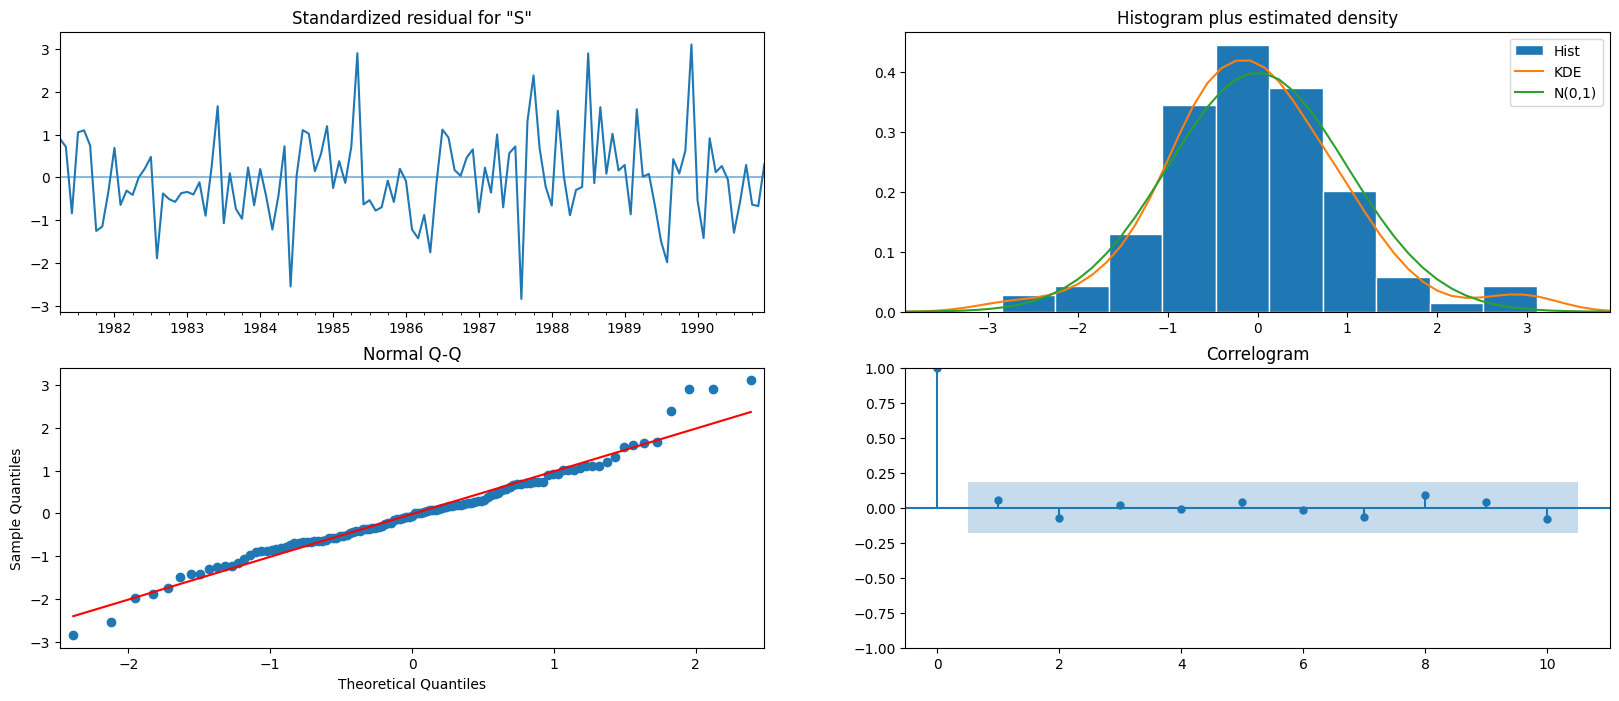

In [125]:
results_auto_SARIMA.plot_diagnostics();

In [126]:
 predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [127]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(0,1,1)(2,0,2,6) automatic'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE: 0.13100954629274314 
MAPE: nan


RMSE  MAPE
Alpha=0.99,SES                      [0.22330590440164572]   NaN
Alpha=1,Beta=0.0189:DES                          0.220764   NaN
Alpha=0.25,Beta=0.0,Gamma=0.74:TES               0.136688   NaN
RegressionOnTime                                 0.220765   NaN
NaiveModel                                       0.484038   NaN
SimpleAverageModel                               0.234454   NaN
2pointTrailingMovingAverage                      0.153851   NaN
4pointTrailingMovingAverage                      0.189332   NaN
6pointTrailingMovingAverage                      0.195605   NaN
9pointTrailingMovingAverage                      0.202285   NaN
ARIMA(1,2,2) Automatic                           0.225639   NaN
ARIMA(3,1,3) Manal                               0.474006   NaN
SARIMA(0,1,1)(2,0,2,6) automatic                  0.13101   NaN

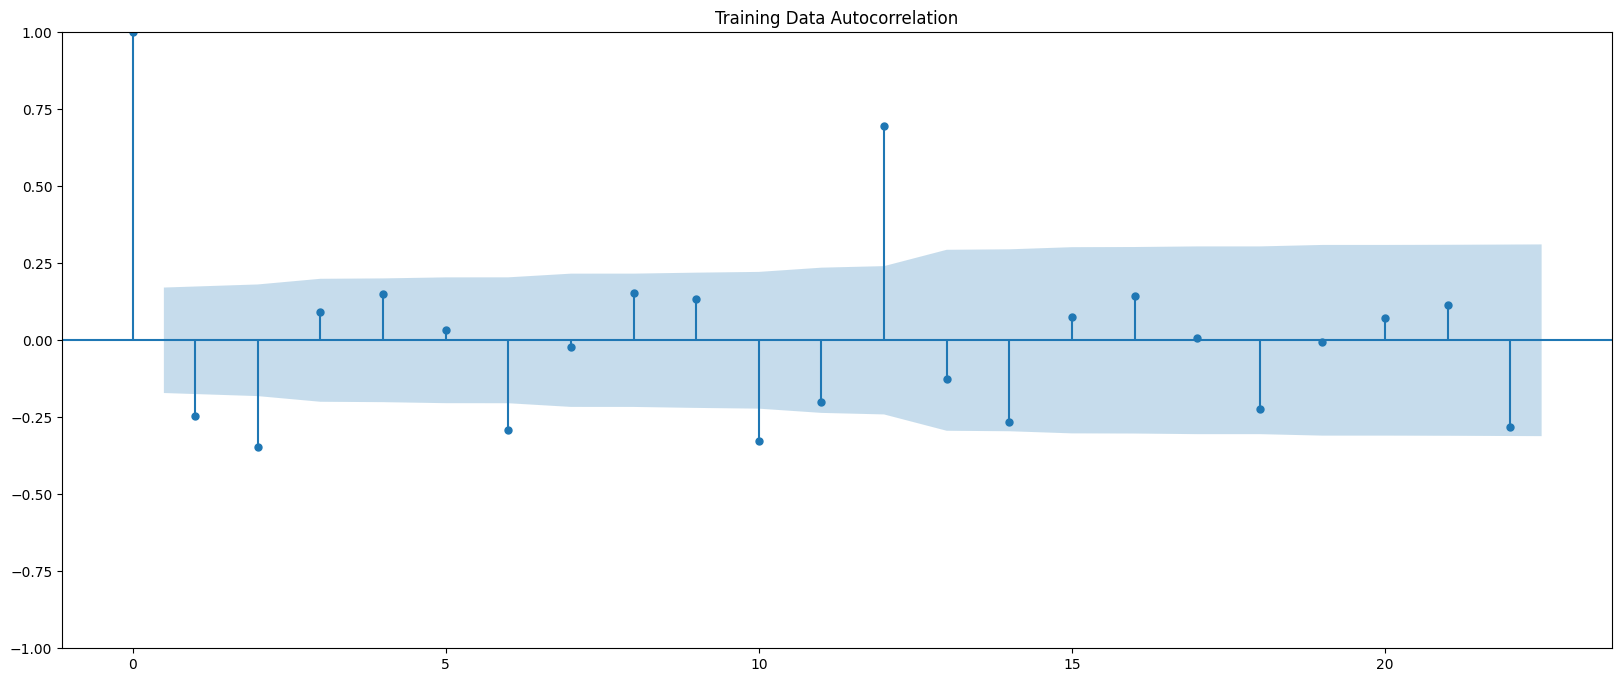

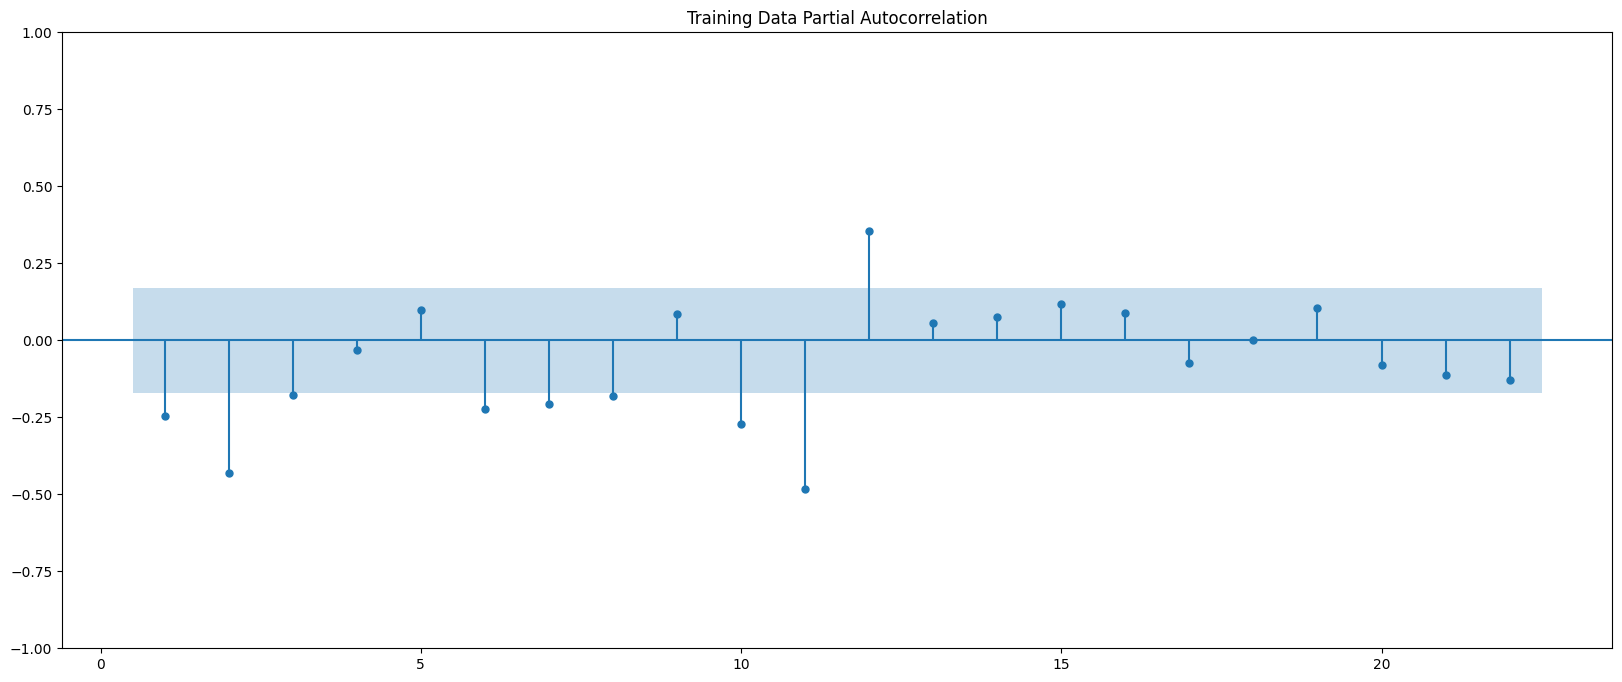

In [128]:
plot_acf(train.diff().dropna(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()
#q=3 p=3 d=1

In [129]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(3,1,3),
                                seasonal_order=(2,0,2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.46129D-01    |proj g|=  3.24487D+00

At iterate    5    f= -7.61071D-01    |proj g|=  7.07013D-01

At iterate   10    f= -7.99006D-01    |proj g|=  3.14691D-01

At iterate   15    f= -8.10478D-01    |proj g|=  2.18248D-02

At iterate   20    f= -8.10892D-01    |proj g|=  1.27319D-01

At iterate   25    f= -8.11087D-01    |proj g|=  2.86185D-02

At iterate   30    f= -8.11193D-01    |proj g|=  4.00371D-03

At iterate   35    f= -8.11208D-01    |proj g|=  6.65842D-03

At iterate   40    f= -8.11250D-01    |proj g|=  4.86438D-03

At iterate   45    f= -8.11394D-01    |proj g|=  3.91894D-02

At iterate   50    f= -8.11464D-01    |proj g|=  2.18004D-03

At iterate   55    f= -8.11466D-01    |proj g|=  6.74127D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

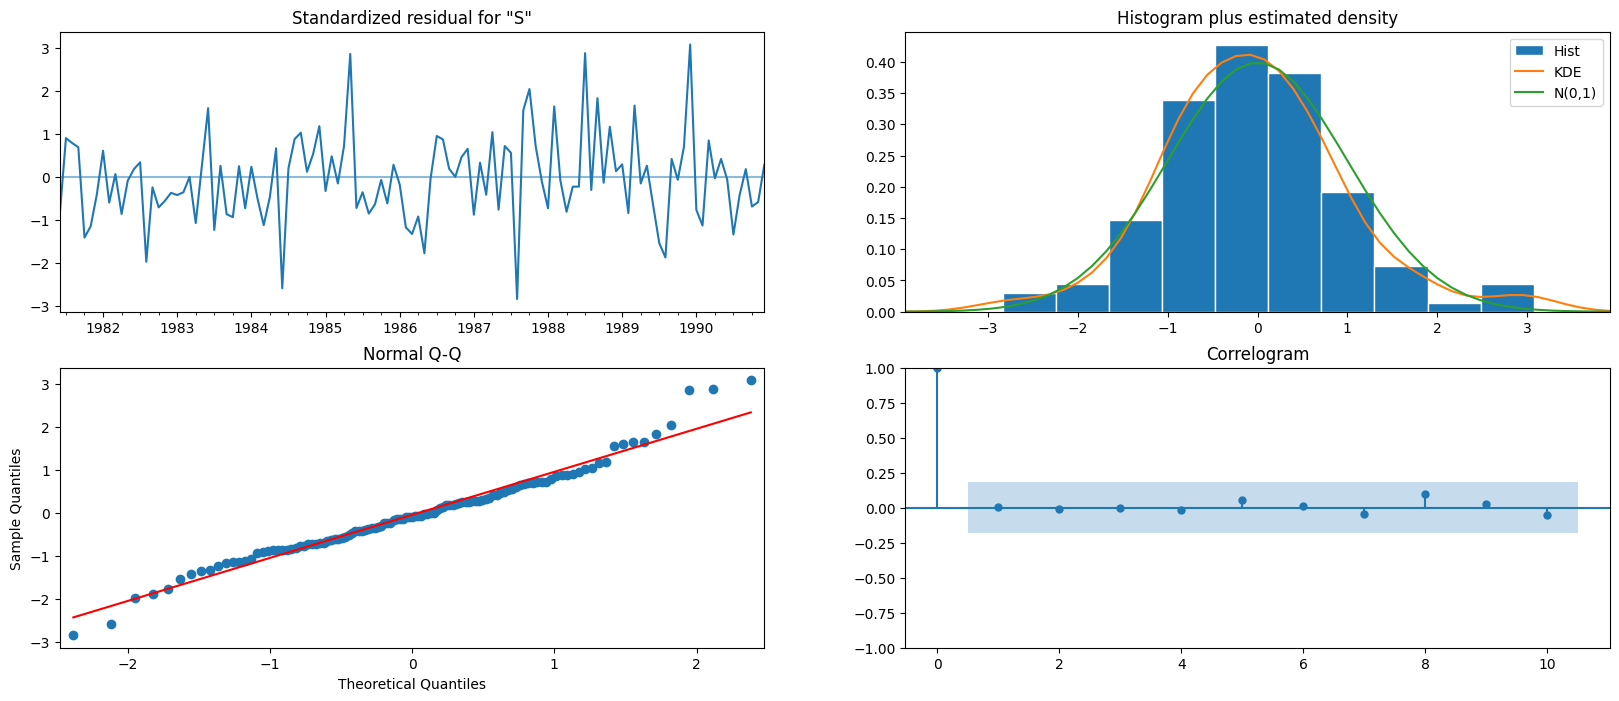

In [130]:
results_auto_SARIMA.plot_diagnostics();

In [131]:
 predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [140]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(2,0,2,6) manual'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE: 0.13249908843150798 
MAPE: nan


RMSE  MAPE
Alpha=0.99,SES                      [0.22330590440164572]   NaN
Alpha=1,Beta=0.0189:DES                          0.220764   NaN
Alpha=0.25,Beta=0.0,Gamma=0.74:TES               0.136688   NaN
RegressionOnTime                                 0.220765   NaN
NaiveModel                                       0.484038   NaN
SimpleAverageModel                               0.234454   NaN
2pointTrailingMovingAverage                      0.153851   NaN
4pointTrailingMovingAverage                      0.189332   NaN
6pointTrailingMovingAverage                      0.195605   NaN
9pointTrailingMovingAverage                      0.202285   NaN
ARIMA(1,2,2) Automatic                           0.225639   NaN
ARIMA(3,1,3) Manal                               0.474006   NaN
SARIMA(0,1,1)(2,0,2,6) automatic                  0.13101   NaN
SARIMA(3,1,3)(2,0,2,6) automatic                 0.132499   NaN
SARIMA(3,1,3)(2,0,2,6) manual                    0.132499   NaN

In [133]:
full_data_model = sm.tsa.statespace.SARIMAX(scaled_df['SoftDrinkProduction'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.22066D-01    |proj g|=  3.34062D+00


/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/avpl/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -8.06301D-01    |proj g|=  1.52577D-01

At iterate   10    f= -8.34956D-01    |proj g|=  1.59188D-01

At iterate   15    f= -8.40222D-01    |proj g|=  1.19119D-02

At iterate   20    f= -8.40301D-01    |proj g|=  4.59774D-03

At iterate   25    f= -8.40355D-01    |proj g|=  1.92419D-02

At iterate   30    f= -8.40465D-01    |proj g|=  2.20284D-02

At iterate   35    f= -8.40658D-01    |proj g|=  8.34670D-03

At iterate   40    f= -8.40672D-01    |proj g|=  2.79785D-03

At iterate   45    f= -8.40673D-01    |proj g|=  3.59599D-03

At iterate   50    f= -8.40674D-01    |proj g|=  7.94256D-04

At iterate   55    f= -8.40674D-01    |proj g|=  6.89961D-04

At iterate   60    f= -8.40674D-01    |proj g|=  2.07986D-03

At iterate   65    f= -8.40675D-01    |proj g|=  1.99825D-03

At iterate   70    f= -8.40677D-01    |proj g|=  2.95016D-03

At iterate   75    f= -8.40678D-01    |proj g|=  3.29817D-03

At iterate   80    f= -8.40681D-01    |proj g|=  3.18262D-03

At iter

In [134]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [135]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

SoftDrinkProduction      mean   mean_se  mean_ci_lower  mean_ci_upper
1995-08-01           0.630113  0.090335       0.453060       0.807166
1995-09-01           0.607888  0.090805       0.429913       0.785863
1995-10-01           0.664828  0.091202       0.486076       0.843580
1995-11-01           0.877254  0.092371       0.696211       1.058298
1995-12-01           1.074947  0.093438       0.891812       1.258081

In [136]:
rmse = mean_squared_error(scaled_df['SoftDrinkProduction'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 0.10480527758798952


In [145]:
results_full_data_model.fittedvalues

YearMonth
1980-01-01    0.000000
1980-02-01    0.000000
1980-03-01    0.083750
1980-04-01    0.273261
1980-05-01    0.137676
                ...   
1995-03-01    0.532663
1995-04-01    0.484563
1995-05-01    0.455476
1995-06-01    0.452235
1995-07-01    0.637401
Length: 187, dtype: float64

In [144]:
pred_full_manual_SARIMA_date['mean']

1995-08-01    0.630113
1995-09-01    0.607888
1995-10-01    0.664828
1995-11-01    0.877254
1995-12-01    1.074947
1996-01-01    0.259598
1996-02-01    0.572252
1996-03-01    0.623367
1996-04-01    0.590920
1996-05-01    0.562354
1996-06-01    0.596406
1996-07-01    0.691094
Freq: MS, Name: mean, dtype: float64

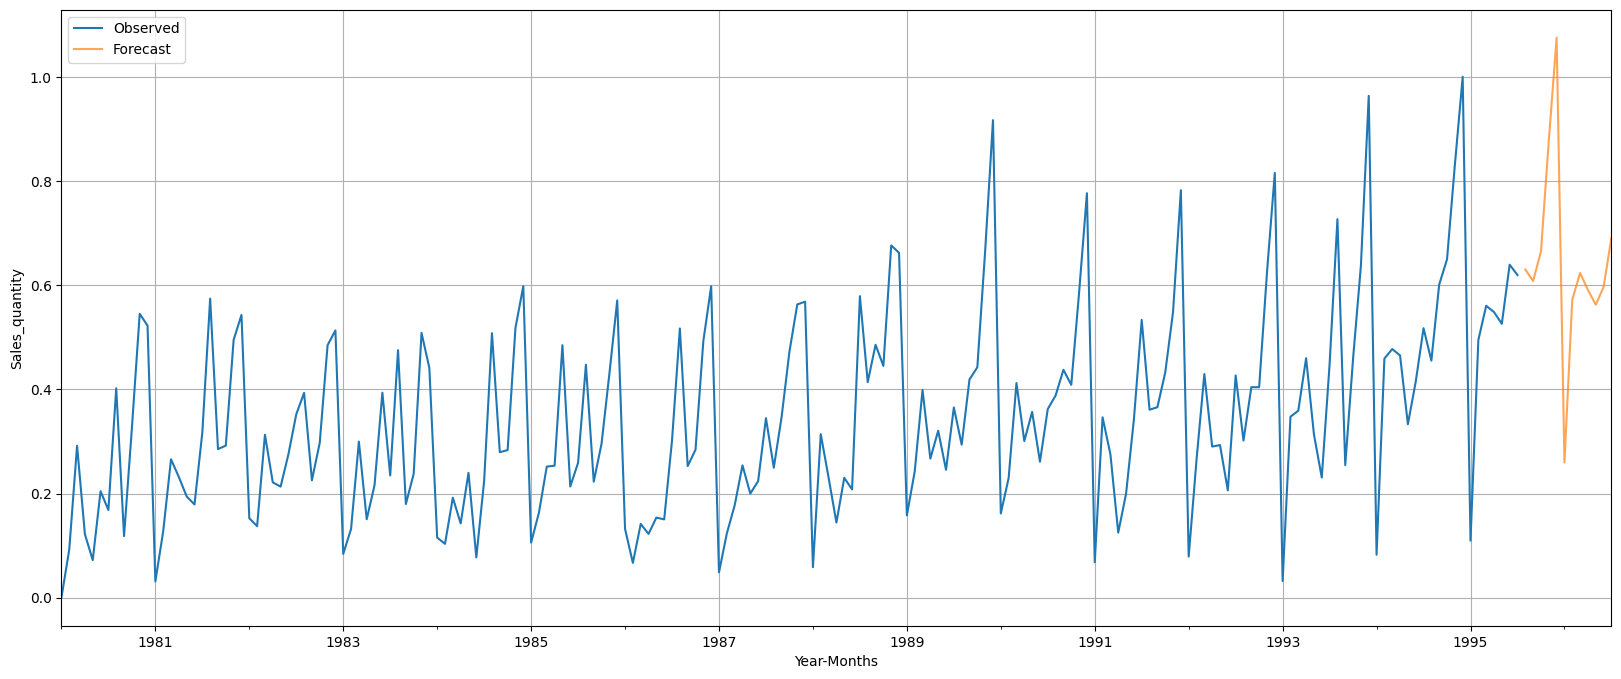

In [137]:
axis = scaled_df['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales_quantity')
plt.legend(loc='best')
plt.grid();